<h4><center>Parity Risk Strategies on a variety of Portfolio (Bonds, Equities, Commodities, and Currencies)</center></h4>

<h5><center>Dataset cover time frame from Jan 2004 till Dec 2007</center></h5>

In [1]:
# Load Modules
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import datetime
from matplotlib import rcParams
from datetime import datetime
from scipy.stats import skew
from scipy.stats import kurtosis

In [2]:
# Dataset (Bond.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
bond_df_2004_2007 = pd.read_csv('Bond_2004_2007.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(bond_df_2004_2007.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
bond_df_2004_2007.head()

(48, 7)


Date  Germany  Australia      US      UK  Canada   Japan
0  1/1/2004   100.02     105.10  100.98  100.92  104.87  100.66
1  2/1/2004   101.31     107.39  100.23  102.02  106.25  100.66
2  3/1/2004   102.45     107.20  101.30  102.13  106.75   98.78
3  4/1/2004   100.28     103.94   96.17  100.19  103.81   99.74
4  5/1/2004    99.43     104.58  101.25   98.86  103.52   99.83

In [3]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
bond_df_2004_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       48 non-null     object 
 1   Germany    48 non-null     float64
 2   Australia  48 non-null     float64
 3   US         48 non-null     float64
 4   UK         48 non-null     float64
 5   Canada     48 non-null     float64
 6   Japan      48 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.8+ KB


In [4]:
# Use pandas.to_datetime() function to convert argument to datetime
bond_df_2004_2007['Date'] = pd.to_datetime(bond_df_2004_2007.Date)

In [5]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
bond_df_2004_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       48 non-null     datetime64[ns]
 1   Germany    48 non-null     float64       
 2   Australia  48 non-null     float64       
 3   US         48 non-null     float64       
 4   UK         48 non-null     float64       
 5   Canada     48 non-null     float64       
 6   Japan      48 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 2.8 KB


In [6]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
bond_df_2004_2007.set_index('Date',inplace=True)

In [7]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
bond_df_2004_2007.isnull().any()

Germany      False
Australia    False
US           False
UK           False
Canada       False
Japan        False
dtype: bool

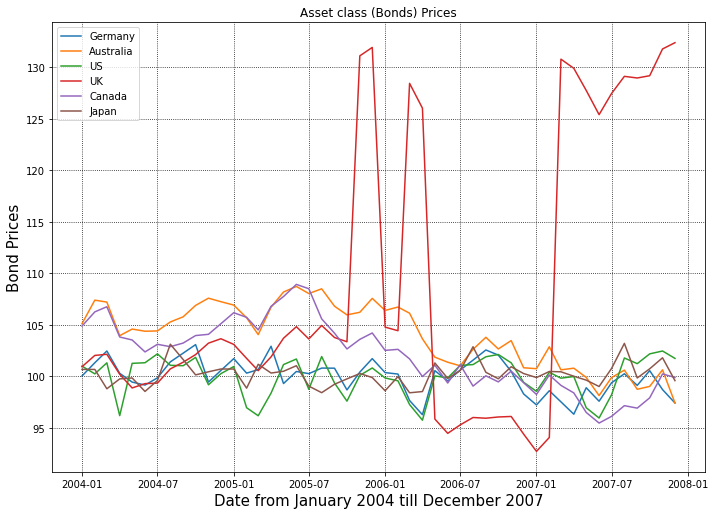

In [8]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(bond_df_2004_2007.index,bond_df_2004_2007.Germany, label='Germany')
plt.plot(bond_df_2004_2007.index,bond_df_2004_2007.Australia, label='Australia')
plt.plot(bond_df_2004_2007.index,bond_df_2004_2007.US, label='US')
plt.plot(bond_df_2004_2007.index,bond_df_2004_2007.UK, label='UK')
plt.plot(bond_df_2004_2007.index,bond_df_2004_2007.Canada, label='Canada')
plt.plot(bond_df_2004_2007.index,bond_df_2004_2007.Japan, label='Japan')
plt.title('Asset class (Bonds) Prices')
plt.xlabel('Date from January 2004 till December 2007', fontsize=15)
plt.ylabel('Bond Prices', fontsize=15)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [9]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
bond_df_2004_2007 = bond_df_2004_2007[['Germany','Australia','US','UK','Canada','Japan']].pct_change()
bond_df_2004_2007.head(5)

Germany  Australia        US        UK    Canada     Japan
Date                                                                   
2004-01-01       NaN        NaN       NaN       NaN       NaN       NaN
2004-02-01  0.012897   0.021789 -0.007427  0.010900  0.013159  0.000000
2004-03-01  0.011253  -0.001769  0.010675  0.001078  0.004706 -0.018677
2004-04-01 -0.021181  -0.030410 -0.050642 -0.018995 -0.027541  0.009719
2004-05-01 -0.008476   0.006157  0.052823 -0.013275 -0.002794  0.000902

In [10]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
bond_df_2004_2007.dropna(axis=0, inplace=True)
bond_df_2004_2007.head(5)

Germany  Australia        US        UK    Canada     Japan
Date                                                                   
2004-02-01  0.012897   0.021789 -0.007427  0.010900  0.013159  0.000000
2004-03-01  0.011253  -0.001769  0.010675  0.001078  0.004706 -0.018677
2004-04-01 -0.021181  -0.030410 -0.050642 -0.018995 -0.027541  0.009719
2004-05-01 -0.008476   0.006157  0.052823 -0.013275 -0.002794  0.000902
2004-06-01 -0.002917  -0.002008  0.000593  0.004248 -0.011206 -0.013122

In [11]:
print('There are {} rows in the DataFrame'.format(bond_df_2004_2007.shape[0]))

There are 47 rows in the DataFrame


In [12]:
# Use pandas.DataFrame.copy() function to make a copy of bond_df
bond_df_2004_2007_2 = bond_df_2004_2007.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.

In [13]:
vol_bond_df_2004_2007 = bond_df_2004_2007

In [14]:
vol_bond_df_2004_2007.shape[0]

47

In [15]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_bond_df_2004_2007['Germany_Vol'] = vol_bond_df_2004_2007['Germany'].rolling(47).std() * math.sqrt(47)
vol_bond_df_2004_2007['Australia_Vol'] = vol_bond_df_2004_2007['Australia'].rolling(47).std() * math.sqrt(47)
vol_bond_df_2004_2007['US_Vol'] = vol_bond_df_2004_2007['US'].rolling(47).std() * math.sqrt(47)
vol_bond_df_2004_2007['UK_Vol'] = vol_bond_df_2004_2007['UK'].rolling(47).std() * math.sqrt(47)
vol_bond_df_2004_2007['Canada_Vol'] = vol_bond_df_2004_2007['Canada'].rolling(47).std() * math.sqrt(47)
vol_bond_df_2004_2007['Japan_Vol'] = vol_bond_df_2004_2007['Japan'].rolling(47).std() * math.sqrt(47)

In [16]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_bond_df_2004_2007.dropna(axis=0, inplace=True)

In [17]:
vol_bond_df_2004_2007[['Germany_Vol','Australia_Vol','US_Vol','UK_Vol','Canada_Vol','Japan_Vol']]

Germany_Vol  Australia_Vol   US_Vol    UK_Vol  Canada_Vol  \
Date                                                                    
2007-12-01     0.113803       0.095646  0.14365  0.622277    0.088115   

            Japan_Vol  
Date                   
2007-12-01   0.099797

**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy which focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is an inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [18]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
volatility = (0.113803 + 0.095646 + 0.14365 + 0.622277 + 0.088115 + 0.099797) / 6
volatility

0.19388133333333332

In [19]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
target_vol_bond_df_2004_2007 = 0.19388133333333332 / 6
target_vol_bond_df_2004_2007

0.032313555555555554

In [20]:
# Create a new dataframe called portfolio_df which calculates the allocation to each asset class 
port_bond_df_2004_2007 = bond_df_2004_2007

In [21]:
port_bond_df_2004_2007['Germany_Alloc'] = target_vol_bond_df_2004_2007 / vol_bond_df_2004_2007['Germany_Vol'] 
port_bond_df_2004_2007['Australia_Alloc'] = target_vol_bond_df_2004_2007 / vol_bond_df_2004_2007['Australia_Vol'] 
port_bond_df_2004_2007['US_Alloc'] = target_vol_bond_df_2004_2007 / vol_bond_df_2004_2007['US_Vol']
port_bond_df_2004_2007['UK_Alloc'] = target_vol_bond_df_2004_2007 / vol_bond_df_2004_2007['UK_Vol']
port_bond_df_2004_2007['Canada_Alloc'] = target_vol_bond_df_2004_2007 / vol_bond_df_2004_2007['Canada_Vol']
port_bond_df_2004_2007['Japan_Alloc'] = target_vol_bond_df_2004_2007 / vol_bond_df_2004_2007['Japan_Vol']

In [22]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
port_bond_df_2004_2007.dropna(axis=0, inplace=True)

In [23]:
port_bond_df_2004_2007[['Germany_Alloc','Australia_Alloc','US_Alloc','UK_Alloc','Canada_Alloc','Japan_Alloc']]

Germany_Alloc  Australia_Alloc  US_Alloc  UK_Alloc  Canada_Alloc  \
Date                                                                           
2007-12-01       0.283943         0.337846  0.224947  0.051928      0.366721   

            Japan_Alloc  
Date                     
2007-12-01     0.323791

In [24]:
# I will multiply the monthly bond prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (bonds)

In [25]:
bond_df_2004_2007_2['Germany_R'] = bond_df_2004_2007_2['Germany'] * 0.283943
bond_df_2004_2007_2['Australia_R'] = bond_df_2004_2007_2['Australia'] * 0.337846
bond_df_2004_2007_2['US_R'] = bond_df_2004_2007_2['US'] * 0.224947
bond_df_2004_2007_2['UK_R'] = bond_df_2004_2007_2['UK'] * 0.051928
bond_df_2004_2007_2['Canada_R'] = bond_df_2004_2007_2['Canada'] * 0.366721
bond_df_2004_2007_2['Japan_R'] = bond_df_2004_2007_2['Japan'] * 0.323791

In [26]:
bond_df_2004_2007_2.head(5)

Germany  Australia        US        UK    Canada     Japan  \
Date                                                                      
2004-02-01  0.012897   0.021789 -0.007427  0.010900  0.013159  0.000000   
2004-03-01  0.011253  -0.001769  0.010675  0.001078  0.004706 -0.018677   
2004-04-01 -0.021181  -0.030410 -0.050642 -0.018995 -0.027541  0.009719   
2004-05-01 -0.008476   0.006157  0.052823 -0.013275 -0.002794  0.000902   
2004-06-01 -0.002917  -0.002008  0.000593  0.004248 -0.011206 -0.013122   

            Germany_R  Australia_R      US_R      UK_R  Canada_R   Japan_R  
Date                                                                        
2004-02-01   0.003662     0.007361 -0.001671  0.000566  0.004826  0.000000  
2004-03-01   0.003195    -0.000598  0.002401  0.000056  0.001726 -0.006047  
2004-04-01  -0.006014    -0.010274 -0.011392 -0.000986 -0.010100  0.003147  
2004-05-01  -0.002407     0.002080  0.011882 -0.000689 -0.001024  0.000292  
2004-06-01  -0.000828    -0.000678  0.000133  0.000221 -0.004109 -0.004249

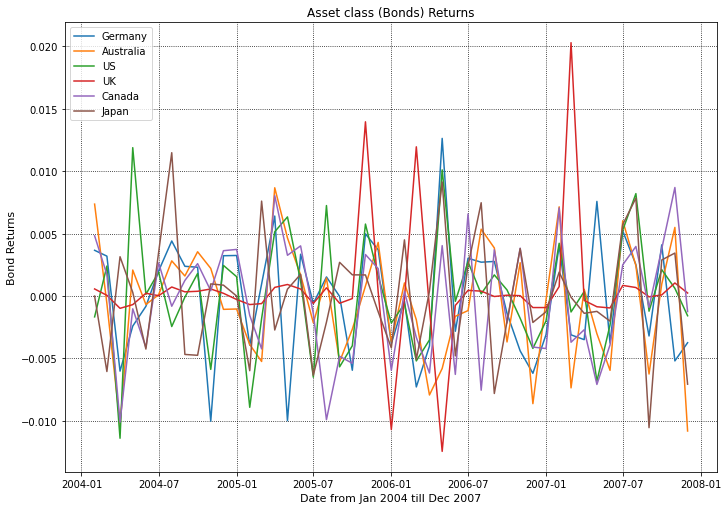

In [27]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(bond_df_2004_2007_2.index, bond_df_2004_2007_2.Germany_R, label='Germany')
plt.plot(bond_df_2004_2007_2.index, bond_df_2004_2007_2.Australia_R, label='Australia')
plt.plot(bond_df_2004_2007_2.index, bond_df_2004_2007_2.US_R, label='US')
plt.plot(bond_df_2004_2007_2.index, bond_df_2004_2007_2.UK_R, label='UK')
plt.plot(bond_df_2004_2007_2.index, bond_df_2004_2007_2.Canada_R, label='Canada')
plt.plot(bond_df_2004_2007_2.index, bond_df_2004_2007_2.Japan_R, label='Japan')
plt.title('Asset class (Bonds) Returns')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=11)
plt.ylabel('Bond Returns', fontsize=11)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

In [28]:
# Adding up all the returns of all asset classes for all countries

In [29]:
bond_df_2004_2007_2['Portfolio_R'] = bond_df_2004_2007_2['Germany_R'] + bond_df_2004_2007_2['Australia_R'] + bond_df_2004_2007_2['US_R'] + bond_df_2004_2007_2['UK_R'] + bond_df_2004_2007_2['Canada_R'] + bond_df_2004_2007_2['Japan_R']

In [30]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [31]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
bond_df_2004_2007_2['Bond_Port_Value'] = ((bond_df_2004_2007_2['Portfolio_R'] + 1).cumprod())*1000

In [32]:
bond_df_2004_2007_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R', 'Portfolio_R', 'Bond_Port_Value']].head(5)

Germany_R  Australia_R      US_R      UK_R  Canada_R   Japan_R  \
Date                                                                         
2004-02-01   0.003662     0.007361 -0.001671  0.000566  0.004826  0.000000   
2004-03-01   0.003195    -0.000598  0.002401  0.000056  0.001726 -0.006047   
2004-04-01  -0.006014    -0.010274 -0.011392 -0.000986 -0.010100  0.003147   
2004-05-01  -0.002407     0.002080  0.011882 -0.000689 -0.001024  0.000292   
2004-06-01  -0.000828    -0.000678  0.000133  0.000221 -0.004109 -0.004249   

            Portfolio_R  Bond_Port_Value  
Date                                      
2004-02-01     0.014744      1014.744390  
2004-03-01     0.000733      1015.488346  
2004-04-01    -0.035619       979.317243  
2004-05-01     0.010134       989.241898  
2004-06-01    -0.009511       979.833369

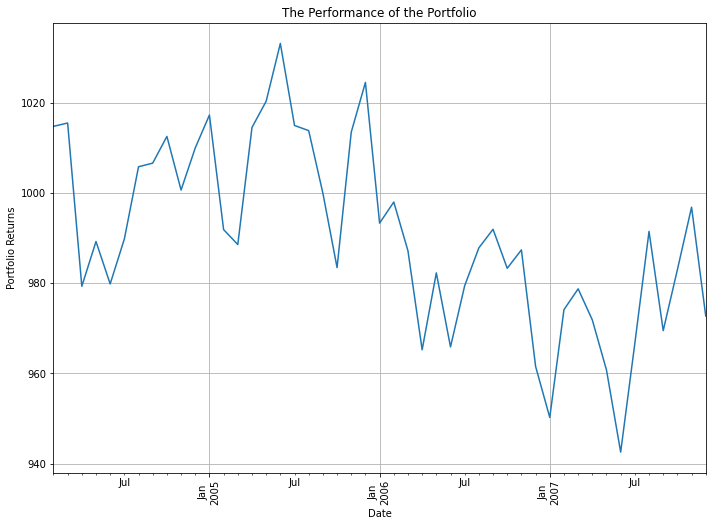

In [33]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio');
plt.xlabel('Date from Jan 2004 till Dec 2007');
plt.ylabel('Portfolio Returns');
bond_df_2004_2007_2['Bond_Port_Value'].plot(grid=True)
plt.xticks(rotation=90);
plt.show();

In [34]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
(bond_df_2004_2007_2.Bond_Port_Value.max() - bond_df_2004_2007_2.Bond_Port_Value.min()) / bond_df_2004_2007_2.Bond_Port_Value.max()

0.08763512049148023

In [35]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (bond_df_2004_2007_2['Bond_Port_Value'][-1] / bond_df_2004_2007_2['Bond_Port_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f}%".format(cumulative_return))

The Cumulative Return of the Portfolio is -4.14%


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [36]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
bond_df_2004_2007_2['Monthly_Return'] = bond_df_2004_2007_2['Bond_Port_Value'].pct_change(1)

In [37]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = bond_df_2004_2007_2['Monthly_Return'].mean() / bond_df_2004_2007_2['Monthly_Return'].std()
Sharpe_Ratio

-0.046304959305176495

In [38]:
bond_df_2004_2007_2.shape[0]

47

In [39]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(47)
Annualized_Sharpe_Ratio

-0.3174508072819164

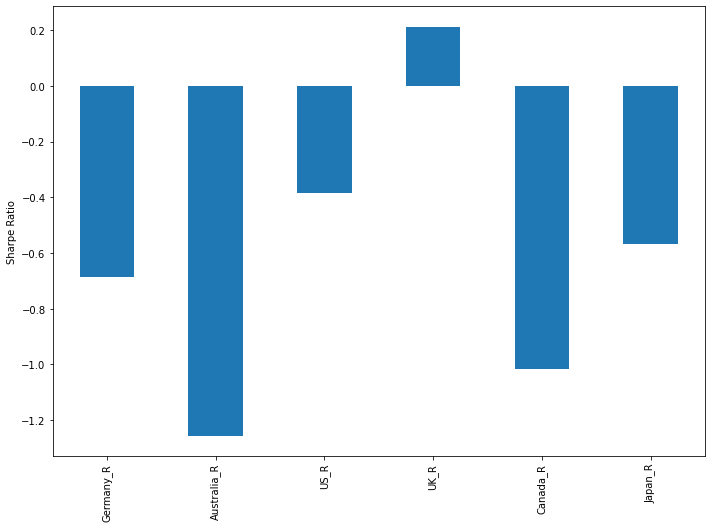

In [40]:
# Calcualte the Sharpe Ratio for bond portfolio
def bond_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = bond_df_2004_2007_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
bond_sharpes = bond_df_2004_2007_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']].apply(bond_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
bond_sharpes.plot.bar();   

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

In [41]:
# Calcualte the Sortino Ratio for bond portfolio
def bond_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

In [42]:
bond_df_2004_2007_2.shape[0]

47

In [43]:
bond_sortino_ratio(bond_df_2004_2007_2['Portfolio_R'], 47, .0164)

-0.6170097287918097

In [44]:
Annualized_Sortino_Ratio = -0.6170097287918097 * np.sqrt(47)
Annualized_Sortino_Ratio

-4.230005585683771

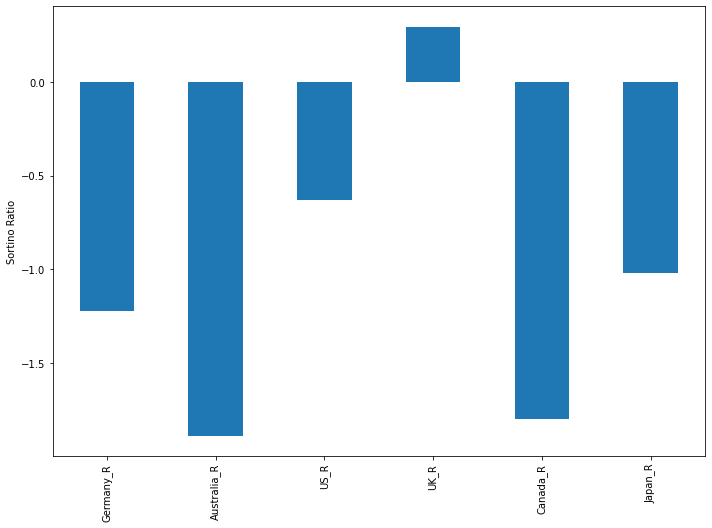

In [45]:
# Calcualte the Sortino Ratio for bond portfolio
def bond_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = bond_df_2004_2007_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
bond_sortinos = bond_df_2004_2007_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']].apply(bond_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
bond_sortinos.plot.bar();   

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

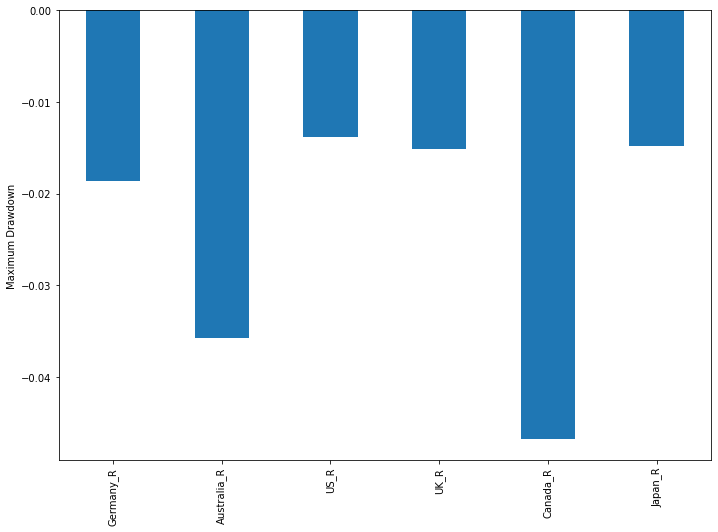

In [46]:
# Calcualte the Maximum Drawdown (MDD) for bond portfolio
def bond_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = bond_df_2004_2007_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
bond_max_drawdown = bond_df_2004_2007_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']].apply(bond_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
bond_max_drawdown.plot.bar();   

**Skewness**

- Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. 
- If the curve is shifted to the left or to the right, it is said to be skewed. 
- Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution.

- A normal distribution has a skew of zero, while a lognormal distribution, for example, would exhibit some degree of right-skew.

In [47]:
skew(bond_df_2004_2007_2['Bond_Port_Value'].dropna())

-0.10146274214060547

**Kurtosis**

- kurtosis is a statistical measure that is used to describe distribution.
- Whereas skewness differentiates extreme values in one versus the other tail, kurtosis measures extreme values in either tail. - Distributions with large kurtosis exhibit tail data exceeding the tails of the normal distribution (e.g., five or more standard deviations from the mean).
- Distributions with low kurtosis exhibit tail data that are generally less extreme than the tails of the normal distribution.

In [48]:
kurtosis(bond_df_2004_2007_2['Bond_Port_Value'].dropna())

-0.5288271043413926

**the Geometric Mean**

- The geometric mean is the average of a set of products, the calculation of which is commonly used to determine the performance results of an investment or portfolio.
- It is technically defined as "the nth root product of n numbers."
- The geometric mean must be used when working with percentages, which are derived from values, while the standard arithmetic mean works with the values themselves.

**the Geometric Mean Rate of Return**
- The geometric mean return formula is used to calculate the average rate per period on an investment that is compounded over multiple periods.
- The geometric mean rate of return (GMRR) is calculated by add return relative (per period return relative) and then subract 1.

In [49]:
# Calculate Geometric Mean Rate of Return (GMRR)
def geometric_mean_return(iterable):
    a = np.array(abs(iterable))
    return a.prod()**(1.0/len(a))

In [50]:
geometric_mean_return(bond_df_2004_2007_2['Portfolio_R'])

0.010800401417108555

**The Information Ratio**

- The information ratio (IR) is a measurement of portfolio returns beyond the returns of a benchmark, usually an index, compared to the volatility of those returns.
- In other words, the information ratio (IR) is an extension of the Sharpe Ratio which replaces the risk-free rate of return with the return of a benchmark portfolio.
- The benchmark used is typically an index that represents the market or a particular sector or industry.
- The information ratio measures the risk-adjusted returns of a financial asset or portfolio relative to a certain benchmark. - - This ratio aims to show excess returns relative to the benchmark, as well as the consistency in generating the excess returns. 
- The consistency of generating excess returns is measured by the tracking error.

In [51]:
def information_ratio(returns, benchmark_returns,n):
    return_difference = returns - benchmark_returns
    volatility = np.std(return_difference) * np.sqrt(n)
    information_ratio = np.mean(return_difference) / volatility
    return information_ratio

In [52]:
information_ratio(bond_df_2004_2007_2['Portfolio_R'], 0.007417225852882795, 47)

-0.06899045758390791

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2004 till December 2007.
- Target volatility 3.23 %.
- Maximum Drawdown 8.7%.
- Cumulative return of the of portfolio -4.14 %
- Sharpe Ratio, or Risk-Adjusted Returns - 4.63 %.
- Annualized Sharpe Ratio - 31.74 %.
- Sortino ratio - 61.70 %.
- Annualized Sortino Ratio - 400.23 %.
- Skewness - 10.14 %.
- Kurtosis - 0.5288
- Geometric Mean Rate of Return 0.010800401417108555
- Information ratio - 6.89 %.

In [53]:
# Dataset (Equity.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
equity_df_2004_2007 = pd.read_csv('Equity_2004_2007.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(equity_df_2004_2007.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
equity_df_2004_2007.head()

(48, 26)


Date  Australia  Nethelands  Germany   Canada     Hong_Kong  \
0  1/1/2004     3272.0      353.31  4058.60  8521.39  1.328937e+10   
1  2/1/2004     3360.6      356.59  4018.16  8788.49  1.390703e+10   
2  3/1/2004     3415.3      338.87  3856.70  8585.93  1.268167e+10   
3  4/1/2004     3400.8      341.41  3985.21  8243.97  1.194296e+10   
4  5/1/2004     3460.2      337.19  3921.41  8417.32  1.219824e+10   

        France        Belgium            US    Japan   ...    Chile    Brazil  \
0  3.638440e+09  2.383760e+09  1.131130e+09  10783.61  ...  1408.86  21851.44   
1  3.725440e+09  2.483160e+09  1.144940e+09  11041.92  ...  1543.08  21755.02   
2  3.625230e+09  2.380350e+09  1.126210e+09  11715.39  ...  1458.90  22142.26   
3  3.674280e+09  2.439610e+09  1.107300e+09  11761.79  ...  1430.60  19607.23   
4  3.669630e+09  2.415430e+09  1.120680e+09  11236.37  ...  1428.80  19544.67   

   Argentina  Russia  Turkey  Portugal  Finland  South Africa  Indonesia  \
0    1140.81  551.72  172.59   7011.72  1588.13       9953.72     752.93   
1    1183.14  591.09  188.89   7630.46  1658.37      10005.41     761.08   
2    1201.66  644.64  201.91   7540.45  1617.56       9773.27     735.68   
3    1077.93  561.78  180.23   7500.35  1601.09       9455.17     783.41   
4     952.62  535.40  170.81   7223.18  1551.55       9525.95     732.52   

   Venezuela  
0   14588.25  
1   12954.31  
2   11064.37  
3   11872.87  
4   14819.87  

[5 rows x 26 columns]

In [54]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
equity_df_2004_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          48 non-null     object 
 1   Australia     48 non-null     float64
 2   Nethelands    48 non-null     float64
 3   Germany       48 non-null     float64
 4   Canada        48 non-null     float64
 5   Hong_Kong     48 non-null     float64
 6   France        48 non-null     float64
 7   Belgium       48 non-null     float64
 8   US            48 non-null     float64
 9   Japan         48 non-null     float64
 10  Spain         48 non-null     float64
 11  Sweden        48 non-null     float64
 12  UK            48 non-null     float64
 13  Italy         48 non-null     float64
 14  Singapore     48 non-null     float64
 15  Thailand      48 non-null     float64
 16  Chile         48 non-null     float64
 17  Brazil        48 non-null     float64
 18  Argentina     48 non-null     fl

In [55]:
# Use pandas.to_datetime() function to convert argument to datetime
equity_df_2004_2007['Date'] = pd.to_datetime(equity_df_2004_2007.Date)

In [56]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
equity_df_2004_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          48 non-null     datetime64[ns]
 1   Australia     48 non-null     float64       
 2   Nethelands    48 non-null     float64       
 3   Germany       48 non-null     float64       
 4   Canada        48 non-null     float64       
 5   Hong_Kong     48 non-null     float64       
 6   France        48 non-null     float64       
 7   Belgium       48 non-null     float64       
 8   US            48 non-null     float64       
 9   Japan         48 non-null     float64       
 10  Spain         48 non-null     float64       
 11  Sweden        48 non-null     float64       
 12  UK            48 non-null     float64       
 13  Italy         48 non-null     float64       
 14  Singapore     48 non-null     float64       
 15  Thailand      48 non-null     float64     

In [57]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
equity_df_2004_2007.set_index('Date',inplace=True)

In [58]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
equity_df_2004_2007.isnull().any()

Australia       False
Nethelands      False
Germany         False
Canada          False
Hong_Kong       False
France          False
Belgium         False
US              False
Japan           False
Spain           False
Sweden          False
UK              False
Italy           False
Singapore       False
Thailand        False
Chile           False
Brazil          False
Argentina       False
Russia          False
Turkey          False
Portugal        False
Finland         False
South Africa    False
Indonesia       False
Venezuela       False
dtype: bool

In [59]:
# Use pandas.DataFrame.rename() function to alter axes labels (to remove space in the name)
equity_df_2004_2007 = equity_df_2004_2007.rename(columns={'France ':'France'})
equity_df_2004_2007 = equity_df_2004_2007.rename(columns={'Japan ':'Japan'})
equity_df_2004_2007 = equity_df_2004_2007.rename(columns={'Sweden ':'Sweden'})
equity_df_2004_2007 = equity_df_2004_2007.rename(columns={'South Africa':'South_Africa'})

In [60]:
equity_df_2004_2007[['Australia','Nethelands','Germany','Canada','Hong_Kong','France','Belgium',
                     'US','Japan','Spain','Sweden','UK','Italy','Singapore','Thailand','Chile',
                     'Brazil','Argentina','Russia','Turkey','Portugal','Finland',
                           'South_Africa','Indonesia','Venezuela']].head(3)

Australia  Nethelands  Germany   Canada     Hong_Kong  \
Date                                                                
2004-01-01     3272.0      353.31  4058.60  8521.39  1.328937e+10   
2004-02-01     3360.6      356.59  4018.16  8788.49  1.390703e+10   
2004-03-01     3415.3      338.87  3856.70  8585.93  1.268167e+10   

                  France       Belgium            US     Japan   Spain  ...  \
Date                                                                    ...   
2004-01-01  3.638440e+09  2.383760e+09  1.131130e+09  10783.61  7929.9  ...   
2004-02-01  3.725440e+09  2.483160e+09  1.144940e+09  11041.92  8249.4  ...   
2004-03-01  3.625230e+09  2.380350e+09  1.126210e+09  11715.39  8018.1  ...   

              Chile    Brazil  Argentina  Russia  Turkey  Portugal  Finland  \
Date                                                                          
2004-01-01  1408.86  21851.44    1140.81  551.72  172.59   7011.72  1588.13   
2004-02-01  1543.08  21755.02    1183.14  591.09  188.89   7630.46  1658.37   
2004-03-01  1458.90  22142.26    1201.66  644.64  201.91   7540.45  1617.56   

            South_Africa  Indonesia  Venezuela  
Date                                            
2004-01-01       9953.72     752.93   14588.25  
2004-02-01      10005.41     761.08   12954.31  
2004-03-01       9773.27     735.68   11064.37  

[3 rows x 25 columns]

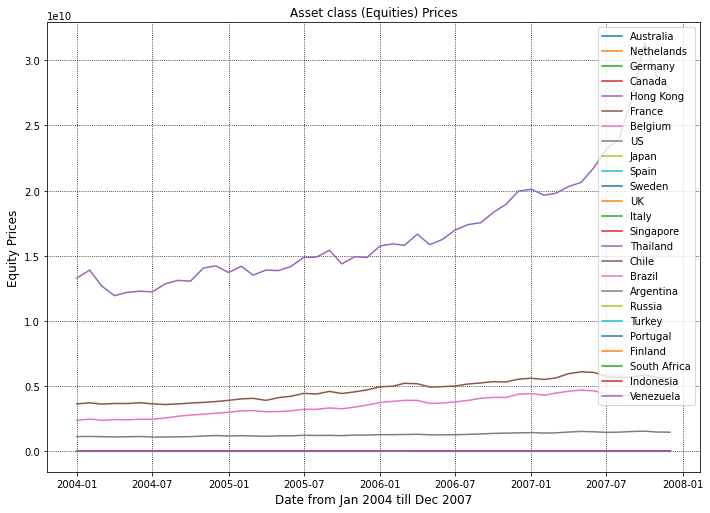

In [61]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Australia, label='Australia')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Nethelands, label='Nethelands')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Germany, label='Germany')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Canada, label='Canada')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Hong_Kong, label='Hong Kong')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.France, label='France')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Belgium, label='Belgium')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.US, label='US')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Japan, label='Japan')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Spain, label='Spain')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Sweden, label='Sweden')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.UK, label='UK')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Italy, label='Italy')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Singapore, label='Singapore')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Thailand, label='Thailand')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Chile, label='Chile')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Brazil, label='Brazil')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Argentina, label='Argentina')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Russia, label='Russia')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Turkey, label='Turkey')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Portugal, label='Portugal')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Finland, label='Finland')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.South_Africa, label='South Africa')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Indonesia, label='Indonesia')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Venezuela, label='Venezuela')

plt.title('Asset class (Equities) Prices')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=12)
plt.ylabel('Equity Prices', fontsize=12)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

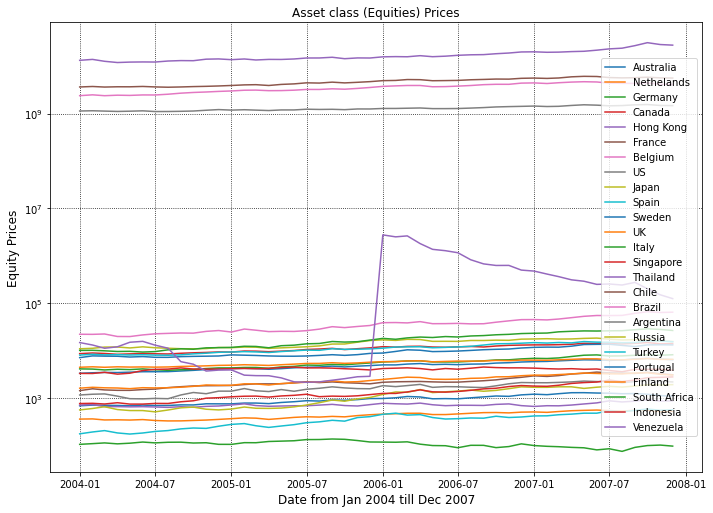

In [62]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Australia, label='Australia')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Nethelands, label='Nethelands')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Germany, label='Germany')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Canada, label='Canada')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Hong_Kong, label='Hong Kong')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.France, label='France')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Belgium, label='Belgium')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.US, label='US')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Japan, label='Japan')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Spain, label='Spain')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Sweden, label='Sweden')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.UK, label='UK')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Italy, label='Italy')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Singapore, label='Singapore')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Thailand, label='Thailand')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Chile, label='Chile')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Brazil, label='Brazil')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Argentina, label='Argentina')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Russia, label='Russia')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Turkey, label='Turkey')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Portugal, label='Portugal')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Finland, label='Finland')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.South_Africa, label='South Africa')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Indonesia, label='Indonesia')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Venezuela, label='Venezuela')

plt.title('Asset class (Equities) Prices')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=12)
plt.ylabel('Equity Prices', fontsize=12)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);
plt.yscale('log')
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=5);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [63]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
equity_df_2004_2007 = equity_df_2004_2007[['Australia','Nethelands','Germany','Canada','Hong_Kong','France','Belgium',
                                           'US','Japan','Spain','Sweden','UK','Italy','Singapore','Thailand','Chile',
                                           'Brazil','Argentina','Russia','Turkey','Portugal','Finland',
                                           'South_Africa','Indonesia','Venezuela']].pct_change()
equity_df_2004_2007.head(5)

Australia  Nethelands   Germany    Canada  Hong_Kong    France  \
Date                                                                         
2004-01-01        NaN         NaN       NaN       NaN        NaN       NaN   
2004-02-01   0.027078    0.009284 -0.009964  0.031345   0.046478  0.023911   
2004-03-01   0.016277   -0.049693 -0.040183 -0.023048  -0.088111 -0.026899   
2004-04-01  -0.004246    0.007495  0.033321 -0.039828  -0.058250  0.013530   
2004-05-01   0.017466   -0.012361 -0.016009  0.021027   0.021375 -0.001266   

             Belgium        US     Japan     Spain  ...     Chile    Brazil  \
Date                                                ...                       
2004-01-01       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2004-02-01  0.041699  0.012209  0.023954  0.040291  ...  0.095269 -0.004413   
2004-03-01 -0.041403 -0.016359  0.060992 -0.028038  ... -0.054553  0.017800   
2004-04-01  0.024896 -0.016791  0.003961  0.011399  ... -0.019398 -0.114488   
2004-05-01 -0.009911  0.012083 -0.044672 -0.018521  ... -0.001258 -0.003191   

            Argentina    Russia    Turkey  Portugal   Finland  South_Africa  \
Date                                                                          
2004-01-01        NaN       NaN       NaN       NaN       NaN           NaN   
2004-02-01   0.037105  0.071359  0.094443  0.088244  0.044228      0.005193   
2004-03-01   0.015653  0.090595  0.068929 -0.011796 -0.024609     -0.023201   
2004-04-01  -0.102966 -0.128537 -0.107375 -0.005318 -0.010182     -0.032548   
2004-05-01  -0.116251 -0.046958 -0.052267 -0.036954 -0.030941      0.007486   

            Indonesia  Venezuela  
Date                              
2004-01-01        NaN        NaN  
2004-02-01   0.010824  -0.112004  
2004-03-01  -0.033374  -0.145893  
2004-04-01   0.064879   0.073072  
2004-05-01  -0.064960   0.248213  

[5 rows x 25 columns]

In [64]:
# Use pandas.DataFrame.dropna() function to remove missing values in rows
equity_df_2004_2007.dropna(axis=0, inplace=True)
equity_df_2004_2007.head(5)

Australia  Nethelands   Germany    Canada  Hong_Kong    France  \
Date                                                                         
2004-02-01   0.027078    0.009284 -0.009964  0.031345   0.046478  0.023911   
2004-03-01   0.016277   -0.049693 -0.040183 -0.023048  -0.088111 -0.026899   
2004-04-01  -0.004246    0.007495  0.033321 -0.039828  -0.058250  0.013530   
2004-05-01   0.017466   -0.012361 -0.016009  0.021027   0.021375 -0.001266   
2004-06-01   0.021010    0.023548  0.033488  0.015238   0.007174  0.017266   

             Belgium        US     Japan     Spain  ...     Chile    Brazil  \
Date                                                ...                       
2004-02-01  0.041699  0.012209  0.023954  0.040291  ...  0.095269 -0.004413   
2004-03-01 -0.041403 -0.016359  0.060992 -0.028038  ... -0.054553  0.017800   
2004-04-01  0.024896 -0.016791  0.003961  0.011399  ... -0.019398 -0.114488   
2004-05-01 -0.009911  0.012083 -0.044672 -0.018521  ... -0.001258 -0.003191   
2004-06-01  0.022865  0.017989  0.055400  0.014951  ...  0.037920  0.082081   

            Argentina    Russia    Turkey  Portugal   Finland  South_Africa  \
Date                                                                          
2004-02-01   0.037105  0.071359  0.094443  0.088244  0.044228      0.005193   
2004-03-01   0.015653  0.090595  0.068929 -0.011796 -0.024609     -0.023201   
2004-04-01  -0.102966 -0.128537 -0.107375 -0.005318 -0.010182     -0.032548   
2004-05-01  -0.116251 -0.046958 -0.052267 -0.036954 -0.030941      0.007486   
2004-06-01  -0.007527 -0.001046  0.051929  0.022721  0.048042     -0.034152   

            Indonesia  Venezuela  
Date                              
2004-02-01   0.010824  -0.112004  
2004-03-01  -0.033374  -0.145893  
2004-04-01   0.064879   0.073072  
2004-05-01  -0.064960   0.248213  
2004-06-01  -0.000164   0.043990  

[5 rows x 25 columns]

In [65]:
print('There are {} rows in the DataFrame'.format(equity_df_2004_2007.shape[0]))

There are 47 rows in the DataFrame


In [66]:
# Use pandas.DataFrame.copy() function to make a copy of bond_df
equity_df_2004_2007_2 = equity_df_2004_2007.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.

In [67]:
vol_equity_df_2004_2007 = equity_df_2004_2007

In [68]:
vol_equity_df_2004_2007.shape[0]

47

In [69]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_equity_df_2004_2007['Australia_Vol'] = vol_equity_df_2004_2007['Australia'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['Nethelands_Vol'] = vol_equity_df_2004_2007['Nethelands'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['Germany_Vol'] = vol_equity_df_2004_2007['Germany'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['Canada_Vol'] = vol_equity_df_2004_2007['Canada'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['Hong_Kong_Vol'] = vol_equity_df_2004_2007['Hong_Kong'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['France_Vol'] = vol_equity_df_2004_2007['France'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['Belgium_Vol'] = vol_equity_df_2004_2007['Belgium'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['US_Vol'] = vol_equity_df_2004_2007['US'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['Japan_Vol'] = vol_equity_df_2004_2007['Japan'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['Spain_Vol'] = vol_equity_df_2004_2007['Spain'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['Sweden_Vol'] = vol_equity_df_2004_2007['Sweden'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['UK_Vol'] = vol_equity_df_2004_2007['UK'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['Italy_Vol'] = vol_equity_df_2004_2007['Italy'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['Singapore_Vol'] = vol_equity_df_2004_2007['Singapore'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['Thailand_Vol'] = vol_equity_df_2004_2007['Thailand'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['Chile_Vol'] = vol_equity_df_2004_2007['Chile'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['Brazil_Vol'] = vol_equity_df_2004_2007['Brazil'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['Argentina_Vol'] = vol_equity_df_2004_2007['Argentina'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['Russia_Vol'] = vol_equity_df_2004_2007['Russia'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['Turkey_Vol'] = vol_equity_df_2004_2007['Turkey'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['Portugal_Vol'] = vol_equity_df_2004_2007['Portugal'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['Finland_Vol'] = vol_equity_df_2004_2007['Finland'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['South_Africa_Vol'] = vol_equity_df_2004_2007['South_Africa'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['Indonesia_Vol'] = vol_equity_df_2004_2007['Indonesia'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['Venezuela_Vol'] = vol_equity_df_2004_2007['Venezuela'].rolling(47).std() * math.sqrt(47)

In [70]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_equity_df_2004_2007.dropna(axis=0, inplace=True)

In [71]:
vol_equity_df_2004_2007[['Australia_Vol','Nethelands_Vol','Germany_Vol','Canada_Vol','Hong_Kong_Vol','France_Vol',
                         'Belgium_Vol','US_Vol','Japan_Vol','Spain_Vol','Sweden_Vol','UK_Vol','Italy_Vol',
                         'Singapore_Vol','Thailand_Vol','Chile_Vol','Brazil_Vol','Argentina_Vol','Russia_Vol',
                         'Turkey_Vol','Portugal_Vol','Finland_Vol','South_Africa_Vol','Indonesia_Vol','Venezuela_Vol']]

Australia_Vol  Nethelands_Vol  Germany_Vol  Canada_Vol  \
Date                                                                 
2007-12-01       0.165813        0.218687     0.218298    0.199618   

            Hong_Kong_Vol  France_Vol  Belgium_Vol    US_Vol  Japan_Vol  \
Date                                                                      
2007-12-01       0.324424    0.184943     0.203816  0.151243   0.272704   

            Spain_Vol  ...  Chile_Vol  Brazil_Vol  Argentina_Vol  Russia_Vol  \
Date                   ...                                                     
2007-12-01   0.222627  ...     0.2787    0.398772       0.511721    0.497796   

            Turkey_Vol  Portugal_Vol  Finland_Vol  South_Africa_Vol  \
Date                                                                  
2007-12-01    0.476864      0.254032     0.261224          0.281925   

            Indonesia_Vol  Venezuela_Vol  
Date                                      
2007-12-01       0.362558     966.793378  

[1 rows x 25 columns]

In [72]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
Avg_vol_equity = (0.165813 + 0.218687 + 0.218298 + 0.199618 + 0.324424 + 0.184943 + 0.203816 +0.151243+0.272704+0.222627+0.244067+0.151271+0.463632+0.320098+ 0.318966+0.2787+0.398772+0.511721+0.497796+0.476864+0.254032+0.261224+0.281925+0.362558+966.793378) / 25
Avg_vol_equity

38.95108708

**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy which focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is an inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [73]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
target_vol_equity_2004_2007 = 1 / 25
target_vol_equity_2004_2007

0.04

In [74]:
# Create a new dataframe called portfolio_df which calculates the allocation to each asset class 
port_equity_df_2004_2007 = equity_df_2004_2007

In [75]:
port_equity_df_2004_2007['Australia_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['Australia_Vol'] 
port_equity_df_2004_2007['Nethelands_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['Nethelands_Vol'] 
port_equity_df_2004_2007['Germany_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['Germany_Vol'] 
port_equity_df_2004_2007['Canada_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['Canada_Vol']
port_equity_df_2004_2007['Hong_Kong_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['Hong_Kong_Vol']
port_equity_df_2004_2007['France_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['France_Vol']
port_equity_df_2004_2007['Belgium_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['Belgium_Vol']
port_equity_df_2004_2007['US_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['US_Vol']
port_equity_df_2004_2007['Japan_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['Japan_Vol']
port_equity_df_2004_2007['Spain_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['Spain_Vol']
port_equity_df_2004_2007['Sweden_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['Sweden_Vol']
port_equity_df_2004_2007['UK_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['UK_Vol']
port_equity_df_2004_2007['Italy_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['Italy_Vol']
port_equity_df_2004_2007['Singapore_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['Singapore_Vol']

port_equity_df_2004_2007['Thailand_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['Thailand_Vol']
port_equity_df_2004_2007['Chile_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['Chile_Vol']
port_equity_df_2004_2007['Brazil_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['Brazil_Vol']
port_equity_df_2004_2007['Argentina_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['Argentina_Vol']
port_equity_df_2004_2007['Russia_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['Russia_Vol']
port_equity_df_2004_2007['Turkey_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['Turkey_Vol']
port_equity_df_2004_2007['Portugal_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['Portugal_Vol']
port_equity_df_2004_2007['Finland_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['Finland_Vol']
port_equity_df_2004_2007['South_Africa_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['South_Africa_Vol']
port_equity_df_2004_2007['Indonesia_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['Indonesia_Vol']
port_equity_df_2004_2007['Venezuela_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['Venezuela_Vol']


In [76]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
port_equity_df_2004_2007.dropna(axis=0, inplace=True)

In [77]:
port_equity_df_2004_2007[['Australia_Alloc','Nethelands_Alloc','Germany_Alloc','Canada_Alloc','Hong_Kong_Alloc',
                          'France_Alloc','Belgium_Alloc','US_Alloc','Japan_Alloc','Spain_Alloc','Sweden_Alloc',
                          'UK_Alloc','Italy_Alloc','Singapore_Alloc','Thailand_Alloc','Chile_Alloc',
                          'Brazil_Alloc','Argentina_Alloc','Russia_Alloc','Turkey_Alloc','Portugal_Alloc',
                          'Finland_Alloc','South_Africa_Alloc','Indonesia_Alloc','Venezuela_Alloc']]

Australia_Alloc  Nethelands_Alloc  Germany_Alloc  Canada_Alloc  \
Date                                                                         
2007-12-01         0.241236           0.18291       0.183236      0.200383   

            Hong_Kong_Alloc  France_Alloc  Belgium_Alloc  US_Alloc  \
Date                                                                 
2007-12-01         0.123296      0.216283       0.196255  0.264476   

            Japan_Alloc  Spain_Alloc  ...  Chile_Alloc  Brazil_Alloc  \
Date                                  ...                              
2007-12-01     0.146679     0.179673  ...     0.143523      0.100308   

            Argentina_Alloc  Russia_Alloc  Turkey_Alloc  Portugal_Alloc  \
Date                                                                      
2007-12-01         0.078168      0.080354      0.083881         0.15746   

            Finland_Alloc  South_Africa_Alloc  Indonesia_Alloc  \
Date                                                             
2007-12-01       0.153125            0.141882         0.110327   

            Venezuela_Alloc  
Date                         
2007-12-01         0.000041  

[1 rows x 25 columns]

In [78]:
# I will multiply the monthly bond prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (equities)

In [79]:
equity_df_2004_2007_2['Australia_R'] = equity_df_2004_2007_2['Australia'] * 0.241236
equity_df_2004_2007_2['Nethelands_R'] = equity_df_2004_2007_2['Nethelands'] * 0.18291
equity_df_2004_2007_2['Germany_R'] = equity_df_2004_2007_2['Germany'] * 0.183236
equity_df_2004_2007_2['Canada_R'] = equity_df_2004_2007_2['Canada'] * 0.200383
equity_df_2004_2007_2['Hong_Kong_R'] = equity_df_2004_2007_2['Hong_Kong'] * 0.123296
equity_df_2004_2007_2['France_R'] = equity_df_2004_2007_2['France'] * 0.216283
equity_df_2004_2007_2['Belgium_R'] = equity_df_2004_2007_2['Belgium'] * 0.196255
equity_df_2004_2007_2['US_R'] = equity_df_2004_2007_2['US'] * 0.264476
equity_df_2004_2007_2['Japan_R'] = equity_df_2004_2007_2['Japan'] * 0.146679
equity_df_2004_2007_2['Spain_R'] = equity_df_2004_2007_2['Spain'] * 0.179673
equity_df_2004_2007_2['Sweden_R'] = equity_df_2004_2007_2['Sweden'] * 0.163889
equity_df_2004_2007_2['UK_R'] = equity_df_2004_2007_2['UK'] * 0.264426
equity_df_2004_2007_2['Italy_R'] = equity_df_2004_2007_2['Italy'] * 0.086275
equity_df_2004_2007_2['Singapore_R'] = equity_df_2004_2007_2['Singapore'] * 0.124962

equity_df_2004_2007_2['Thailand_R'] = equity_df_2004_2007_2['Thailand'] * 0.125405
equity_df_2004_2007_2['Chile_R'] = equity_df_2004_2007_2['Chile'] * 0.143523
equity_df_2004_2007_2['Brazil_R'] = equity_df_2004_2007_2['Brazil'] * 0.100308
equity_df_2004_2007_2['Argentina_R'] = equity_df_2004_2007_2['Argentina'] * 0.078168
equity_df_2004_2007_2['Russia_R'] = equity_df_2004_2007_2['Russia'] * 0.080354
equity_df_2004_2007_2['Turkey_R'] = equity_df_2004_2007_2['Turkey'] * 0.083881
equity_df_2004_2007_2['Portugal_R'] = equity_df_2004_2007_2['Portugal'] * 0.15746
equity_df_2004_2007_2['Finland_R'] = equity_df_2004_2007_2['Finland'] * 0.153125
equity_df_2004_2007_2['South_Africa_R'] = equity_df_2004_2007_2['South_Africa'] * 0.141882
equity_df_2004_2007_2['Indonesia_R'] = equity_df_2004_2007_2['Indonesia'] * 0.110327
equity_df_2004_2007_2['Venezuela_R'] = equity_df_2004_2007_2['Venezuela'] * 0.000041

In [80]:
equity_df_2004_2007_2.head(5)

Australia  Nethelands   Germany    Canada  Hong_Kong    France  \
Date                                                                         
2004-02-01   0.027078    0.009284 -0.009964  0.031345   0.046478  0.023911   
2004-03-01   0.016277   -0.049693 -0.040183 -0.023048  -0.088111 -0.026899   
2004-04-01  -0.004246    0.007495  0.033321 -0.039828  -0.058250  0.013530   
2004-05-01   0.017466   -0.012361 -0.016009  0.021027   0.021375 -0.001266   
2004-06-01   0.021010    0.023548  0.033488  0.015238   0.007174  0.017266   

             Belgium        US     Japan     Spain  ...   Chile_R  Brazil_R  \
Date                                                ...                       
2004-02-01  0.041699  0.012209  0.023954  0.040291  ...  0.013673 -0.000443   
2004-03-01 -0.041403 -0.016359  0.060992 -0.028038  ... -0.007830  0.001785   
2004-04-01  0.024896 -0.016791  0.003961  0.011399  ... -0.002784 -0.011484   
2004-05-01 -0.009911  0.012083 -0.044672 -0.018521  ... -0.000181 -0.000320   
2004-06-01  0.022865  0.017989  0.055400  0.014951  ...  0.005442  0.008233   

            Argentina_R  Russia_R  Turkey_R  Portugal_R  Finland_R  \
Date                                                                 
2004-02-01     0.002900  0.005734  0.007922    0.013895   0.006772   
2004-03-01     0.001224  0.007280  0.005782   -0.001857  -0.003768   
2004-04-01    -0.008049 -0.010328 -0.009007   -0.000837  -0.001559   
2004-05-01    -0.009087 -0.003773 -0.004384   -0.005819  -0.004738   
2004-06-01    -0.000588 -0.000084  0.004356    0.003578   0.007356   

            South_Africa_R  Indonesia_R  Venezuela_R  
Date                                                  
2004-02-01        0.000737     0.001194    -0.000005  
2004-03-01       -0.003292    -0.003682    -0.000006  
2004-04-01       -0.004618     0.007158     0.000003  
2004-05-01        0.001062    -0.007167     0.000010  
2004-06-01       -0.004846    -0.000018     0.000002  

[5 rows x 50 columns]

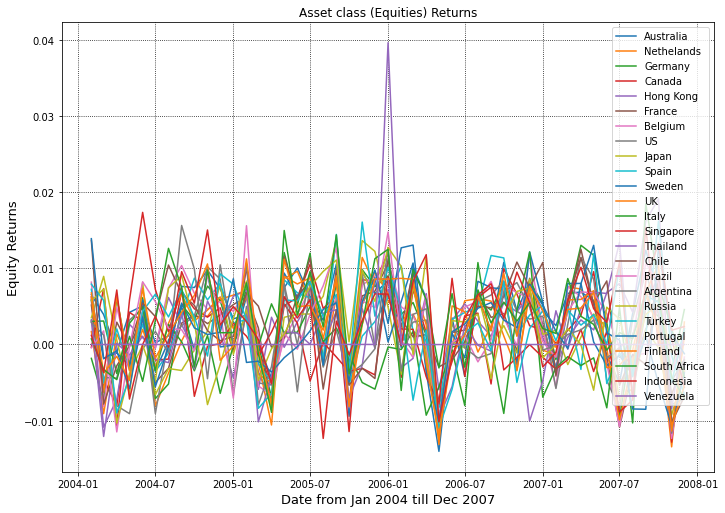

In [81]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.Australia_R, label='Australia')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.Nethelands_R, label='Nethelands')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.Germany_R, label='Germany')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.Canada_R, label='Canada')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.Hong_Kong_R, label='Hong Kong')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.France_R, label='France')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.Belgium_R, label='Belgium')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.US_R, label='US')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.Japan_R, label='Japan')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.Spain_R, label='Spain')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.Sweden_R, label='Sweden')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.UK_R, label='UK')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.Italy_R, label='Italy')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.Singapore_R, label='Singapore')

plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.Thailand_R, label='Thailand')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.Chile_R, label='Chile')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.Brazil_R, label='Brazil')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.Argentina_R, label='Argentina')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.Russia_R, label='Russia')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.Turkey_R, label='Turkey')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.Portugal_R, label='Portugal')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.Finland_R, label='Finland')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.South_Africa_R, label='South Africa')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.Indonesia_R, label='Indonesia')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.Venezuela_R, label='Venezuela')

plt.title('Asset class (Equities) Returns')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Equity Returns', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

In [82]:
# Adding up all the returns of all asset classes for all countries

In [83]:
equity_df_2004_2007_2['Portfolio_R'] = equity_df_2004_2007_2['Australia_R'] + equity_df_2004_2007_2['Nethelands_R'] + equity_df_2004_2007_2['Germany_R'] + equity_df_2004_2007_2['Canada_R'] + equity_df_2004_2007_2['Hong_Kong_R'] + equity_df_2004_2007_2['France_R'] + equity_df_2004_2007_2['Belgium_R'] + equity_df_2004_2007_2['US_R'] + equity_df_2004_2007_2['Japan_R'] + equity_df_2004_2007_2['Spain_R'] + equity_df_2004_2007_2['Sweden_R'] + equity_df_2004_2007_2['UK_R'] + equity_df_2004_2007_2['Italy_R'] + equity_df_2004_2007_2['Singapore_R'] + equity_df_2004_2007_2['Thailand_R'] + equity_df_2004_2007_2['Chile_R'] + equity_df_2004_2007_2['Brazil_R'] + equity_df_2004_2007_2['Argentina_R'] + equity_df_2004_2007_2['Russia_R'] + equity_df_2004_2007_2['Turkey_R'] + equity_df_2004_2007_2['Portugal_R'] + equity_df_2004_2007_2['Finland_R'] + equity_df_2004_2007_2['South_Africa_R'] + equity_df_2004_2007_2['Indonesia_R'] + equity_df_2004_2007_2['Venezuela_R']

In [84]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [85]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
equity_df_2004_2007_2['Equity_Port_Value'] = ((equity_df_2004_2007_2['Portfolio_R'] + 1).cumprod())*1000

In [86]:
equity_df_2004_2007_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R','Italy_R',
                       'Singapore_R', 'Thailand_R','Chile_R','Brazil_R','Argentina_R','Russia_R',
                       'Turkey_R','Portugal_R','Finland_R','South_Africa_R','Indonesia_R',
                       'Venezuela_R', 'Portfolio_R', 'Equity_Port_Value']].head(5)

Australia_R  Nethelands_R  Germany_R  Canada_R  Hong_Kong_R  \
Date                                                                      
2004-02-01     0.006532      0.001698  -0.001826  0.006281     0.005731   
2004-03-01     0.003927     -0.009089  -0.007363 -0.004618    -0.010864   
2004-04-01    -0.001024      0.001371   0.006106 -0.007981    -0.007182   
2004-05-01     0.004214     -0.002261  -0.002933  0.004214     0.002635   
2004-06-01     0.005068      0.004307   0.006136  0.003053     0.000885   

            France_R  Belgium_R      US_R   Japan_R   Spain_R  ...  \
Date                                                           ...   
2004-02-01  0.005172   0.008184  0.003229  0.003514  0.007239  ...   
2004-03-01 -0.005818  -0.008126 -0.004327  0.008946 -0.005038  ...   
2004-04-01  0.002926   0.004886 -0.004441  0.000581  0.002048  ...   
2004-05-01 -0.000274  -0.001945  0.003196 -0.006552 -0.003328  ...   
2004-06-01  0.003734   0.004487  0.004758  0.008126  0.002686  ...   

            Argentina_R  Russia_R  Turkey_R  Portugal_R  Finland_R  \
Date                                                                 
2004-02-01     0.002900  0.005734  0.007922    0.013895   0.006772   
2004-03-01     0.001224  0.007280  0.005782   -0.001857  -0.003768   
2004-04-01    -0.008049 -0.010328 -0.009007   -0.000837  -0.001559   
2004-05-01    -0.009087 -0.003773 -0.004384   -0.005819  -0.004738   
2004-06-01    -0.000588 -0.000084  0.004356    0.003578   0.007356   

            South_Africa_R  Indonesia_R  Venezuela_R  Portfolio_R  \
Date                                                                
2004-02-01        0.000737     0.001194    -0.000005     0.115945   
2004-03-01       -0.003292    -0.003682    -0.000006    -0.056525   
2004-04-01       -0.004618     0.007158     0.000003    -0.053356   
2004-05-01        0.001062    -0.007167     0.000010    -0.036437   
2004-06-01       -0.004846    -0.000018     0.000002     0.097912   

            Equity_Port_Value  
Date                           
2004-02-01        1115.944771  
2004-03-01        1052.866550  
2004-04-01         996.689433  
2004-05-01         960.373490  
2004-06-01        1054.405811  

[5 rows x 27 columns]

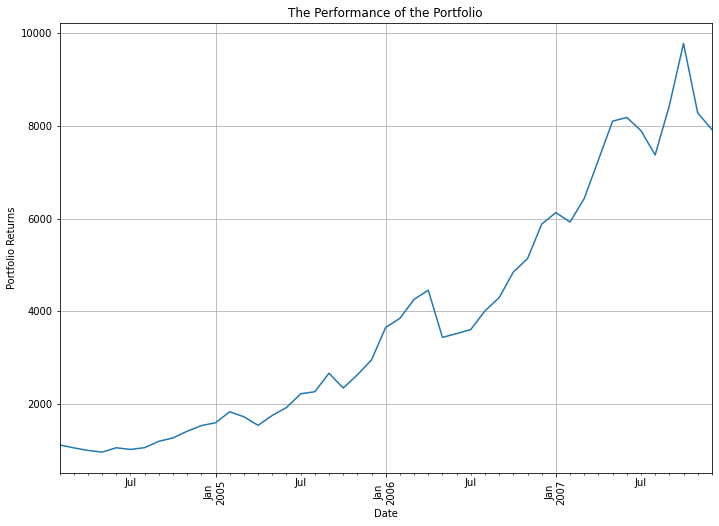

In [87]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio');
plt.xlabel('Date');
plt.ylabel('Portfolio Returns');
equity_df_2004_2007_2['Equity_Port_Value'].plot(grid=True)
plt.xticks(rotation=90);
plt.show();

In [88]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
(equity_df_2004_2007_2.Equity_Port_Value.max() - equity_df_2004_2007_2.Equity_Port_Value.min()) / equity_df_2004_2007_2.Equity_Port_Value.max()

0.901774203469307

In [89]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (equity_df_2004_2007_2['Equity_Port_Value'][-1] / equity_df_2004_2007_2['Equity_Port_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f}%".format(cumulative_return))

The Cumulative Return of the Portfolio is 609.78%


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [90]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
equity_df_2004_2007_2['Monthly_Return'] = equity_df_2004_2007_2['Equity_Port_Value'].pct_change(1)

In [91]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = equity_df_2004_2007_2['Monthly_Return'].mean() / equity_df_2004_2007_2['Monthly_Return'].std()
Sharpe_Ratio

0.49625112890008016

In [92]:
equity_df_2004_2007_2.shape[0]

47

In [93]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(47)
Annualized_Sharpe_Ratio

3.402126334798046

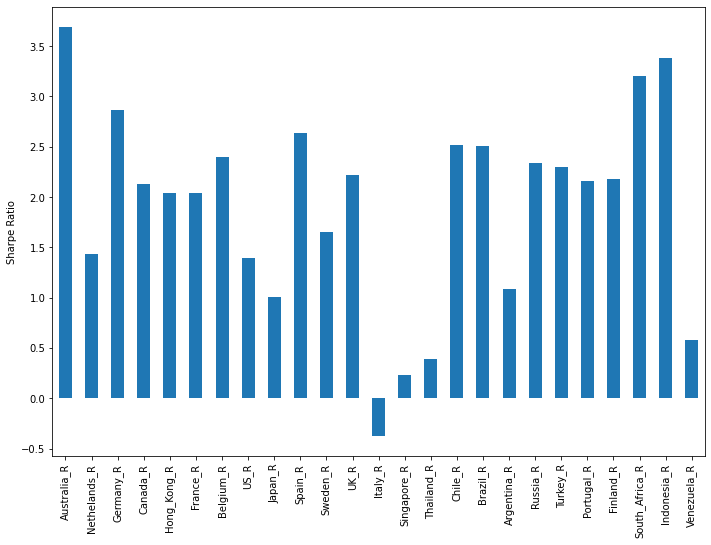

In [94]:
# Calcualte the Sharpe Ratio for equity portfolio
def equity_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = equity_df_2004_2007_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                       'Italy_R','Singapore_R','Thailand_R','Chile_R','Brazil_R','Argentina_R',
                                       'Russia_R','Turkey_R','Portugal_R','Finland_R','South_Africa_R',
                                       'Indonesia_R','Venezuela_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
equity_sharpes = equity_df_2004_2007_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                       'Italy_R','Singapore_R','Thailand_R','Chile_R','Brazil_R','Argentina_R',
                                       'Russia_R','Turkey_R','Portugal_R','Finland_R','South_Africa_R',
                                       'Indonesia_R','Venezuela_R']].apply(equity_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
equity_sharpes.plot.bar();   

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

In [95]:
# Calcualte the Sortino Ratio for equity portfolio
def equity_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

In [96]:
bond_sortino_ratio(bond_df_2004_2007_2['Portfolio_R'], 47, .0164)

-0.6170097287918097

In [97]:
Annualized_Sortino_Ratio = -0.6170097287918097 * np.sqrt(47)
Annualized_Sortino_Ratio

-4.230005585683771

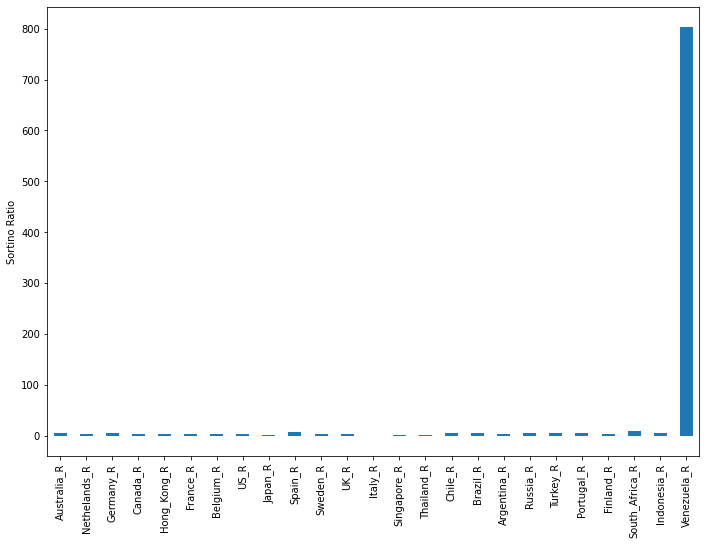

In [98]:
# Calcualte the Sortino Ratio for equity portfolio
def equity_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = equity_df_2004_2007_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                       'Italy_R','Singapore_R','Thailand_R','Chile_R','Brazil_R','Argentina_R',
                                       'Russia_R','Turkey_R','Portugal_R','Finland_R','South_Africa_R',
                                       'Indonesia_R','Venezuela_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
equity_sortinos = equity_df_2004_2007_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                       'Italy_R','Singapore_R','Thailand_R','Chile_R','Brazil_R','Argentina_R',
                                       'Russia_R','Turkey_R','Portugal_R','Finland_R','South_Africa_R',
                                       'Indonesia_R','Venezuela_R']].apply(equity_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
equity_sortinos.plot.bar();   

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

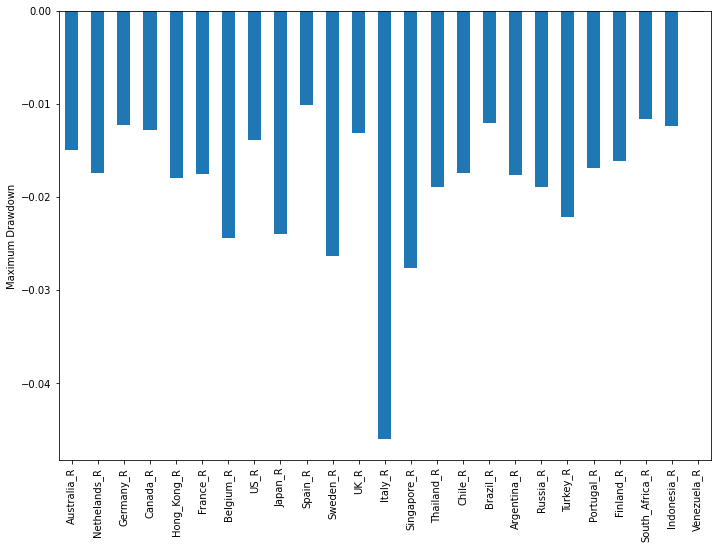

In [99]:
# Calcualte the Maximum Drawdown (MDD) for bond portfolio
def equity_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = equity_df_2004_2007_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                       'Italy_R','Singapore_R','Thailand_R','Chile_R','Brazil_R','Argentina_R',
                                       'Russia_R','Turkey_R','Portugal_R','Finland_R','South_Africa_R',
                                       'Indonesia_R','Venezuela_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
equity_max_drawdown = equity_df_2004_2007_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                       'Italy_R','Singapore_R','Thailand_R','Chile_R','Brazil_R','Argentina_R',
                                       'Russia_R','Turkey_R','Portugal_R','Finland_R','South_Africa_R',
                                       'Indonesia_R','Venezuela_R']].apply(equity_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
equity_max_drawdown.plot.bar();   

**Skewness**

- Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. 
- If the curve is shifted to the left or to the right, it is said to be skewed. 
- Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. - A normal distribution has a skew of zero, while a lognormal distribution, for example, would exhibit some degree of right-skew.

In [100]:
skew(equity_df_2004_2007_2['Equity_Port_Value'].dropna())

0.6552489667035201

**Kurtosis**

- kurtosis is a statistical measure that is used to describe distribution.
- Whereas skewness differentiates extreme values in one versus the other tail, kurtosis measures extreme values in either tail. - Distributions with large kurtosis exhibit tail data exceeding the tails of the normal distribution (e.g., five or more standard deviations from the mean).
- Distributions with low kurtosis exhibit tail data that are generally less extreme than the tails of the normal distribution.

In [101]:
kurtosis(equity_df_2004_2007_2['Equity_Port_Value'].dropna())

-0.8629483979416204

**the Geometric Mean**

- The geometric mean is the average of a set of products, the calculation of which is commonly used to determine the performance results of an investment or portfolio.
- It is technically defined as "the nth root product of n numbers."
- The geometric mean must be used when working with percentages, which are derived from values, while the standard arithmetic mean works with the values themselves.

**the Geometric Mean Rate of Return**
- The geometric mean return formula is used to calculate the average rate per period on an investment that is compounded over multiple periods.
- The geometric mean rate of return (GMRR) is calculated by add return relative (per period return relative) and then subract 1.

In [102]:
# Calculate Geometric Mean Rate of Return (GMRR)
def geometric_mean_return(iterable):
    a = np.array(abs(iterable))
    return a.prod()**(1.0/len(a))

In [103]:
geometric_mean_return(equity_df_2004_2007_2['Portfolio_R'])

0.07629321965270354

**The Information Ratio**

- The information ratio (IR) is a measurement of portfolio returns beyond the returns of a benchmark, usually an index, compared to the volatility of those returns.
- In other words, the information ratio (IR) is an extension of the Sharpe Ratio which replaces the risk-free rate of return with the return of a benchmark portfolio.
- The benchmark used is typically an index that represents the market or a particular sector or industry.
- The information ratio measures the risk-adjusted returns of a financial asset or portfolio relative to a certain benchmark.
- This ratio aims to show excess returns relative to the benchmark, as well as the consistency in generating the excess returns. 
- The consistency of generating excess returns is measured by the tracking error.

In [104]:
def information_ratio(returns, benchmark_returns,n):
    return_difference = returns - benchmark_returns
    volatility = np.std(return_difference) * np.sqrt(n)
    information_ratio = np.mean(return_difference) / volatility
    return information_ratio

In [105]:
information_ratio(equity_df_2004_2007_2['Portfolio_R'], 0.009160196689798377, 47)

0.06179292734040886

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2004 till December 2007.
- Target volatility 4 %.
- Maximum Drawdown 90 %.
- Cumulative return of the of portfolio 609.78 %
- Sharpe Ratio, or Risk-Adjusted Returns 49.62 %.
- Annualized Sharpe Ratio 400.14 %.
- Sortino Ratio - 61.70 %.
- Annualized Sortino Ratio - 400.23 %
- Skewness 65.52 %.
- Kurtosis - 86.29 %.
- Geometric Mean Rate of Returns 0.07629321965270354
- Information Ratio 6.17 %.

In [106]:
# Dataset (Commodity.csv) from Master Equity Portfolio Excel file
# Dataset includes: Gold, WTI (West Texas Intermediate Crude Oil), Heat Oil, Natural Gas, Silver, US Coffee,
# US Corn, Wheat, Copper, Platinum, and Cocoa

# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
commodity_df_2004_2007 = pd.read_csv('Commodity_2004_2007.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(commodity_df_2004_2007.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
commodity_df_2004_2007.head()

(48, 12)


Date   Gold    WTI  Heat_Oil  Natural_Gas  Silver  US_Coffee  US_Corn  \
0  1/1/2004  402.2  33.05      1.70         5397    6246      75.50   276.25   
1  2/1/2004  396.4  36.16      1.75         5416    6696      75.05   296.25   
2  3/1/2004  427.3  35.76      1.72         5933    7936      73.75   320.00   
3  4/1/2004  387.0  37.38      1.71         5862    5867      67.15   316.50   
4  5/1/2004  394.0  39.88      1.87         6442    6105      85.55   304.00   

    Wheat  Copper  Platinum  Cocoa  
0  389.00   11430     894.0   3132  
1  380.75   13430     835.2   3239  
2  408.00   13590     988.8   3148  
3  381.50   12100     909.7   3040  
4  362.00   12780    1010.1   3055

In [107]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
commodity_df_2004_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         48 non-null     object 
 1   Gold         48 non-null     float64
 2   WTI          48 non-null     float64
 3   Heat_Oil     48 non-null     float64
 4   Natural_Gas  48 non-null     int64  
 5   Silver       48 non-null     int64  
 6   US_Coffee    48 non-null     float64
 7   US_Corn      48 non-null     float64
 8   Wheat        48 non-null     float64
 9   Copper       48 non-null     int64  
 10  Platinum     48 non-null     float64
 11  Cocoa        48 non-null     int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 4.6+ KB


In [108]:
# Use pandas.to_datetime() function to convert argument to datetime
commodity_df_2004_2007['Date'] = pd.to_datetime(commodity_df_2004_2007.Date)

In [109]:
# Use pandas.DataFrame.astype() function to casta pandas object to a specified data type
commodity_df_2004_2007['Natural_Gas'] = commodity_df_2004_2007['Natural_Gas'].astype(float)
commodity_df_2004_2007['Silver'] = commodity_df_2004_2007['Silver'].astype(float)
commodity_df_2004_2007['Copper'] = commodity_df_2004_2007['Copper'].astype(float)
commodity_df_2004_2007['Cocoa'] = commodity_df_2004_2007['Cocoa'].astype(float)

In [110]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
commodity_df_2004_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         48 non-null     datetime64[ns]
 1   Gold         48 non-null     float64       
 2   WTI          48 non-null     float64       
 3   Heat_Oil     48 non-null     float64       
 4   Natural_Gas  48 non-null     float64       
 5   Silver       48 non-null     float64       
 6   US_Coffee    48 non-null     float64       
 7   US_Corn      48 non-null     float64       
 8   Wheat        48 non-null     float64       
 9   Copper       48 non-null     float64       
 10  Platinum     48 non-null     float64       
 11  Cocoa        48 non-null     float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 4.6 KB


In [111]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
commodity_df_2004_2007.set_index('Date',inplace=True)

In [112]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
commodity_df_2004_2007.isnull().any()

Gold           False
WTI            False
Heat_Oil       False
Natural_Gas    False
Silver         False
US_Coffee      False
US_Corn        False
Wheat          False
Copper         False
Platinum       False
Cocoa          False
dtype: bool

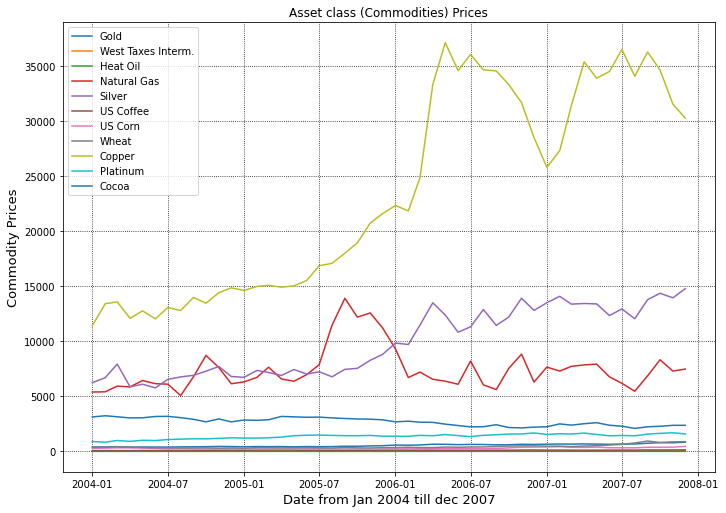

In [113]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.Gold, label='Gold')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.WTI, label='West Taxes Interm.')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.Heat_Oil, label='Heat Oil')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.Natural_Gas, label='Natural Gas')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.Silver, label='Silver')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.US_Coffee, label='US Coffee')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.US_Corn, label='US Corn')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.Wheat, label='Wheat')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.Copper, label='Copper')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.Platinum, label='Platinum')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.Cocoa, label='Cocoa')
plt.title('Asset class (Commodities) Prices')
plt.xlabel('Date from Jan 2004 till dec 2007', fontsize=13)
plt.ylabel('Commodity Prices', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

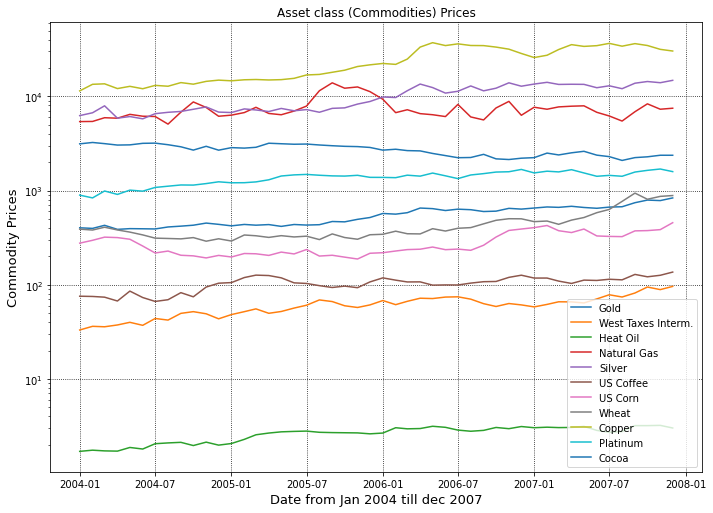

In [114]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.Gold, label='Gold')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.WTI, label='West Taxes Interm.')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.Heat_Oil, label='Heat Oil')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.Natural_Gas, label='Natural Gas')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.Silver, label='Silver')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.US_Coffee, label='US Coffee')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.US_Corn, label='US Corn')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.Wheat, label='Wheat')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.Copper, label='Copper')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.Platinum, label='Platinum')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.Cocoa, label='Cocoa')
plt.title('Asset class (Commodities) Prices')
plt.xlabel('Date from Jan 2004 till dec 2007', fontsize=13)
plt.ylabel('Commodity Prices', fontsize=13)
plt.yscale('log')
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=4);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [115]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
commodity_df_2004_2007 = commodity_df_2004_2007[['Gold','WTI','Heat_Oil','Natural_Gas','Silver','US_Coffee',
                                                 'US_Corn','Wheat','Copper','Platinum','Cocoa']].pct_change()
commodity_df_2004_2007.head(5)

Gold       WTI  Heat_Oil  Natural_Gas    Silver  US_Coffee  \
Date                                                                         
2004-01-01       NaN       NaN       NaN          NaN       NaN        NaN   
2004-02-01 -0.014421  0.094100  0.029412     0.003520  0.072046  -0.005960   
2004-03-01  0.077952 -0.011062 -0.017143     0.095458  0.185185  -0.017322   
2004-04-01 -0.094313  0.045302 -0.005814    -0.011967 -0.260711  -0.089492   
2004-05-01  0.018088  0.066881  0.093567     0.098942  0.040566   0.274013   

             US_Corn     Wheat    Copper  Platinum     Cocoa  
Date                                                          
2004-01-01       NaN       NaN       NaN       NaN       NaN  
2004-02-01  0.072398 -0.021208  0.174978 -0.065772  0.034163  
2004-03-01  0.080169  0.071569  0.011914  0.183908 -0.028095  
2004-04-01 -0.010938 -0.064951 -0.109639 -0.079996 -0.034307  
2004-05-01 -0.039494 -0.051114  0.056198  0.110366  0.004934

In [116]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
commodity_df_2004_2007.dropna(axis=0, inplace=True)
commodity_df_2004_2007.head(5)

Gold       WTI  Heat_Oil  Natural_Gas    Silver  US_Coffee  \
Date                                                                         
2004-02-01 -0.014421  0.094100  0.029412     0.003520  0.072046  -0.005960   
2004-03-01  0.077952 -0.011062 -0.017143     0.095458  0.185185  -0.017322   
2004-04-01 -0.094313  0.045302 -0.005814    -0.011967 -0.260711  -0.089492   
2004-05-01  0.018088  0.066881  0.093567     0.098942  0.040566   0.274013   
2004-06-01 -0.003553 -0.070963 -0.037433    -0.044551 -0.053890  -0.145529   

             US_Corn     Wheat    Copper  Platinum     Cocoa  
Date                                                          
2004-02-01  0.072398 -0.021208  0.174978 -0.065772  0.034163  
2004-03-01  0.080169  0.071569  0.011914  0.183908 -0.028095  
2004-04-01 -0.010938 -0.064951 -0.109639 -0.079996 -0.034307  
2004-05-01 -0.039494 -0.051114  0.056198  0.110366  0.004934  
2004-06-01 -0.152961 -0.066298 -0.057121 -0.024849  0.038298

In [117]:
print('There are {} rows in the DataFrame'.format(commodity_df_2004_2007.shape[0]))

There are 47 rows in the DataFrame


In [118]:
# Use pandas.DataFrame.copy() function to make a copy of commodity_df
commodity_df_2004_2007_2 = commodity_df_2004_2007.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.

In [119]:
vol_com_df_2004_2007 = commodity_df_2004_2007

In [120]:
vol_com_df_2004_2007.shape[0]

47

In [121]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_com_df_2004_2007['Gold_Vol'] = vol_com_df_2004_2007['Gold'].rolling(47).std() * math.sqrt(47)
vol_com_df_2004_2007['WTI_Vol'] = vol_com_df_2004_2007['WTI'].rolling(47).std() * math.sqrt(47)
vol_com_df_2004_2007['Heat_Oil_Vol'] = vol_com_df_2004_2007['Heat_Oil'].rolling(47).std() * math.sqrt(47)
vol_com_df_2004_2007['Natural_Gas_Vol'] = vol_com_df_2004_2007['Natural_Gas'].rolling(47).std() * math.sqrt(47)
vol_com_df_2004_2007['Silver_Vol'] = vol_com_df_2004_2007['Silver'].rolling(47).std() * math.sqrt(47)
vol_com_df_2004_2007['US_Coffee_Vol'] = vol_com_df_2004_2007['US_Coffee'].rolling(47).std() * math.sqrt(47)
vol_com_df_2004_2007['US_Corn_Vol'] = vol_com_df_2004_2007['US_Corn'].rolling(47).std() * math.sqrt(47)
vol_com_df_2004_2007['Wheat_Vol'] = vol_com_df_2004_2007['Wheat'].rolling(47).std() * math.sqrt(47)
vol_com_df_2004_2007['Copper_Vol'] = vol_com_df_2004_2007['Copper'].rolling(47).std() * math.sqrt(47)
vol_com_df_2004_2007['Platinum_Vol'] = vol_com_df_2004_2007['Platinum'].rolling(47).std() * math.sqrt(47)
vol_com_df_2004_2007['Cocoa_Vol'] = vol_com_df_2004_2007['Cocoa'].rolling(47).std() * math.sqrt(47)

In [122]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_com_df_2004_2007.dropna(axis=0, inplace=True)

In [123]:
vol_com_df_2004_2007[['Gold_Vol','WTI_Vol','Heat_Oil_Vol','Natural_Gas_Vol','Silver_Vol','US_Coffee_Vol','US_Corn_Vol',
                      'Wheat_Vol','Copper_Vol','Platinum_Vol','Cocoa_Vol']]

Gold_Vol   WTI_Vol  Heat_Oil_Vol  Natural_Gas_Vol  Silver_Vol  \
Date                                                                        
2007-12-01  0.306134  0.554422      0.394152         1.194513    0.630244   

            US_Coffee_Vol  US_Corn_Vol  Wheat_Vol  Copper_Vol  Platinum_Vol  \
Date                                                                          
2007-12-01       0.630225      0.61633   0.577043    0.571878      0.401136   

            Cocoa_Vol  
Date                   
2007-12-01   0.358956

**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy which focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is an inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [124]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
volatility_com = (0.306134+0.554422+0.394152+1.194513+0.630244+0.630225+0.61633+0.577043+0.571878+0.401136+0.358956) / 11
volatility_com

0.5668211818181818

In [125]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
commodity_target_vol = 0.5668211818181818 / 11
commodity_target_vol

0.05152919834710743

In [126]:
# Create a new dataframe called commodity_portfolio_df which calculates the allocation to each asset class 
port_com_df_2004_2007 = commodity_df_2004_2007

In [127]:
port_com_df_2004_2007['Gold_Alloc'] = commodity_target_vol / vol_com_df_2004_2007['Gold_Vol']
port_com_df_2004_2007['WTI_Alloc'] = commodity_target_vol / vol_com_df_2004_2007['WTI_Vol']
port_com_df_2004_2007['Heat_Oil_Alloc'] = commodity_target_vol / vol_com_df_2004_2007['Heat_Oil_Vol']
port_com_df_2004_2007['Natural_Gas_Alloc'] = commodity_target_vol / vol_com_df_2004_2007['Natural_Gas_Vol']
port_com_df_2004_2007['Silver_Alloc'] = commodity_target_vol / vol_com_df_2004_2007['Silver_Vol']
port_com_df_2004_2007['US_Coffee_Alloc'] = commodity_target_vol / vol_com_df_2004_2007['US_Coffee_Vol']
port_com_df_2004_2007['US_Corn_Alloc'] = commodity_target_vol / vol_com_df_2004_2007['US_Corn_Vol']
port_com_df_2004_2007['Wheat_Alloc'] = commodity_target_vol / vol_com_df_2004_2007['Wheat_Vol']
port_com_df_2004_2007['Copper_Alloc'] = commodity_target_vol / vol_com_df_2004_2007['Copper_Vol']
port_com_df_2004_2007['Platinum_Alloc'] = commodity_target_vol / vol_com_df_2004_2007['Platinum_Vol']
port_com_df_2004_2007['Cocoa_Alloc'] = commodity_target_vol / vol_com_df_2004_2007['Cocoa_Vol']

In [128]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
port_com_df_2004_2007.dropna(axis=0, inplace=True)

In [129]:
port_com_df_2004_2007[['Gold_Alloc','WTI_Alloc','Heat_Oil_Alloc','Natural_Gas_Alloc','Silver_Alloc',
                        'US_Coffee_Alloc','US_Corn_Alloc','Wheat_Alloc','Copper_Alloc','Platinum_Alloc','Cocoa_Alloc']]

Gold_Alloc  WTI_Alloc  Heat_Oil_Alloc  Natural_Gas_Alloc  \
Date                                                                   
2007-12-01    0.168322   0.092942        0.130734           0.043138   

            Silver_Alloc  US_Coffee_Alloc  US_Corn_Alloc  Wheat_Alloc  \
Date                                                                    
2007-12-01      0.081761         0.081763       0.083607     0.089299   

            Copper_Alloc  Platinum_Alloc  Cocoa_Alloc  
Date                                                   
2007-12-01      0.090105        0.128458     0.143553

In [130]:
# I will multiply the monthly commodity prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (Commodity)

In [131]:
commodity_df_2004_2007_2['Gold_R'] = commodity_df_2004_2007_2['Gold'] * 0.168322
commodity_df_2004_2007_2['WTI_R'] = commodity_df_2004_2007_2['WTI'] * 0.092942
commodity_df_2004_2007_2['Heat_Oil_R'] = commodity_df_2004_2007_2['Heat_Oil'] * 0.130734
commodity_df_2004_2007_2['Natural_Gas_R'] = commodity_df_2004_2007_2['Natural_Gas'] * 0.043138
commodity_df_2004_2007_2['Silver_R'] = commodity_df_2004_2007_2['Silver'] * 0.081761
commodity_df_2004_2007_2['US_Coffee_R'] = commodity_df_2004_2007_2['US_Coffee'] * 0.081763
commodity_df_2004_2007_2['US_Corn_R'] = commodity_df_2004_2007_2['US_Corn'] * 0.083607
commodity_df_2004_2007_2['Wheat_R'] = commodity_df_2004_2007_2['Wheat'] * 0.089299
commodity_df_2004_2007_2['Copper_R'] = commodity_df_2004_2007_2['Copper'] * 0.090105
commodity_df_2004_2007_2['Platinum_R'] = commodity_df_2004_2007_2['Platinum'] * 0.128458
commodity_df_2004_2007_2['Cocoa_R'] = commodity_df_2004_2007_2['Cocoa'] * 0.143553

In [132]:
commodity_df_2004_2007_2.head(5)

Gold       WTI  Heat_Oil  Natural_Gas    Silver  US_Coffee  \
Date                                                                         
2004-02-01 -0.014421  0.094100  0.029412     0.003520  0.072046  -0.005960   
2004-03-01  0.077952 -0.011062 -0.017143     0.095458  0.185185  -0.017322   
2004-04-01 -0.094313  0.045302 -0.005814    -0.011967 -0.260711  -0.089492   
2004-05-01  0.018088  0.066881  0.093567     0.098942  0.040566   0.274013   
2004-06-01 -0.003553 -0.070963 -0.037433    -0.044551 -0.053890  -0.145529   

             US_Corn     Wheat    Copper  Platinum  ...     WTI_R  Heat_Oil_R  \
Date                                                ...                         
2004-02-01  0.072398 -0.021208  0.174978 -0.065772  ...  0.008746    0.003845   
2004-03-01  0.080169  0.071569  0.011914  0.183908  ... -0.001028   -0.002241   
2004-04-01 -0.010938 -0.064951 -0.109639 -0.079996  ...  0.004210   -0.000760   
2004-05-01 -0.039494 -0.051114  0.056198  0.110366  ...  0.006216    0.012232   
2004-06-01 -0.152961 -0.066298 -0.057121 -0.024849  ... -0.006595   -0.004894   

            Natural_Gas_R  Silver_R  US_Coffee_R  US_Corn_R   Wheat_R  \
Date                                                                    
2004-02-01       0.000152  0.005891    -0.000487   0.006053 -0.001894   
2004-03-01       0.004118  0.015141    -0.001416   0.006703  0.006391   
2004-04-01      -0.000516 -0.021316    -0.007317  -0.000914 -0.005800   
2004-05-01       0.004268  0.003317     0.022404  -0.003302 -0.004564   
2004-06-01      -0.001922 -0.004406    -0.011899  -0.012789 -0.005920   

            Copper_R  Platinum_R   Cocoa_R  
Date                                        
2004-02-01  0.015766   -0.008449  0.004904  
2004-03-01  0.001073    0.023624 -0.004033  
2004-04-01 -0.009879   -0.010276 -0.004925  
2004-05-01  0.005064    0.014177  0.000708  
2004-06-01 -0.005147   -0.003192  0.005498  

[5 rows x 22 columns]

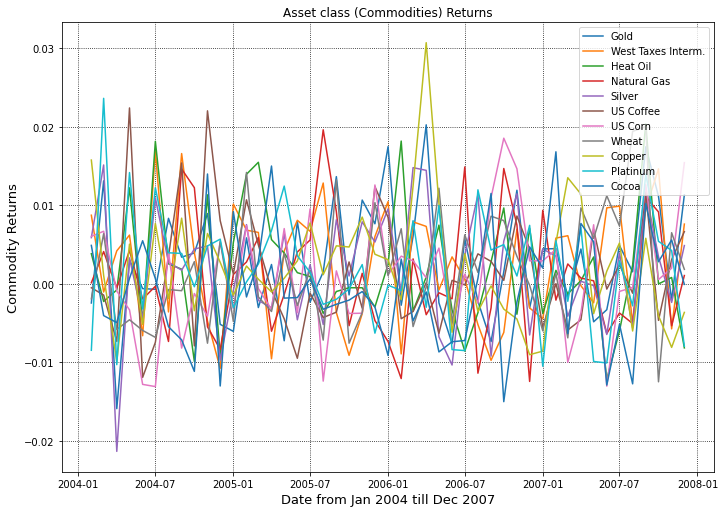

In [133]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(commodity_df_2004_2007_2.index, commodity_df_2004_2007_2.Gold_R, label='Gold')
plt.plot(commodity_df_2004_2007_2.index, commodity_df_2004_2007_2.WTI_R, label='West Taxes Interm.')
plt.plot(commodity_df_2004_2007_2.index, commodity_df_2004_2007_2.Heat_Oil_R, label='Heat Oil')
plt.plot(commodity_df_2004_2007_2.index, commodity_df_2004_2007_2.Natural_Gas_R, label='Natural Gas')
plt.plot(commodity_df_2004_2007_2.index, commodity_df_2004_2007_2.Silver_R, label='Silver')
plt.plot(commodity_df_2004_2007_2.index, commodity_df_2004_2007_2.US_Coffee_R, label='US Coffee')
plt.plot(commodity_df_2004_2007_2.index, commodity_df_2004_2007_2.US_Corn_R, label='US Corn')
plt.plot(commodity_df_2004_2007_2.index, commodity_df_2004_2007_2.Wheat_R, label='Wheat')
plt.plot(commodity_df_2004_2007_2.index, commodity_df_2004_2007_2.Copper_R, label='Copper')
plt.plot(commodity_df_2004_2007_2.index, commodity_df_2004_2007_2.Platinum_R, label='Platinum')
plt.plot(commodity_df_2004_2007_2.index, commodity_df_2004_2007_2.Cocoa_R, label='Cocoa')
plt.title('Asset class (Commodities) Returns')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Commodity Returns', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

In [134]:
# Adding up all the returns of all asset classes for all commodities

In [135]:
commodity_df_2004_2007_2['Portfolio_R'] = commodity_df_2004_2007_2['Gold_R'] + commodity_df_2004_2007_2['WTI_R'] + commodity_df_2004_2007_2['Heat_Oil_R'] + commodity_df_2004_2007_2['Natural_Gas_R'] + commodity_df_2004_2007_2['Silver_R'] + commodity_df_2004_2007_2['US_Coffee_R'] + commodity_df_2004_2007_2['US_Corn_R'] + commodity_df_2004_2007_2['Wheat_R'] + commodity_df_2004_2007_2['Copper_R'] + commodity_df_2004_2007_2['Platinum_R'] + commodity_df_2004_2007_2['Cocoa_R']

In [136]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [137]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
commodity_df_2004_2007_2['Commodity_Port_Value'] = ((commodity_df_2004_2007_2['Portfolio_R'] + 1).cumprod())*1000

In [138]:
commodity_df_2004_2007_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
                          'Wheat_R','Copper_R','Platinum_R','Cocoa_R','Portfolio_R', 'Commodity_Port_Value']].head(5)

Gold_R     WTI_R  Heat_Oil_R  Natural_Gas_R  Silver_R  \
Date                                                                  
2004-02-01 -0.002427  0.008746    0.003845       0.000152  0.005891   
2004-03-01  0.013121 -0.001028   -0.002241       0.004118  0.015141   
2004-04-01 -0.015875  0.004210   -0.000760      -0.000516 -0.021316   
2004-05-01  0.003045  0.006216    0.012232       0.004268  0.003317   
2004-06-01 -0.000598 -0.006595   -0.004894      -0.001922 -0.004406   

            US_Coffee_R  US_Corn_R   Wheat_R  Copper_R  Platinum_R   Cocoa_R  \
Date                                                                           
2004-02-01    -0.000487   0.006053 -0.001894  0.015766   -0.008449  0.004904   
2004-03-01    -0.001416   0.006703  0.006391  0.001073    0.023624 -0.004033   
2004-04-01    -0.007317  -0.000914 -0.005800 -0.009879   -0.010276 -0.004925   
2004-05-01     0.022404  -0.003302 -0.004564  0.005064    0.014177  0.000708   
2004-06-01    -0.011899  -0.012789 -0.005920 -0.005147   -0.003192  0.005498   

            Portfolio_R  Commodity_Port_Value  
Date                                           
2004-02-01     0.032100           1032.099606  
2004-03-01     0.061453           1095.524950  
2004-04-01    -0.073369           1015.147901  
2004-05-01     0.063565           1079.675877  
2004-06-01    -0.051864           1023.679299

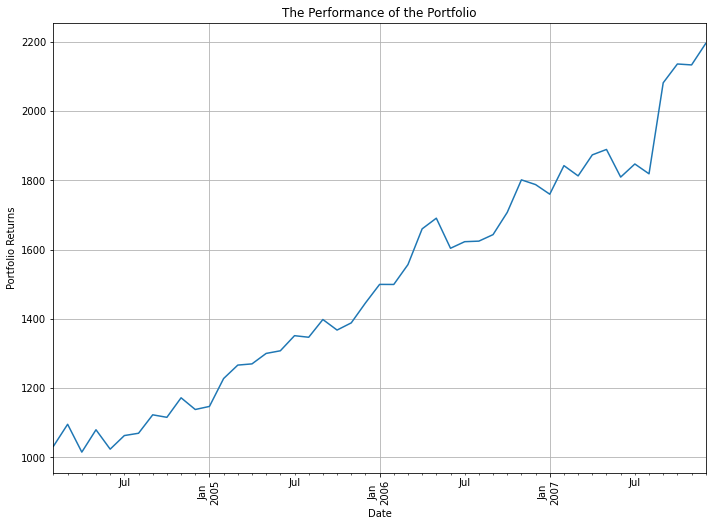

In [139]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio')
plt.xlabel('Date')
plt.ylabel('Portfolio Returns')
commodity_df_2004_2007_2['Commodity_Port_Value'].plot(grid=True)
plt.xticks(rotation=90)
plt.show();

In [140]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
(commodity_df_2004_2007_2.Commodity_Port_Value.max() - commodity_df_2004_2007_2.Commodity_Port_Value.min()) / commodity_df_2004_2007_2.Commodity_Port_Value.max()

0.5375645448133122

In [141]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (commodity_df_2004_2007_2['Commodity_Port_Value'][-1] / commodity_df_2004_2007_2['Commodity_Port_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f}%".format(cumulative_return))

The Cumulative Return of the Portfolio is 112.69%


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [142]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
commodity_df_2004_2007_2['Monthly_Return'] = commodity_df_2004_2007_2['Commodity_Port_Value'].pct_change(1)

In [143]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = commodity_df_2004_2007_2['Monthly_Return'].mean() / commodity_df_2004_2007_2['Monthly_Return'].std()
Sharpe_Ratio

0.45312945214623523

In [144]:
commodity_df_2004_2007_2.shape[0]

47

In [145]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(47)
Annualized_Sharpe_Ratio

3.106499013183542

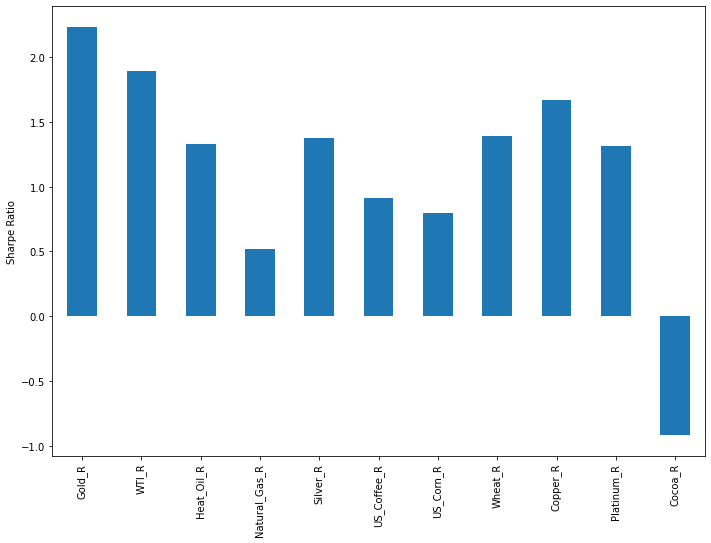

In [146]:
# Calcualte the Sharpe Ratio for commodity portfolio
def commodity_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = commodity_df_2004_2007_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
commodity_sharpes = commodity_df_2004_2007_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']].apply(commodity_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
commodity_sharpes.plot.bar(); 

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

In [147]:
# Calcualte the Sortino Ratio for commodity portfolio
def commodity_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

In [148]:
commodity_df_2004_2007_2.shape[0]

47

In [149]:
commodity_sortino_ratio(commodity_df_2004_2007_2['Portfolio_R'], 47, .0164)

5.224831047031332

In [150]:
Annualized_Sortino_Ratio = 5.224831047031332 * np.sqrt(47)
Annualized_Sortino_Ratio

35.81963700389855

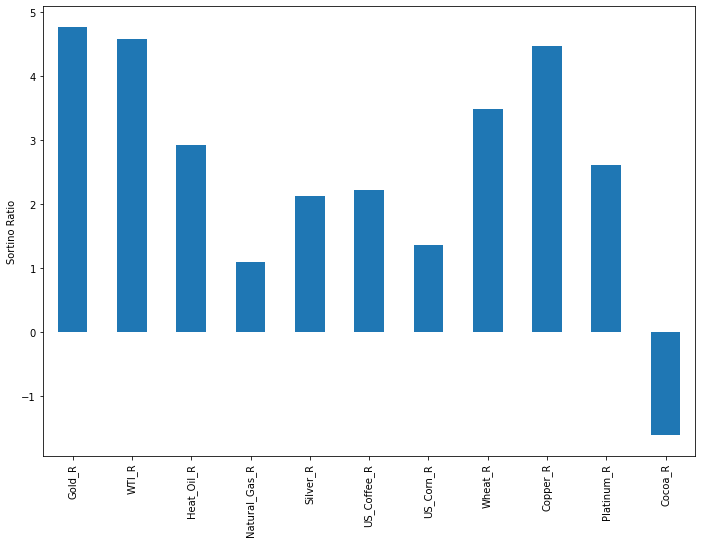

In [151]:
# Calcualte the Sortino Ratio for commodity portfolio
def commodity_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = commodity_df_2004_2007_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
commodity_sortinos = commodity_df_2004_2007_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']].apply(commodity_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
commodity_sortinos.plot.bar(); 

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

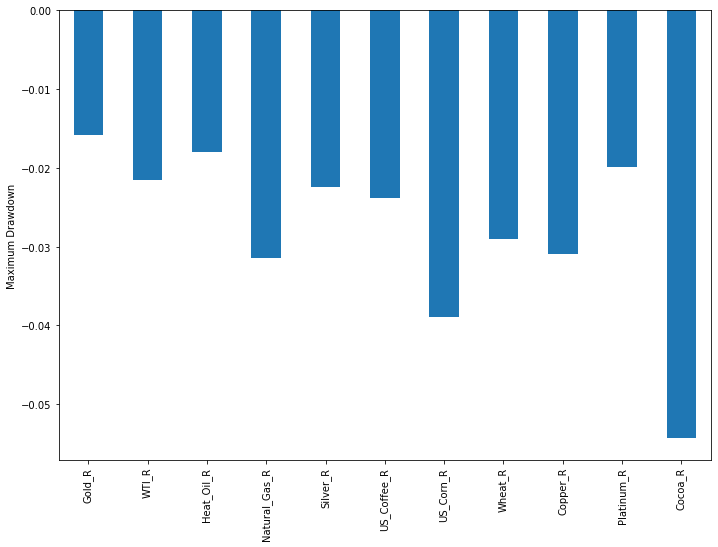

In [152]:
# Calcualte the Maximum Drawdown (MDD) for commodity portfolio
def commodity_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = commodity_df_2004_2007_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
commodity_max_drawdown = commodity_df_2004_2007_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']].apply(commodity_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
commodity_max_drawdown.plot.bar();   

**Skewness**

- Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. 
- If the curve is shifted to the left or to the right, it is said to be skewed. 
- Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. - A normal distribution has a skew of zero, while a lognormal distribution, for example, would exhibit some degree of right-skew.

In [153]:
skew(commodity_df_2004_2007_2['Commodity_Port_Value'].dropna())

0.25130311741587474

**Kurtosis**

- kurtosis is a statistical measure that is used to describe distribution.
- Whereas skewness differentiates extreme values in one versus the other tail, kurtosis measures extreme values in either tail. - Distributions with large kurtosis exhibit tail data exceeding the tails of the normal distribution (e.g., five or more standard deviations from the mean).
- Distributions with low kurtosis exhibit tail data that are generally less extreme than the tails of the normal distribution.

In [154]:
kurtosis(commodity_df_2004_2007_2['Commodity_Port_Value'].dropna())

-1.0006302941867644

**the Geometric Mean**

- The geometric mean is the average of a set of products, the calculation of which is commonly used to determine the performance results of an investment or portfolio.
- It is technically defined as "the nth root product of n numbers."
- The geometric mean must be used when working with percentages, which are derived from values, while the standard arithmetic mean works with the values themselves.

**the Geometric Mean Rate of Return**
- The geometric mean return formula is used to calculate the average rate per period on an investment that is compounded over multiple periods.
- The geometric mean rate of return (GMRR) is calculated by add return relative (per period return relative) and then subract 1.

In [155]:
# Calculate Geometric Mean Rate of Return (GMRR)
def geometric_mean_return(iterable):
    a = np.array(abs(iterable))
    return a.prod()**(1.0/len(a))

In [156]:
geometric_mean_return(commodity_df_2004_2007_2['Portfolio_R'])

0.019389233613595576

**The Information Ratio**

- The information ratio (IR) is a measurement of portfolio returns beyond the returns of a benchmark, usually an index, compared to the volatility of those returns.
- In other words, the information ratio (IR) is an extension of the Sharpe Ratio which replaces the risk-free rate of return with the return of a benchmark portfolio.
- The benchmark used is typically an index that represents the market or a particular sector or industry.
- The information ratio measures the risk-adjusted returns of a financial asset or portfolio relative to a certain benchmark.  - This ratio aims to show excess returns relative to the benchmark, as well as the consistency in generating the excess returns. 
- The consistency of generating excess returns is measured by the tracking error.

In [157]:
def information_ratio(returns, benchmark_returns,n):
    return_difference = returns - benchmark_returns
    volatility = np.std(return_difference) * np.sqrt(n)
    information_ratio = np.mean(return_difference) / volatility
    return information_ratio

In [158]:
information_ratio(commodity_df_2004_2007_2['Portfolio_R'], 0.020152365415322428, 47)

-0.010185030967070961

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2004 till December 2007.
- Target volatility 5.15 %.
- Maximum Drawdown 5.37 %.
- Cumulative return of the of portfolio 112.69 %
- Sharpe Ratio, or Risk-Adjusted Returns 45.31 %.
- Annualized Sharpe Ratio 300.10 %.
- Sortino ratio 500.22 %.
- Annualized Sharpe Ratio 3500.81%.
- Skewness 25.13 %.
- Kurtosis - 1.0006.
- Geometric Mean Rate of Returns 0.019389233613595576
- Information Ration - 1.01 %.

In [159]:
# Dataset (Currency.csv) from Master Equity Portfolio Excel file
# We have five different currency:Australian dollar (AUD), Euro, Canadian dollar (CAD), Japanese yen (JPY),
# and British pound sterling (GBP.)

# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
currency_df_2004_2007 = pd.read_csv('Currency_2004_2007.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(currency_df_2004_2007.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
currency_df_2004_2007.head()

(48, 6)


Date   AUD  EURO   CAD     JPY   GBP
0  1/1/2004  1.37  0.92  1.39  120.20  0.68
1  2/1/2004  1.38  0.95  1.33  123.23  0.66
2  3/1/2004  1.40  0.91  1.31  120.76  0.65
3  4/1/2004  1.42  0.90  1.34  119.74  0.66
4  5/1/2004  1.41  0.89  1.33  121.30  0.65

In [160]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
currency_df_2004_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    48 non-null     object 
 1   AUD     48 non-null     float64
 2   EURO    48 non-null     float64
 3   CAD     48 non-null     float64
 4   JPY     48 non-null     float64
 5   GBP     48 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.4+ KB


In [161]:
# Use pandas.to_datetime() function to convert argument to datetime
currency_df_2004_2007['Date'] = pd.to_datetime(currency_df_2004_2007.Date)

In [162]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
currency_df_2004_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    48 non-null     datetime64[ns]
 1   AUD     48 non-null     float64       
 2   EURO    48 non-null     float64       
 3   CAD     48 non-null     float64       
 4   JPY     48 non-null     float64       
 5   GBP     48 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 2.4 KB


In [163]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
currency_df_2004_2007.set_index('Date',inplace=True)

In [164]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
currency_df_2004_2007.isnull().any()

AUD     False
EURO    False
CAD     False
JPY     False
GBP     False
dtype: bool

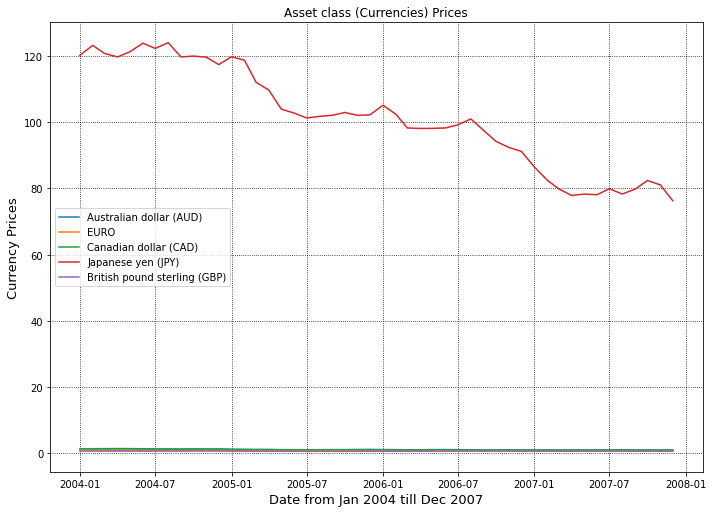

In [165]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(currency_df_2004_2007.index, currency_df_2004_2007.AUD, label='Australian dollar (AUD)')
plt.plot(currency_df_2004_2007.index, currency_df_2004_2007.EURO, label='EURO')
plt.plot(currency_df_2004_2007.index, currency_df_2004_2007.CAD, label='Canadian dollar (CAD)')
plt.plot(currency_df_2004_2007.index, currency_df_2004_2007.JPY, label='Japanese yen (JPY)')
plt.plot(currency_df_2004_2007.index, currency_df_2004_2007.GBP, label='British pound sterling (GBP)')
plt.title('Asset class (Currencies) Prices')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Currency Prices', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=6);

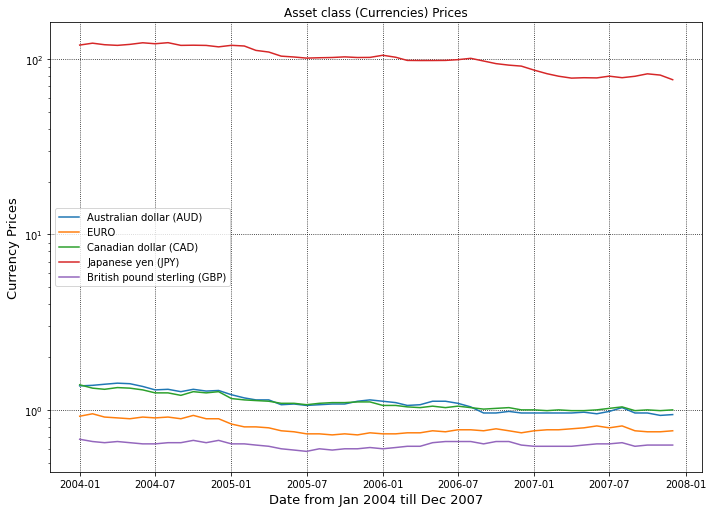

In [166]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(currency_df_2004_2007.index, currency_df_2004_2007.AUD, label='Australian dollar (AUD)')
plt.plot(currency_df_2004_2007.index, currency_df_2004_2007.EURO, label='EURO')
plt.plot(currency_df_2004_2007.index, currency_df_2004_2007.CAD, label='Canadian dollar (CAD)')
plt.plot(currency_df_2004_2007.index, currency_df_2004_2007.JPY, label='Japanese yen (JPY)')
plt.plot(currency_df_2004_2007.index, currency_df_2004_2007.GBP, label='British pound sterling (GBP)')
plt.title('Asset class (Currencies) Prices')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Currency Prices', fontsize=13)
plt.yscale('log')
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=6);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [167]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
currency_df_2004_2007 = currency_df_2004_2007[['AUD','EURO','CAD','JPY','GBP']].pct_change()
currency_df_2004_2007.head(5)

AUD      EURO       CAD       JPY       GBP
Date                                                        
2004-01-01       NaN       NaN       NaN       NaN       NaN
2004-02-01  0.007299  0.032609 -0.043165  0.025208 -0.029412
2004-03-01  0.014493 -0.042105 -0.015038 -0.020044 -0.015152
2004-04-01  0.014286 -0.010989  0.022901 -0.008447  0.015385
2004-05-01 -0.007042 -0.011111 -0.007463  0.013028 -0.015152

In [168]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
currency_df_2004_2007.dropna(axis=0, inplace=True)
currency_df_2004_2007.head(5)

AUD      EURO       CAD       JPY       GBP
Date                                                        
2004-02-01  0.007299  0.032609 -0.043165  0.025208 -0.029412
2004-03-01  0.014493 -0.042105 -0.015038 -0.020044 -0.015152
2004-04-01  0.014286 -0.010989  0.022901 -0.008447  0.015385
2004-05-01 -0.007042 -0.011111 -0.007463  0.013028 -0.015152
2004-06-01 -0.035461  0.022472 -0.022556  0.021270 -0.015385

In [169]:
print('There are {} rows in the DataFrame'.format(currency_df_2004_2007.shape[0]))

There are 47 rows in the DataFrame


In [170]:
# Use pandas.DataFrame.copy() function to make a copy of currency_df
currency_df_2004_2007_2 = currency_df_2004_2007.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.

In [171]:
vol_curr_df_2004_2007 = currency_df_2004_2007

In [172]:
vol_curr_df_2004_2007.shape[0]

47

In [173]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_curr_df_2004_2007['AUD_Vol'] = vol_curr_df_2004_2007['AUD'].rolling(47).std() * math.sqrt(47)
vol_curr_df_2004_2007['EURO_Vol'] = vol_curr_df_2004_2007['EURO'].rolling(47).std() * math.sqrt(47)
vol_curr_df_2004_2007['CAD_Vol'] = vol_curr_df_2004_2007['CAD'].rolling(47).std() * math.sqrt(47)
vol_curr_df_2004_2007['JPY_Vol'] = vol_curr_df_2004_2007['JPY'].rolling(47).std() * math.sqrt(47)
vol_curr_df_2004_2007['GBP_Vol'] = vol_curr_df_2004_2007['GBP'].rolling(47).std() * math.sqrt(47)

In [174]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_curr_df_2004_2007.dropna(axis=0, inplace=True)

In [175]:
vol_curr_df_2004_2007[['AUD_Vol','EURO_Vol','CAD_Vol','JPY_Vol','GBP_Vol']]

AUD_Vol  EURO_Vol   CAD_Vol   JPY_Vol   GBP_Vol
Date                                                        
2007-12-01  0.198605  0.171187  0.160573  0.162692  0.148649

**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy that focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, the Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that the RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [176]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
Avg_vol_curr = (0.198605+0.171187+0.160573+0.162692+0.148649) / 5
Avg_vol_curr

0.16834120000000002

In [177]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
curr_target_vol = 0.16834120000000002 / 5
curr_target_vol

0.03366824

In [178]:
# Create a new dataframe called portfolio_df which calculates the allocation to each asset class 
port_curr_df_2004_2007 = currency_df_2004_2007

In [179]:
port_curr_df_2004_2007['AUD_Alloc'] = curr_target_vol / vol_curr_df_2004_2007['AUD_Vol'] 
port_curr_df_2004_2007['EURO_Alloc'] = curr_target_vol / vol_curr_df_2004_2007['EURO_Vol'] 
port_curr_df_2004_2007['CAD_Alloc'] = curr_target_vol / vol_curr_df_2004_2007['CAD_Vol'] 
port_curr_df_2004_2007['JPY_Alloc'] = curr_target_vol / vol_curr_df_2004_2007['JPY_Vol'] 
port_curr_df_2004_2007['GBP_Alloc'] = curr_target_vol / vol_curr_df_2004_2007['GBP_Vol'] 

In [180]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
port_curr_df_2004_2007.dropna(axis=0, inplace=True)

In [181]:
port_curr_df_2004_2007[['AUD_Alloc','EURO_Alloc','CAD_Alloc','JPY_Alloc','GBP_Alloc']]

AUD_Alloc  EURO_Alloc  CAD_Alloc  JPY_Alloc  GBP_Alloc
Date                                                              
2007-12-01   0.169524    0.196675   0.209676   0.206945   0.226495

In [182]:
# I will multiply the monthly bond prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (currencies)

In [183]:
currency_df_2004_2007_2['AUD_R'] = currency_df_2004_2007_2['AUD'] * 0.169524
currency_df_2004_2007_2['EURO_R'] = currency_df_2004_2007_2['EURO'] * 0.196675
currency_df_2004_2007_2['CAD_R'] = currency_df_2004_2007_2['CAD'] * 0.209676
currency_df_2004_2007_2['JPY_R'] = currency_df_2004_2007_2['JPY'] * 0.206945
currency_df_2004_2007_2['GBP_R'] = currency_df_2004_2007_2['GBP'] * 0.226495

In [184]:
currency_df_2004_2007_2.head(5)

AUD      EURO       CAD       JPY       GBP     AUD_R  \
Date                                                                     
2004-02-01  0.007299  0.032609 -0.043165  0.025208 -0.029412  0.001237   
2004-03-01  0.014493 -0.042105 -0.015038 -0.020044 -0.015152  0.002457   
2004-04-01  0.014286 -0.010989  0.022901 -0.008447  0.015385  0.002422   
2004-05-01 -0.007042 -0.011111 -0.007463  0.013028 -0.015152 -0.001194   
2004-06-01 -0.035461  0.022472 -0.022556  0.021270 -0.015385 -0.006011   

              EURO_R     CAD_R     JPY_R     GBP_R  
Date                                                
2004-02-01  0.006413 -0.009051  0.005217 -0.006662  
2004-03-01 -0.008281 -0.003153 -0.004148 -0.003432  
2004-04-01 -0.002161  0.004802 -0.001748  0.003485  
2004-05-01 -0.002185 -0.001565  0.002696 -0.003432  
2004-06-01  0.004420 -0.004730  0.004402 -0.003485

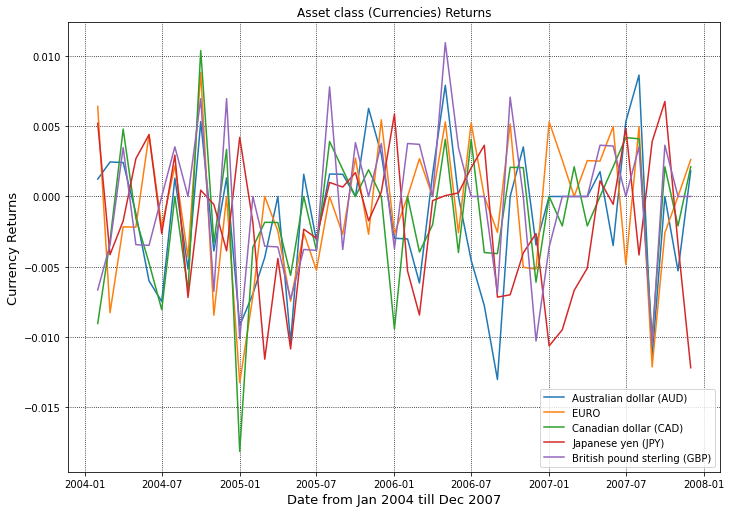

In [185]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(currency_df_2004_2007_2.index, currency_df_2004_2007_2.AUD_R, label='Australian dollar (AUD)')
plt.plot(currency_df_2004_2007_2.index, currency_df_2004_2007_2.EURO_R, label='EURO')
plt.plot(currency_df_2004_2007_2.index, currency_df_2004_2007_2.CAD_R, label='Canadian dollar (CAD)')
plt.plot(currency_df_2004_2007_2.index, currency_df_2004_2007_2.JPY_R, label='Japanese yen (JPY)')
plt.plot(currency_df_2004_2007_2.index, currency_df_2004_2007_2.GBP_R, label='British pound sterling (GBP)')
plt.title('Asset class (Currencies) Returns')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Currency Returns', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=4);

In [186]:
# Adding up all the returns of all asset classes for all currencies (AUD, EURO, CAD, JPY, and GBP)

In [187]:
currency_df_2004_2007_2['Portfolio_R'] = currency_df_2004_2007_2['AUD_R'] + currency_df_2004_2007_2['EURO_R'] + currency_df_2004_2007_2['CAD_R'] + currency_df_2004_2007_2['JPY_R'] + currency_df_2004_2007_2['GBP_R']

In [188]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [189]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
currency_df_2004_2007_2['Currency_Port_Value'] = ((currency_df_2004_2007_2['Portfolio_R'] + 1).cumprod())*1000

In [190]:
currency_df_2004_2007_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R','Portfolio_R', 'Currency_Port_Value']].head(5)

AUD_R    EURO_R     CAD_R     JPY_R     GBP_R  Portfolio_R  \
Date                                                                        
2004-02-01  0.001237  0.006413 -0.009051  0.005217 -0.006662    -0.002845   
2004-03-01  0.002457 -0.008281 -0.003153 -0.004148 -0.003432    -0.016557   
2004-04-01  0.002422 -0.002161  0.004802 -0.001748  0.003485     0.006799   
2004-05-01 -0.001194 -0.002185 -0.001565  0.002696 -0.003432    -0.005679   
2004-06-01 -0.006011  0.004420 -0.004730  0.004402 -0.003485    -0.005404   

            Currency_Port_Value  
Date                             
2004-02-01           997.155003  
2004-03-01           980.645191  
2004-04-01           987.312426  
2004-05-01           981.705014  
2004-06-01           976.399619

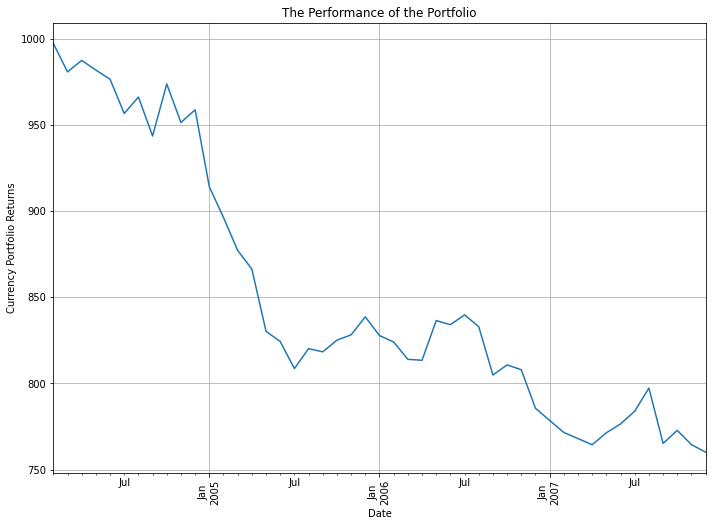

In [191]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio');
plt.xlabel('Date from Jan 2004 till Dec 2007')
plt.ylabel('Currency Portfolio Returns')
currency_df_2004_2007_2['Currency_Port_Value'].plot(grid=True)
plt.xticks(rotation=90);
plt.show();

In [192]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
# (currency_df_2.Portfolio_Value.max() - currency_df_2.Portfolio_Value.min()) / currency_df_2.Portfolio_Value.max()
print("The Maximum Drawdown (MDD) of the Portfolio is {:.2f} %".format((currency_df_2004_2007_2.Currency_Port_Value.max() - currency_df_2004_2007_2.Currency_Port_Value.min()) / currency_df_2004_2007_2.Currency_Port_Value.max()
))

The Maximum Drawdown (MDD) of the Portfolio is 0.24 %


In [193]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (currency_df_2004_2007_2['Currency_Port_Value'][-1] / currency_df_2004_2007_2['Currency_Port_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f} %".format(cumulative_return))

The Cumulative Return of the Portfolio is -23.77 %


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [194]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
currency_df_2004_2007_2['Monthly_Return'] = currency_df_2004_2007_2['Currency_Port_Value'].pct_change(1)

In [195]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = currency_df_2004_2007_2['Monthly_Return'].mean() / currency_df_2004_2007_2['Monthly_Return'].std()
Sharpe_Ratio

-0.3362387210584859

In [196]:
currency_df_2004_2007_2.shape[0]

47

In [197]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(47)
Annualized_Sharpe_Ratio

-2.305136534857572

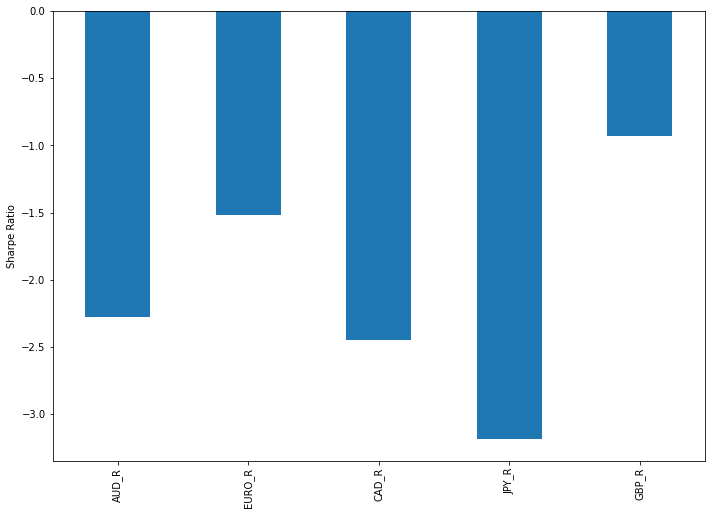

In [198]:
# Calcualte the Sharpe Ratio for currency portfolio
def currency_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = currency_df_2004_2007_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
currency_sharpes = currency_df_2004_2007_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']].apply(currency_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
currency_sharpes.plot.bar(); 

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

In [199]:
# Calcualte the Sortino Ratio for currency portfolio
def currency_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

In [200]:
currency_df_2004_2007_2.shape[0]

47

In [201]:
currency_sortino_ratio(currency_df_2004_2007_2['Portfolio_R'], 47, .0164)

-3.2998857431855626

In [202]:
Annualized_Sortino_Ratio = -3.2998857431855626 * np.sqrt(47)
Annualized_Sortino_Ratio

-22.62287687606792

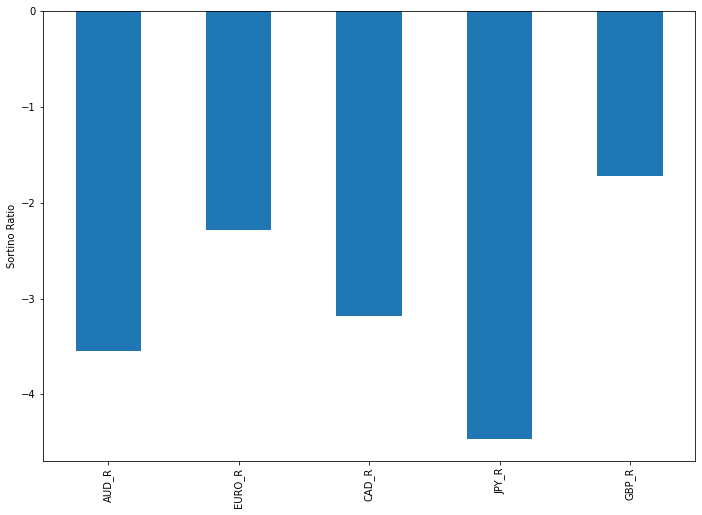

In [203]:
# Calcualte the Sortino Ratio for currency portfolio
def currency_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = currency_df_2004_2007_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
currency_sortinos = currency_df_2004_2007_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']].apply(currency_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
currency_sortinos.plot.bar(); 

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

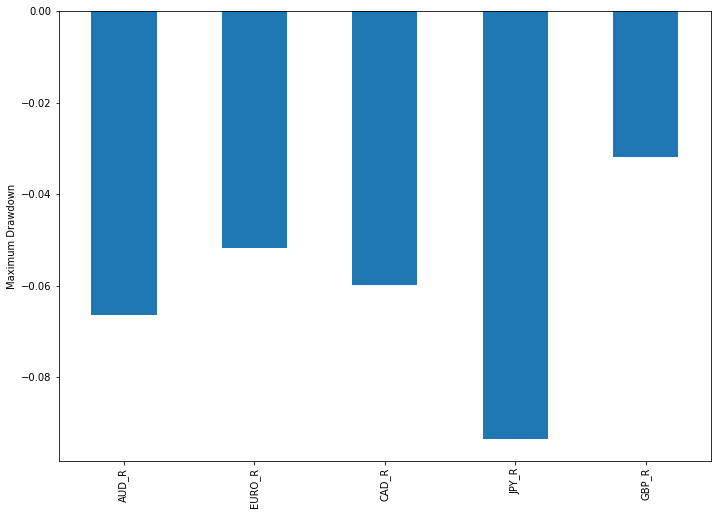

In [204]:
# Calcualte the Maximum Drawdown (MDD) for currency portfolio
def currency_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = currency_df_2004_2007_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
currency_max_drawdown = currency_df_2004_2007_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']].apply(currency_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
currency_max_drawdown.plot.bar();   

**Skewness**

- Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. 
- If the curve is shifted to the left or to the right, it is said to be skewed. 
- Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. - A normal distribution has a skew of zero, while a lognormal distribution, for example, would exhibit some degree of right-skew.

In [205]:
skew(currency_df_2004_2007_2['Currency_Port_Value'].dropna())

0.7338880165208994

**Kurtosis**

- kurtosis is a statistical measure that is used to describe distribution.
- Whereas skewness differentiates extreme values in one versus the other tail, kurtosis measures extreme values in either tail. - Distributions with large kurtosis exhibit tail data exceeding the tails of the normal distribution (e.g., five or more standard deviations from the mean).
- Distributions with low kurtosis exhibit tail data that are generally less extreme than the tails of the normal distribution.

In [206]:
kurtosis(currency_df_2004_2007_2['Currency_Port_Value'].dropna())

-0.8797151554049107

**the Geometric Mean**

- The geometric mean is the average of a set of products, the calculation of which is commonly used to determine the performance results of an investment or portfolio.
- It is technically defined as "the nth root product of n numbers."
- The geometric mean must be used when working with percentages, which are derived from values, while the standard arithmetic mean works with the values themselves.

**the Geometric Mean Rate of Return**
- The geometric mean return formula is used to calculate the average rate per period on an investment that is compounded over multiple periods.
- The geometric mean rate of return (GMRR) is calculated by add return relative (per period return relative) and then subract 1.

In [207]:
# Calculate Geometric Mean Rate of Return (GMRR)
def geometric_mean_return(iterable):
    a = np.array(abs(iterable))
    return a.prod()**(1.0/len(a))

In [208]:
geometric_mean_return(currency_df_2004_2007_2['Portfolio_R'])

0.010004643170027916

**The Information Ratio**

- The information ratio (IR) is a measurement of portfolio returns beyond the returns of a benchmark, usually an index, compared to the volatility of those returns.
- In other words, the information ratio (IR) is an extension of the Sharpe Ratio which replaces the risk-free rate of return with the return of a benchmark portfolio.
- The benchmark used is typically an index that represents the market or a particular sector or industry.
- The information ratio measures the risk-adjusted returns of a financial asset or portfolio relative to a certain benchmark.  - This ratio aims to show excess returns relative to the benchmark, as well as the consistency in generating the excess returns. 
- The consistency of generating excess returns is measured by the tracking error.

In [209]:
def information_ratio(returns, benchmark_returns,n):
    return_difference = returns - benchmark_returns
    volatility = np.std(return_difference) * np.sqrt(n)
    information_ratio = np.mean(return_difference) / volatility
    return information_ratio

In [210]:
information_ratio(currency_df_2004_2007_2['Portfolio_R'], -0.0016504696163150553, 47)

-0.0351575452751919

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2004 till December 2007.
- Target volatility 3.36 %.
- Maximum Drawdown 0.24 %.
- Cumulative return of the of portfolio -23.77 %
- Sharpe Ratio, or Risk-Adjusted Returns - 33.62 %.
- Annualized Sharpe Ratio - 200.30 %.
- Sortino ratio - 300.29 %.
- Annualized Sortino ratio - 2200.62 %.
- Skewness 73.38 %.
- Kurtosis - 87.97 %.
- Geometric Mean Rate of Return 0.010004643170027916
- Information ratio - 3.51 %.

**Benchmark Dataset consists of:**
    
- The Benchmark Currency Index Value (Dow Jones FXCM Dollar Index)
- The Benchmark Equity Index Value (MSCI The World Index Value)
- The Benchmark Commodity Index Value (S & P GSCI Index (^SPGSCI))
- The Benchmark Bond Index Value (FTSE World Government Bond Index Ie 7-10Yr USD)

In [211]:
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
benchmark = pd.read_csv('Benchmark_2004_2007.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(benchmark.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
benchmark.head()

(48, 5)


Dates  benchmark_currency  benchmark_equity  benchmark_commodity  \
0  Jan-31-2004            10957.34           1693.20               260.09   
1  Feb-29-2004            10915.72           1726.68               278.66   
2  Mar-31-2004            10916.52           1715.58               282.12   
3  Apr-30-2004            11306.02           1675.65               289.51   
4  May-31-2004            11182.03           1684.04               301.41   

   benchmark_bond  
0          301.52  
1          301.91  
2          290.18  
3          294.20  
4          294.43

In [212]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
benchmark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dates                48 non-null     object 
 1   benchmark_currency   48 non-null     float64
 2   benchmark_equity     48 non-null     float64
 3   benchmark_commodity  48 non-null     float64
 4   benchmark_bond       48 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [213]:
# Use pandas.to_datetime() function to convert argument to datetime
benchmark['Dates'] = pd.to_datetime(benchmark.Dates)

In [214]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
benchmark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Dates                48 non-null     datetime64[ns]
 1   benchmark_currency   48 non-null     float64       
 2   benchmark_equity     48 non-null     float64       
 3   benchmark_commodity  48 non-null     float64       
 4   benchmark_bond       48 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.0 KB


In [215]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
benchmark.set_index('Dates',inplace=True)

In [216]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
benchmark.isnull().any()

benchmark_currency     False
benchmark_equity       False
benchmark_commodity    False
benchmark_bond         False
dtype: bool

In [217]:
benchmark[['benchmark_currency','benchmark_equity','benchmark_commodity','benchmark_bond']].head(5)

benchmark_currency  benchmark_equity  benchmark_commodity  \
Dates                                                                   
2004-01-31            10957.34           1693.20               260.09   
2004-02-29            10915.72           1726.68               278.66   
2004-03-31            10916.52           1715.58               282.12   
2004-04-30            11306.02           1675.65               289.51   
2004-05-31            11182.03           1684.04               301.41   

            benchmark_bond  
Dates                       
2004-01-31          301.52  
2004-02-29          301.91  
2004-03-31          290.18  
2004-04-30          294.20  
2004-05-31          294.43

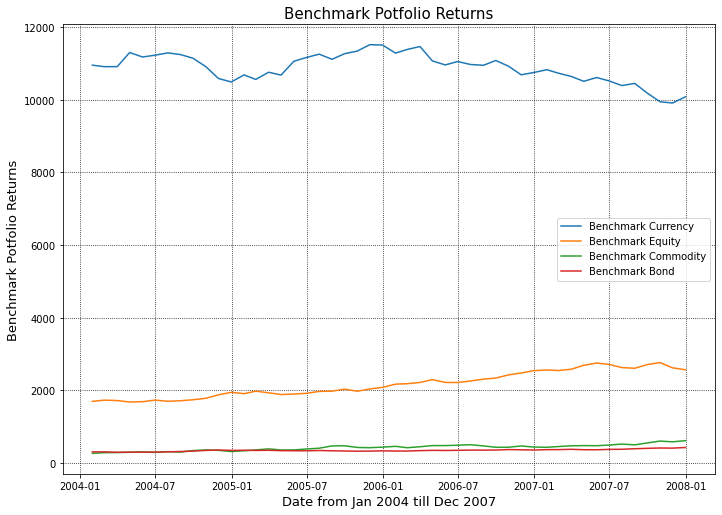

In [218]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(benchmark.index, benchmark.benchmark_currency, label='Benchmark Currency')
plt.plot(benchmark.index, benchmark.benchmark_equity, label='Benchmark Equity')
plt.plot(benchmark.index, benchmark.benchmark_commodity, label='Benchmark Commodity')
plt.plot(benchmark.index, benchmark.benchmark_bond, label='Benchmark Bond')

plt.title('Benchmark Potfolio Returns', fontsize= 15)
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Benchmark Potfolio Returns', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=5);

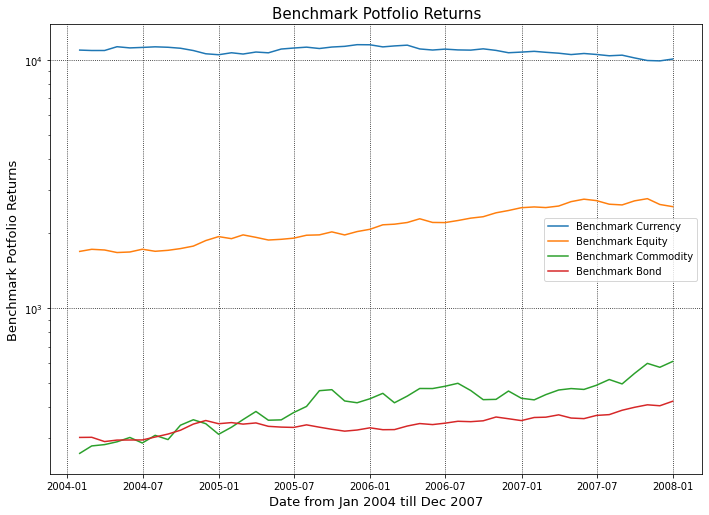

In [219]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(benchmark.index, benchmark.benchmark_currency, label='Benchmark Currency')
plt.plot(benchmark.index, benchmark.benchmark_equity, label='Benchmark Equity')
plt.plot(benchmark.index, benchmark.benchmark_commodity, label='Benchmark Commodity')
plt.plot(benchmark.index, benchmark.benchmark_bond, label='Benchmark Bond')

plt.title('Benchmark Potfolio Returns', fontsize= 15)
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Benchmark Potfolio Returns', fontsize=13)
plt.yscale('log')
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=5);

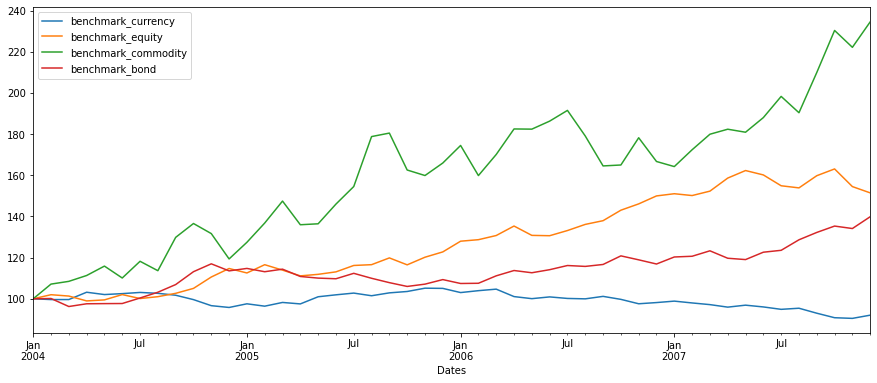

In [220]:
# Normalization of Benchmark dataset to 100
(benchmark /benchmark.iloc[0] * 100).plot(figsize =(15,6))
plt.show();

In [221]:
# Calculate the Returns of each asset class on a Portfolio of Benchmark
# Use pandas.DataFrame.shift() function to Shift index by desired number of periods with an optional time freq.
returns_ben_curr = (benchmark['benchmark_currency'] / benchmark['benchmark_currency'].shift(1)) - 1
returns_ben_equi = (benchmark['benchmark_equity'] / benchmark['benchmark_equity'].shift(1)) - 1
returns_ben_comm = (benchmark['benchmark_commodity'] / benchmark['benchmark_commodity'].shift(1)) - 1
returns_ben_bond = (benchmark['benchmark_bond'] / benchmark['benchmark_bond'].shift(1)) - 1

In [222]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
returns_ben_curr.dropna(axis=0, inplace=True)
returns_ben_equi.dropna(axis=0, inplace=True)
returns_ben_comm.dropna(axis=0, inplace=True)
returns_ben_bond.dropna(axis=0, inplace=True)

In [223]:
# Calculate the arithmetic mean of returns of all asset class on a portfolio of Benchmark
returns_ben_curr_mean = np.mean(returns_ben_curr)
returns_ben_equi_mean = np.mean(returns_ben_equi)
returns_ben_comm_mean = np.mean(returns_ben_comm) 
returns_ben_bond_mean = np.mean(returns_ben_bond)

In [224]:
returns_ben_curr_mean, returns_ben_equi_mean, returns_ben_comm_mean, returns_ben_bond_mean  

(-0.0016504696163150553,
 0.009160196689798377,
 0.020152365415322428,
 0.007417225852882795)

In [225]:
# Calculate the standard deviation of returns of all asset class on a portfolio of Benchmark
returns_ben_curr_sigma = np.std(returns_ben_curr)
returns_ben_equi_sigma = np.std(returns_ben_equi)
returns_ben_comm_sigma = np.std(returns_ben_comm) 
returns_ben_bond_sigma = np.std(returns_ben_bond)

In [226]:
returns_ben_curr_sigma, returns_ben_equi_sigma, returns_ben_comm_sigma, returns_ben_bond_sigma  

(0.015137642361706404,
 0.023887026747790058,
 0.06103067990377925,
 0.022443594416415837)

**Skewness**

In [227]:
skew(benchmark['benchmark_bond'].dropna())

0.4488188487969897

In [228]:
skew(benchmark['benchmark_equity'].dropna())

0.22162947716596948

In [229]:
skew(benchmark['benchmark_commodity'].dropna())

0.0749739754718017

In [230]:
skew(benchmark['benchmark_currency'].dropna())

-0.5829114705699658

**Kurtosis**

In [231]:
kurtosis(benchmark['benchmark_bond'].dropna())

0.12732527406775285

In [232]:
kurtosis(benchmark['benchmark_equity'].dropna())

-1.31693227359285

In [233]:
kurtosis(benchmark['benchmark_commodity'].dropna())

-0.5855276171816355

In [234]:
kurtosis(benchmark['benchmark_currency'].dropna())

-0.15771098482574475

In [235]:
# Calculate Geometric Mean Rate of Return (GMRR)
def geometric_mean_return(iterable):
    a = np.array(abs(iterable))
    return a.prod()**(1.0/len(a))

In [236]:
geometric_mean_return(returns_ben_bond)

0.013426804657849489

In [237]:
geometric_mean_return(returns_ben_equi)

0.01781310193563768

In [238]:
geometric_mean_return(returns_ben_comm)

0.038575186618277066

In [239]:
geometric_mean_return(returns_ben_curr)

0.009114519384703281

**Volatility**

In [240]:
Bond_Volatility = np.std(returns_ben_bond) * np.sqrt(47)
Bond_Volatility

0.1538655313104364

In [241]:
Equity_Volatility = np.std(returns_ben_equi) * np.sqrt(47)
Equity_Volatility

0.16376120481338968

In [242]:
Commodity_Volatility = np.std(returns_ben_comm) * np.sqrt(47)
Commodity_Volatility

0.41840526144794776

In [243]:
Currency_Volatility = np.std(returns_ben_curr) * np.sqrt(47)
Currency_Volatility

0.10377844749625824

In [244]:
# Calcualte the Annualized Sharpe Ratio
def Sharpe_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

In [245]:
Sharpe_Ratio(returns_ben_bond, 47, 0.0164) # Annualized Sharpe Ratio of Benchmark Bond

2.1359980114915875

In [246]:
Sharpe_Ratio(returns_ben_equi, 47, 0.0164) # Annualized Sharpe Ratio of Benchmark Equity

2.5018130988881766

In [247]:
Sharpe_Ratio(returns_ben_comm, 47, 0.0164) # Annualized Sharpe Ratio of Benchmark Commodity

2.2007520176666078

In [248]:
Sharpe_Ratio(returns_ben_curr, 47, 0.0164) # Annualized Sharpe Ratio of Benchmark Currency

-0.8958217858750607

In [249]:
# Calcualte the Annualized Sortino Ratio
def Sortino_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

In [250]:
Sortino_Ratio(returns_ben_bond, 47, 0.0164) # Annualized Sortino Ratio of Benchmark Bond

4.64167090725295

In [251]:
Sortino_Ratio(returns_ben_equi, 47, 0.0164) # Annualized Sortino Ratio of Benchmark Equity

4.543818001512166

In [252]:
Sortino_Ratio(returns_ben_comm, 47, 0.0164) # Annualized Sortino Ratio of Benchmark Commodity

4.309708580024084

In [253]:
Sortino_Ratio(returns_ben_curr, 47, 0.0164) # Annualized Sortino Ratio of Benchmark Currency

-1.5854931413709965

**Cumulative Return**

In [254]:
# Calculate the cumulative return of bond 
cululative_return = 100 * (benchmark['benchmark_bond'][-1] /benchmark['benchmark_bond'][0]-1)
print("The Cumulative Return of the Bond is {:.2f}%".format(cululative_return))

The Cumulative Return of the Bond is 39.88%


In [255]:
# Calculate the cumulative return of equity 
cululative_return = 100 * (benchmark['benchmark_equity'][-1] /benchmark['benchmark_equity'][0]-1)
print("The Cumulative Return of the equity is {:.2f}%".format(cululative_return))

The Cumulative Return of the equity is 51.48%


In [256]:
# Calculate the cumulative return of commodity
cululative_return = 100 * (benchmark['benchmark_commodity'][-1] /benchmark['benchmark_commodity'][0]-1)
print("The Cumulative Return of the commodity is {:.2f}%".format(cululative_return))

The Cumulative Return of the commodity is 134.60%


In [257]:
# Calculate the cumulative return of bond 
cululative_return = 100 * (benchmark['benchmark_currency'][-1] /benchmark['benchmark_currency'][0]-1)
print("The Cumulative Return of the Currency is {:.2f}%".format(cululative_return))

The Cumulative Return of the Currency is -7.97%


**Conclusion on a Portfolio of Benchmark**

**Arithmetic Mean**

- Benchmark Bond -0.0016504696163150553
- Benchmark Equity 0.009160196689798377
- Benchmark Commodity 0.009160196689798377
- Benchmark Currency 0.007417225852882795

**Standard Deviation**

- Benchmark Bond 0.015137642361706404
- Benchmark Equity 0.023887026747790058
- Benchmark Commodity 0.06103067990377925 
- Benchmark Currency 0.022443594416415837


**Skewness**

- Benchmark Bond 0.4488188487969897
- Benchmark Equity 0.22162947716596948
- Benchmark Commodity 0.0749739754718017
- Benchmark Currency -0.5829114705699658

**Kurtosis**

- Benchmark Bond 0.12732527406775285
- Benchmark Equity -1.31693227359285
- Benchmark Commodity -0.5855276171816355
- Benchmark Currency -0.15771098482574475

**Geometric Mean Rate of Returns**

- Benchmark Bond 0.013426804657849489
- Benchmark Equity 0.01781310193563768
- Benchmark Commodity 0.038575186618277066
- Benchmark Currency 0.009114519384703281

**Volatility**

- Benchmark Bond 0.1538655313104364
- Benchmark Equity 0.16376120481338968
- Benchmark Commodity 0.41840526144794776
- Benchmark Currency 0.10377844749625824

**Annualized Sharpe Ratio**

- Benchmark Bond 2.1359980114915875
- Benchmark Equity 2.5018130988881766
- Benchmark Commodity 2.2007520176666078
- Benchmark Currency -0.8958217858750607

**Annualized Sortino Ratio**

- Benchmark Bond 4.64167090725295
- Benchmark Equity 4.543818001512166
- Benchmark Commodity 4.309708580024084
- Benchmark Currency -1.5854931413709965

**Cumulative Return**

- Benchmark Bond 39.70%
- Benchmark Equity 48.54%
- Benchmark Commodity 118.97%
- Benchmark Currency -7.62%


<h4><center>Investment on a Mixture of Different Asset Classes Portfolio</center></h4>

In [258]:
# Use pandas.concat() function to concatenate pandas objects along a particular axis with optional set logic along
# the other axes.
# I Concatenate Portfolio value of different asset classes (Bonds, Equities, Emerge Market Equities, Commodities, 
# Foreign Currencies)
# I create a hypothetical $1,000 portfolio for each

mix_port_benchmark_2004_2007 = pd.concat([bond_df_2004_2007_2['Bond_Port_Value'],
                               equity_df_2004_2007_2['Equity_Port_Value'],
                               commodity_df_2004_2007_2['Commodity_Port_Value'],
                               currency_df_2004_2007_2['Currency_Port_Value'],
                               benchmark['benchmark_currency'],
                               benchmark['benchmark_equity'],
                               benchmark['benchmark_commodity'],
                               benchmark['benchmark_bond']],
                               axis=1).reindex(bond_df_2004_2007_2.index)

mix_port_benchmark_2004_2007

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2004-02-01      1014.744390        1115.944771           1032.099606   
2004-03-01      1015.488346        1052.866550           1095.524950   
2004-04-01       979.317243         996.689433           1015.147901   
2004-05-01       989.241898         960.373490           1079.675877   
2004-06-01       979.833369        1054.405811           1023.679299   
2004-07-01       989.800769        1018.122228           1062.963923   
2004-08-01      1005.796985        1056.743930           1069.615246   
2004-09-01      1006.601576        1193.341342           1122.834265   
2004-10-01      1012.519757        1266.645021           1115.604441   
2004-11-01      1000.639817        1410.604199           1171.996500   
2004-12-01      1009.971096        1532.807732           1138.209878   
2005-01-01      1017.256759        1594.397078           1147.067012   
2005-02-01       991.868740        1830.871390           1227.611529   
2005-03-01       988.566230        1723.041100           1266.423592   
2005-04-01      1014.495234        1537.311478           1269.906714   
2005-05-01      1020.312882        1752.773079           1300.126340   
2005-06-01      1033.118727        1921.947741           1307.724187   
2005-07-01      1014.943552        2218.502192           1351.357264   
2005-08-01      1013.801090        2262.798872           1346.802297   
2005-09-01       999.939412        2662.861543           1398.028845   
2005-10-01       983.459048        2341.680627           1367.571657   
2005-11-01      1013.456732        2626.635380           1388.313457   
2005-12-01      1024.480841        2950.756909           1445.696977   
2006-01-01       993.308540        3651.781984           1499.444535   
2006-02-01       997.981578        3846.727486           1499.247033   
2006-03-01       987.165604        4256.523551           1556.649025   
2006-04-01       965.247648        4453.313088           1659.816020   
2006-05-01       982.290532        3436.639620           1690.576411   
2006-06-01       965.884243        3517.077920           1603.747191   
2006-07-01       979.444008        3606.092859           1622.757330   
2006-08-01       987.827957        4007.930022           1624.347791   
2006-09-01       991.945965        4293.292206           1643.135848   
2006-10-01       983.308791        4844.900796           1707.303848   
2006-11-01       987.384787        5134.660978           1801.303541   
2006-12-01       961.578556        5878.801066           1787.616153   
2007-01-01       950.255771        6127.681862           1759.863484   
2007-02-01       974.129478        5923.018206           1842.326317   
2007-03-01       978.756197        6432.906741           1812.745261   
2007-04-01       971.868418        7265.062084           1873.447993   
2007-05-01       960.759631        8100.315771           1889.068385   
2007-06-01       942.581243        8179.955006           1809.301461   
2007-07-01       966.692441        7895.884510           1847.097697   
2007-08-01       991.481078        7371.051395           1818.732452   
2007-09-01       969.492921        8434.262287           2081.546723   
2007-10-01       982.994061        9777.202364           2135.850098   
2007-11-01       996.843452        8278.386748           2133.156618   
2007-12-01       972.721944        7920.764551           2195.220737   

            Currency_Port_Value  benchmark_currency  benchmark_equity  \
Date                                                                    
2004-02-01           997.155003                 NaN               NaN   
2004-03-01           980.645191                 NaN               NaN   
2004-04-01           987.312426                 NaN               NaN   
2004-05-01           981.705014                 NaN               NaN   
2004-06-01           976.399619              

In [259]:
# Use pandas.concat() function to concatenate pandas objects along a particular axis with optional set logic along
# the other axes.
# I Concatenate Portfolio value of different asset classes (Bonds, Equities, Emerge Market Equities, Commodities, 
# Foreign Currencies)
# I create a hypothetical $1,000 portfolio for each

mix_port_2004_2007 = pd.concat([bond_df_2004_2007_2['Bond_Port_Value'],
                               equity_df_2004_2007_2['Equity_Port_Value'],
                               commodity_df_2004_2007_2['Commodity_Port_Value'],
                               currency_df_2004_2007_2['Currency_Port_Value']],
                               axis=1).reindex(bond_df_2004_2007_2.index)

mix_port_2004_2007

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2004-02-01      1014.744390        1115.944771           1032.099606   
2004-03-01      1015.488346        1052.866550           1095.524950   
2004-04-01       979.317243         996.689433           1015.147901   
2004-05-01       989.241898         960.373490           1079.675877   
2004-06-01       979.833369        1054.405811           1023.679299   
2004-07-01       989.800769        1018.122228           1062.963923   
2004-08-01      1005.796985        1056.743930           1069.615246   
2004-09-01      1006.601576        1193.341342           1122.834265   
2004-10-01      1012.519757        1266.645021           1115.604441   
2004-11-01      1000.639817        1410.604199           1171.996500   
2004-12-01      1009.971096        1532.807732           1138.209878   
2005-01-01      1017.256759        1594.397078           1147.067012   
2005-02-01       991.868740        1830.871390           1227.611529   
2005-03-01       988.566230        1723.041100           1266.423592   
2005-04-01      1014.495234        1537.311478           1269.906714   
2005-05-01      1020.312882        1752.773079           1300.126340   
2005-06-01      1033.118727        1921.947741           1307.724187   
2005-07-01      1014.943552        2218.502192           1351.357264   
2005-08-01      1013.801090        2262.798872           1346.802297   
2005-09-01       999.939412        2662.861543           1398.028845   
2005-10-01       983.459048        2341.680627           1367.571657   
2005-11-01      1013.456732        2626.635380           1388.313457   
2005-12-01      1024.480841        2950.756909           1445.696977   
2006-01-01       993.308540        3651.781984           1499.444535   
2006-02-01       997.981578        3846.727486           1499.247033   
2006-03-01       987.165604        4256.523551           1556.649025   
2006-04-01       965.247648        4453.313088           1659.816020   
2006-05-01       982.290532        3436.639620           1690.576411   
2006-06-01       965.884243        3517.077920           1603.747191   
2006-07-01       979.444008        3606.092859           1622.757330   
2006-08-01       987.827957        4007.930022           1624.347791   
2006-09-01       991.945965        4293.292206           1643.135848   
2006-10-01       983.308791        4844.900796           1707.303848   
2006-11-01       987.384787        5134.660978           1801.303541   
2006-12-01       961.578556        5878.801066           1787.616153   
2007-01-01       950.255771        6127.681862           1759.863484   
2007-02-01       974.129478        5923.018206           1842.326317   
2007-03-01       978.756197        6432.906741           1812.745261   
2007-04-01       971.868418        7265.062084           1873.447993   
2007-05-01       960.759631        8100.315771           1889.068385   
2007-06-01       942.581243        8179.955006           1809.301461   
2007-07-01       966.692441        7895.884510           1847.097697   
2007-08-01       991.481078        7371.051395           1818.732452   
2007-09-01       969.492921        8434.262287           2081.546723   
2007-10-01       982.994061        9777.202364           2135.850098   
2007-11-01       996.843452        8278.386748           2133.156618   
2007-12-01       972.721944        7920.764551           2195.220737   

            Currency_Port_Value  
Date                             
2004-02-01           997.155003  
2004-03-01           980.645191  
2004-04-01           987.312426  
2004-05-01           981.705014  
2004-06-01           976.399619  
2004-07-01           956.535589  
2004-08-01           966.074701  
2004-09-01           943.469372  
2004-10-01           973.655005  
2004-11-01           951.286699  
2004-12-01           958.682334  
2005-01-01           914.057369  
2005-02

In [260]:
mix_port_2004_2007.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47 entries, 2004-02-01 to 2007-12-01
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Bond_Port_Value       47 non-null     float64
 1   Equity_Port_Value     47 non-null     float64
 2   Commodity_Port_Value  47 non-null     float64
 3   Currency_Port_Value   47 non-null     float64
dtypes: float64(4)
memory usage: 3.1 KB


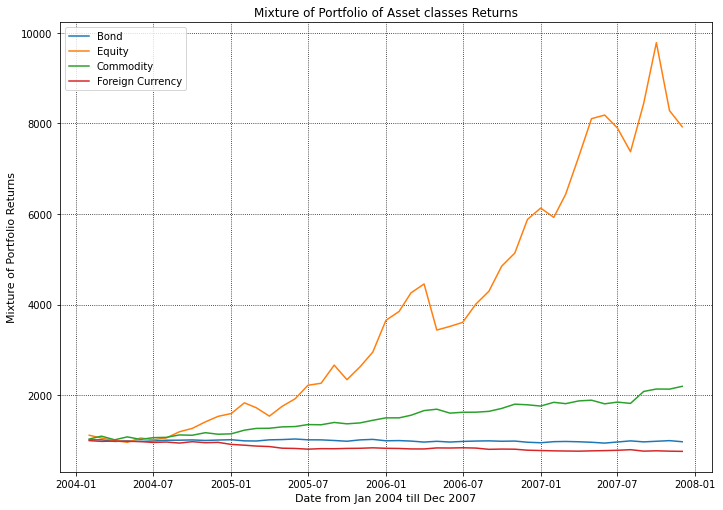

In [261]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(mix_port_2004_2007.index, mix_port_2004_2007.Bond_Port_Value, label='Bond')
plt.plot(mix_port_2004_2007.index, mix_port_2004_2007.Equity_Port_Value, label='Equity')
plt.plot(mix_port_2004_2007.index, mix_port_2004_2007.Commodity_Port_Value, label='Commodity')                               
plt.plot(mix_port_2004_2007.index, mix_port_2004_2007.Currency_Port_Value, label='Foreign Currency')
                               
plt.title('Mixture of Portfolio of Asset classes Returns')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=11)
plt.ylabel('Mixture of Portfolio Returns', fontsize=11)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

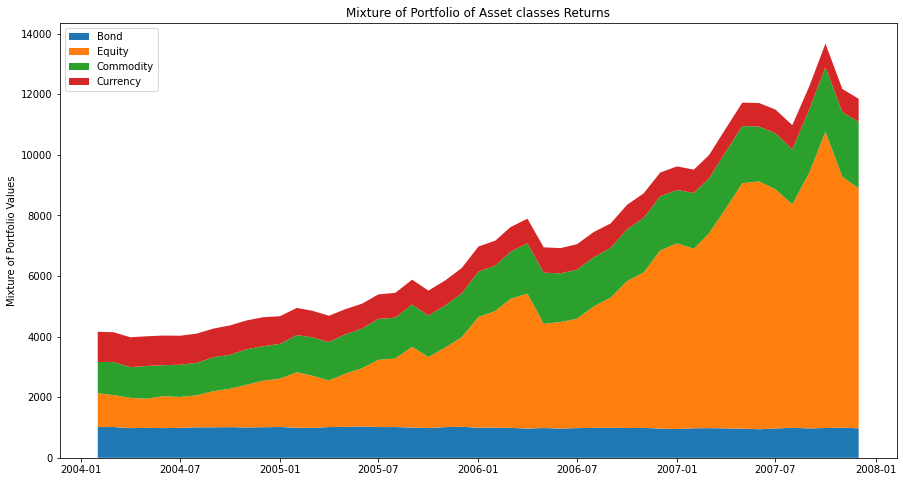

In [262]:
rcParams['figure.figsize'] = 15,8

x = mix_port_2004_2007.index
y1 = mix_port_2004_2007.Bond_Port_Value
y2 = mix_port_2004_2007.Equity_Port_Value
y3 = mix_port_2004_2007.Commodity_Port_Value
y4 = mix_port_2004_2007.Currency_Port_Value

y = np.vstack([y1, y2, y3, y4])
labels = ["Bond", "Equity", "Commodity","Currency"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, y4, labels=labels)
ax.set_title('Mixture of Portfolio of Asset classes Returns')
ax.set_ylabel("Mixture of Portfolio Values")
ax.legend(loc='upper left')
plt.show();

In [263]:
# Use pandas.DataFrame.describe() method to generate descriptive statistics,such as count, arithmetic mean, standard deviation
# minimum value, maximum value, and percentile
mix_port_2004_2007.describe()

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
count        47.000000          47.000000             47.000000   
mean        990.672326        3845.028830           1502.942207   
std          20.464940        2606.086763            338.112973   
min         942.581243         960.373490           1015.147901   
25%         979.036720        1565.854278           1199.804015   
50%         989.241898        3436.639620           1499.247033   
75%        1008.286336        5900.909636           1794.459847   
max        1033.118727        9777.202364           2195.220737   

       Currency_Port_Value  
count            47.000000  
mean            849.489344  
std              75.415282  
min             760.169608  
25%             791.448842  
50%             825.083094  
75%             905.136293  
max             997.155003

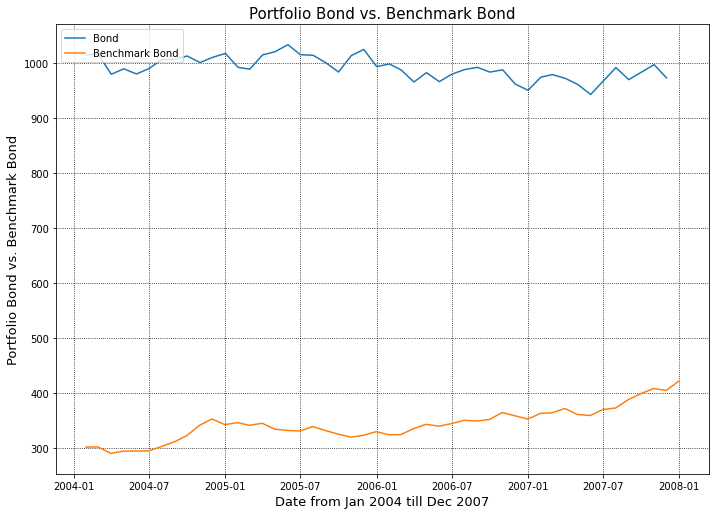

In [264]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(mix_port_2004_2007.index, mix_port_2004_2007.Bond_Port_Value, label='Bond')
plt.plot(benchmark.index, benchmark.benchmark_bond, label='Benchmark Bond')
                               
plt.title('Portfolio Bond vs. Benchmark Bond', fontsize=15)
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Portfolio Bond vs. Benchmark Bond', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

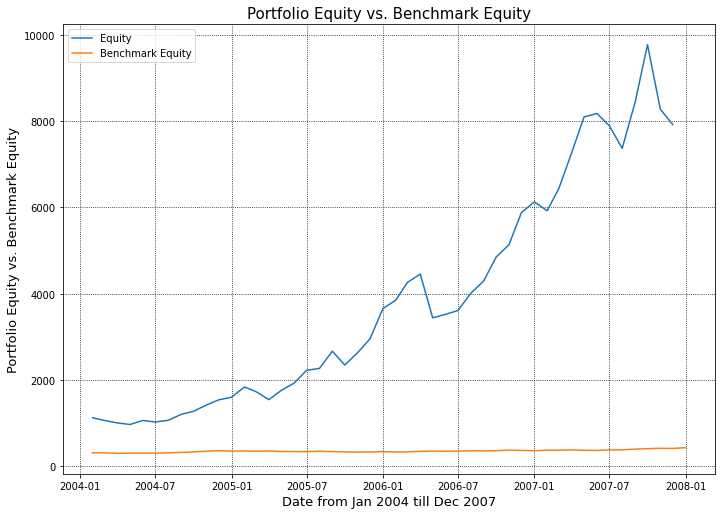

In [265]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(mix_port_2004_2007.index, mix_port_2004_2007.Equity_Port_Value, label='Equity')
plt.plot(benchmark.index, benchmark.benchmark_bond, label='Benchmark Equity')
                               
plt.title('Portfolio Equity vs. Benchmark Equity', fontsize=15)
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Portfolio Equity vs. Benchmark Equity', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

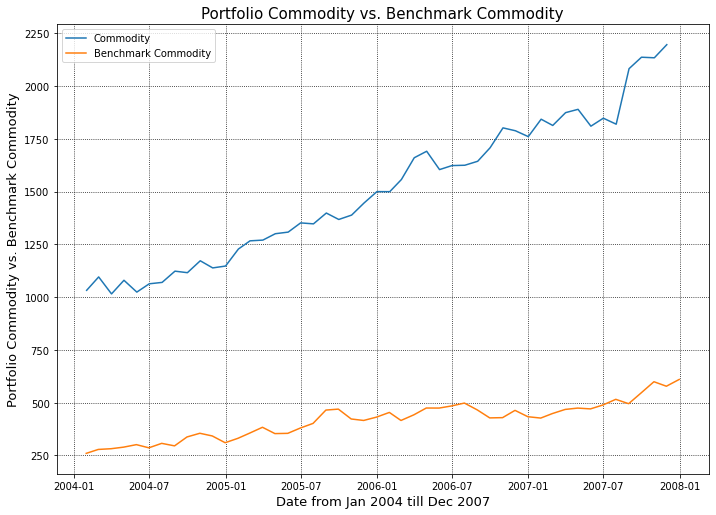

In [266]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(mix_port_2004_2007.index, mix_port_2004_2007.Commodity_Port_Value, label='Commodity')                               
plt.plot(benchmark.index, benchmark.benchmark_commodity, label='Benchmark Commodity')
                               
plt.title('Portfolio Commodity vs. Benchmark Commodity', fontsize=15)
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Portfolio Commodity vs. Benchmark Commodity', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

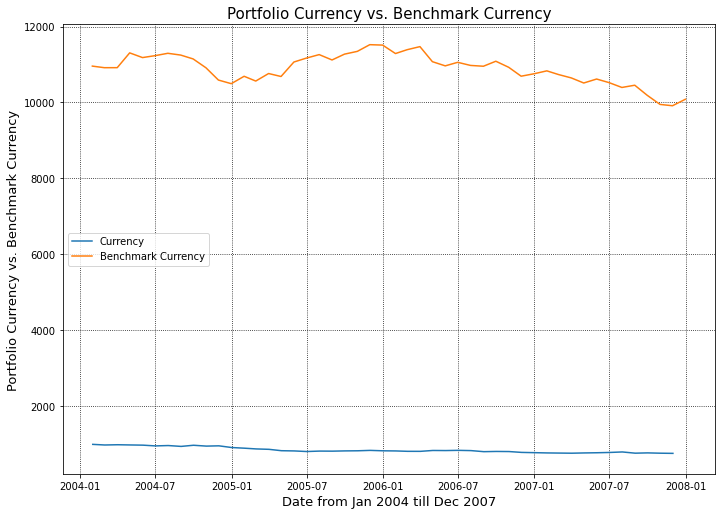

In [267]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(mix_port_2004_2007.index, mix_port_2004_2007.Currency_Port_Value, label='Currency')
plt.plot(benchmark.index, benchmark.benchmark_currency, label='Benchmark Currency')
                               
plt.title('Portfolio Currency vs. Benchmark Currency', fontsize=15)
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Portfolio Currency vs. Benchmark Currency', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=6);

<h4><center> Active Strategies</center></h4>

**With Risk Parity Strategy on the Asset Classes and Portfolio (RP):**

In [268]:
1/4

0.25

In [269]:
# Use pandas.DataFrame.copy() function to make a copy of mix_port_2004_2007 dataframe
Risk_Parity_Strategy_2004_2007 = mix_port_2004_2007.copy()

In [270]:
Risk_Parity_Strategy_2004_2007['Bond_Port_Value_25%'] = Risk_Parity_Strategy_2004_2007['Bond_Port_Value'] * .25
Risk_Parity_Strategy_2004_2007['Equity_Port_Value_25%'] = Risk_Parity_Strategy_2004_2007['Equity_Port_Value'] * .25
Risk_Parity_Strategy_2004_2007['Commodity_Port_Value_25%'] = Risk_Parity_Strategy_2004_2007['Commodity_Port_Value'] * .25
Risk_Parity_Strategy_2004_2007['Currency_Port_Value_25%'] = Risk_Parity_Strategy_2004_2007['Currency_Port_Value'] * .25

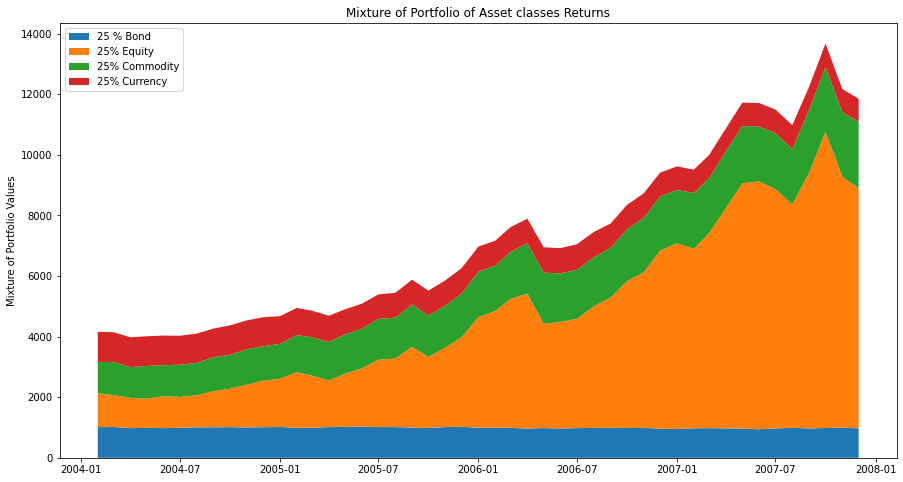

In [271]:
rcParams['figure.figsize'] = 15,8

x = Risk_Parity_Strategy_2004_2007.index
y1 = Risk_Parity_Strategy_2004_2007.Bond_Port_Value
y2 = Risk_Parity_Strategy_2004_2007.Equity_Port_Value
y3 = Risk_Parity_Strategy_2004_2007.Commodity_Port_Value
y4 = Risk_Parity_Strategy_2004_2007.Currency_Port_Value

y = np.vstack([y1, y2, y3, y4])
labels = ["25 % Bond", "25% Equity", "25% Commodity","25% Currency"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, y4, labels=labels)
ax.set_title('Mixture of Portfolio of Asset classes Returns')
ax.set_ylabel("Mixture of Portfolio Values")
ax.legend(loc='upper left')
plt.show();

In [272]:
Risk_Parity_Strategy_2004_2007.head()

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2004-02-01      1014.744390        1115.944771           1032.099606   
2004-03-01      1015.488346        1052.866550           1095.524950   
2004-04-01       979.317243         996.689433           1015.147901   
2004-05-01       989.241898         960.373490           1079.675877   
2004-06-01       979.833369        1054.405811           1023.679299   

            Currency_Port_Value  Bond_Port_Value_25%  Equity_Port_Value_25%  \
Date                                                                          
2004-02-01           997.155003           253.686097             278.986193   
2004-03-01           980.645191           253.872087             263.216638   
2004-04-01           987.312426           244.829311             249.172358   
2004-05-01           981.705014           247.310474             240.093373   
2004-06-01           976.399619           244.958342             263.601453   

            Commodity_Port_Value_25%  Currency_Port_Value_25%  
Date                                                           
2004-02-01                258.024902               249.288751  
2004-03-01                273.881237               245.161298  
2004-04-01                253.786975               246.828106  
2004-05-01                269.918969               245.426253  
2004-06-01                255.919825               244.099905

In [273]:
Risk_Parity_Strategy_2004_2007.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47 entries, 2004-02-01 to 2007-12-01
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Bond_Port_Value           47 non-null     float64
 1   Equity_Port_Value         47 non-null     float64
 2   Commodity_Port_Value      47 non-null     float64
 3   Currency_Port_Value       47 non-null     float64
 4   Bond_Port_Value_25%       47 non-null     float64
 5   Equity_Port_Value_25%     47 non-null     float64
 6   Commodity_Port_Value_25%  47 non-null     float64
 7   Currency_Port_Value_25%   47 non-null     float64
dtypes: float64(8)
memory usage: 4.6 KB


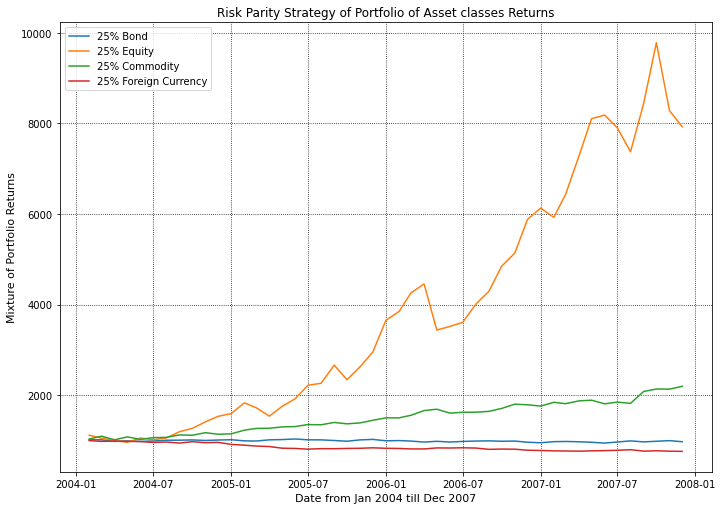

In [274]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(Risk_Parity_Strategy_2004_2007.index, Risk_Parity_Strategy_2004_2007.Bond_Port_Value, label='25% Bond')
plt.plot(Risk_Parity_Strategy_2004_2007.index, Risk_Parity_Strategy_2004_2007.Equity_Port_Value, label='25% Equity')
plt.plot(Risk_Parity_Strategy_2004_2007.index, Risk_Parity_Strategy_2004_2007.Commodity_Port_Value, label='25% Commodity')                               
plt.plot(Risk_Parity_Strategy_2004_2007.index, Risk_Parity_Strategy_2004_2007.Currency_Port_Value, label='25% Foreign Currency')
                               
plt.title('Risk Parity Strategy of Portfolio of Asset classes Returns')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=11)
plt.ylabel('Mixture of Portfolio Returns', fontsize=11)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

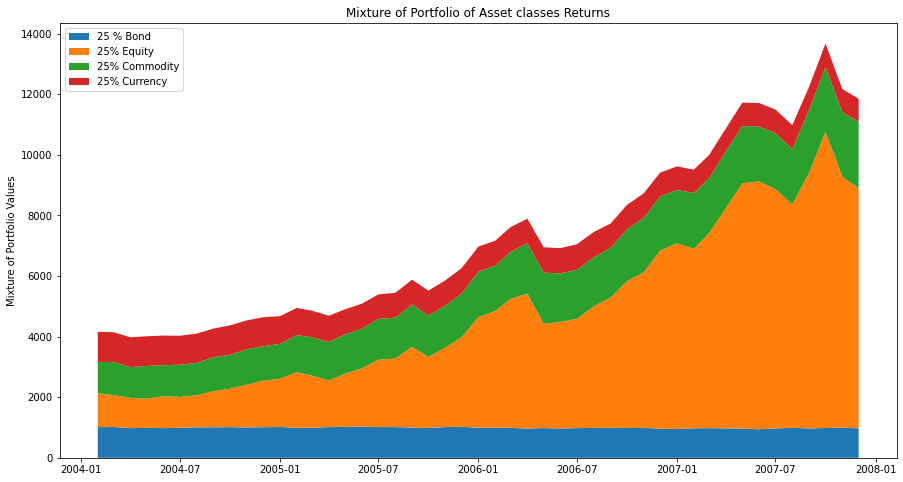

In [275]:
rcParams['figure.figsize'] = 15,8

x = Risk_Parity_Strategy_2004_2007.index
y1 = Risk_Parity_Strategy_2004_2007.Bond_Port_Value
y2 = Risk_Parity_Strategy_2004_2007.Equity_Port_Value
y3 = Risk_Parity_Strategy_2004_2007.Commodity_Port_Value
y4 = Risk_Parity_Strategy_2004_2007.Currency_Port_Value

y = np.vstack([y1, y2, y3, y4])
labels = ["25 % Bond", "25% Equity", "25% Commodity","25% Currency"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, y4, labels=labels)
ax.set_title('Mixture of Portfolio of Asset classes Returns')
ax.set_ylabel("Mixture of Portfolio Values")
ax.legend(loc='upper left')
plt.show();

In [276]:
# Use pandas.DataFrame.describe() method to generate descriptive statistics,such as count, arithmetic mean, standard deviation
# minimum value, maximum value, and percentile
Risk_Parity_Strategy_2004_2007[['Bond_Port_Value','Equity_Port_Value','Commodity_Port_Value','Currency_Port_Value']].describe()

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
count        47.000000          47.000000             47.000000   
mean        990.672326        3845.028830           1502.942207   
std          20.464940        2606.086763            338.112973   
min         942.581243         960.373490           1015.147901   
25%         979.036720        1565.854278           1199.804015   
50%         989.241898        3436.639620           1499.247033   
75%        1008.286336        5900.909636           1794.459847   
max        1033.118727        9777.202364           2195.220737   

       Currency_Port_Value  
count            47.000000  
mean            849.489344  
std              75.415282  
min             760.169608  
25%             791.448842  
50%             825.083094  
75%             905.136293  
max             997.155003

In [277]:
# Calculate the Returns of each asset class on a Portfolio of Benchmark
# Use pandas.DataFrame.shift() function to Shift index by desired number of periods with an optional time freq.
returns_RP_curr = (Risk_Parity_Strategy_2004_2007['Currency_Port_Value'] / Risk_Parity_Strategy_2004_2007['Currency_Port_Value'].shift(1)) - 1
returns_RP_equi = (Risk_Parity_Strategy_2004_2007['Equity_Port_Value'] / Risk_Parity_Strategy_2004_2007['Equity_Port_Value'].shift(1)) - 1
returns_RP_comm = (Risk_Parity_Strategy_2004_2007['Commodity_Port_Value'] / Risk_Parity_Strategy_2004_2007['Commodity_Port_Value'].shift(1)) - 1
returns_RP_bond = (Risk_Parity_Strategy_2004_2007['Bond_Port_Value'] / Risk_Parity_Strategy_2004_2007['Bond_Port_Value'].shift(1)) - 1

In [278]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
returns_RP_curr.dropna(axis=0, inplace=True)
returns_RP_equi.dropna(axis=0, inplace=True)
returns_RP_comm.dropna(axis=0, inplace=True)
returns_RP_bond.dropna(axis=0, inplace=True)

**Arithmetic Mean**

In [582]:
np.mean(returns_RP_curr), np.mean(returns_RP_equi), np.mean(returns_RP_comm), np.mean(returns_RP_bond)

(-0.005738067172735429,
 0.048153326610060214,
 0.01723329518095404,
 -0.0007799341703193302)

**Standard Deviation**

In [583]:
np.std(returns_RP_curr), np.std(returns_RP_equi), np.std(returns_RP_comm), np.std(returns_RP_bond)

(0.016878942898773064,
 0.09597367576603508,
 0.03761606627233628,
 0.016659339630989124)

**Skewness**

In [279]:
skew(Risk_Parity_Strategy_2004_2007['Bond_Port_Value'].dropna())

-0.10146274214060547

In [280]:
skew(Risk_Parity_Strategy_2004_2007['Equity_Port_Value'].dropna())

0.6552489667035201

In [281]:
skew(Risk_Parity_Strategy_2004_2007['Commodity_Port_Value'].dropna())

0.25130311741587474

In [282]:
skew(Risk_Parity_Strategy_2004_2007['Currency_Port_Value'].dropna())

0.7338880165208994

**Kurtosis**

In [283]:
kurtosis(Risk_Parity_Strategy_2004_2007['Bond_Port_Value'].dropna())

-0.5288271043413926

In [284]:
kurtosis(Risk_Parity_Strategy_2004_2007['Equity_Port_Value'].dropna())

-0.8629483979416204

In [285]:
kurtosis(Risk_Parity_Strategy_2004_2007['Commodity_Port_Value'].dropna())

-1.0006302941867644

In [286]:
kurtosis(Risk_Parity_Strategy_2004_2007['Currency_Port_Value'].dropna())

-0.8797151554049107

In [287]:
# Calculate Geometric Mean Rate of Return (GMRR)
def geometric_mean_return(iterable):
    a = np.array(abs(iterable))
    return a.prod()**(1.0/len(a))

In [288]:
geometric_mean_return(returns_RP_bond)

0.010727562447708788

In [289]:
geometric_mean_return(returns_RP_equi)

0.07560221593185208

In [290]:
geometric_mean_return(returns_RP_comm)

0.019177902155418446

In [291]:
geometric_mean_return(returns_RP_curr)

0.010281909422939443

**Volatility**

In [292]:
Bond_Volatility = np.std(returns_RP_bond) * np.sqrt(46)
Bond_Volatility

0.11298913867832458

In [293]:
Equity_Volatility = np.std(returns_RP_equi) * np.sqrt(46)
Equity_Volatility

0.6509251387387226

In [294]:
Commodity_Volatility = np.std(returns_RP_comm) * np.sqrt(46)
Commodity_Volatility

0.2551245741260935

In [295]:
Currency_Volatility = np.std(returns_RP_curr) * np.sqrt(46)
Currency_Volatility

0.11447856050580787

In [296]:
# Calcualte the Annualized Sharpe Ratio
def Sharpe_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

In [297]:
Sharpe_Ratio(returns_RP_bond, 46, 0.0164) # Annualized Sharpe Ratio of Risk Parity Bond

-0.45761585811612515

In [298]:
Sharpe_Ratio(returns_RP_equi, 46, 0.0164) # Annualized Sharpe Ratio of Risk Parity Equity

3.340819363610816

In [299]:
Sharpe_Ratio(returns_RP_comm, 46, 0.0164) # Annualized Sharpe Ratio of Risk Parity Commodity

3.0096937077549053

In [300]:
Sharpe_Ratio(returns_RP_curr, 46, 0.0164) # Annualized Sharpe Ratio of Risk Parity Currency

-2.42217451357795

In [301]:
# Calcualte the Annualized Sortino Ratio
def Sortino_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

In [302]:
Sortino_Ratio(returns_RP_bond, 46, 0.0164) # Annualized Sortino Ratio of Risk Parity Bond

-0.8686883668639875

In [303]:
Sortino_Ratio(returns_RP_equi, 46, 0.0164) # Annualized Sortino Ratio of Risk Parity Equity

5.531477891138334

In [304]:
Sortino_Ratio(returns_RP_comm, 46, 0.0164) # Annualized Sortino Ratio of Risk Parity Commodity

5.071617117146486

In [305]:
Sortino_Ratio(returns_RP_curr, 46, 0.0164) # Annualized Sortino Ratio of Risk Parity Currency

-3.2982811400908885

**Cumulative Return**

In [306]:
# Calculate the cumulative return of bond 
cululative_return = 100 * (Risk_Parity_Strategy_2004_2007['Bond_Port_Value'][-1] /Risk_Parity_Strategy_2004_2007['Bond_Port_Value'][0]-1)
print("The Cumulative Return of the Bond is {:.2f}%".format(cululative_return))

The Cumulative Return of the Bond is -4.14%


In [307]:
# Calculate the cumulative return of equity
cululative_return = 100 * (Risk_Parity_Strategy_2004_2007['Equity_Port_Value'][-1] /Risk_Parity_Strategy_2004_2007['Equity_Port_Value'][0]-1)
print("The Cumulative Return of the equity is {:.2f}%".format(cululative_return))

The Cumulative Return of the equity is 609.78%


In [308]:
# Calculate the cumulative return of commodity 
cululative_return = 100 * (Risk_Parity_Strategy_2004_2007['Commodity_Port_Value'][-1] /Risk_Parity_Strategy_2004_2007['Commodity_Port_Value'][0]-1)
print("The Cumulative Return of the commodity is {:.2f}%".format(cululative_return))

The Cumulative Return of the commodity is 112.69%


In [309]:
# Calculate the cumulative return of currency 
cululative_return = 100 * (Risk_Parity_Strategy_2004_2007['Currency_Port_Value'][-1] /Risk_Parity_Strategy_2004_2007['Currency_Port_Value'][0]-1)
print("The Cumulative Return of the currency is {:.2f}%".format(cululative_return))

The Cumulative Return of the currency is -23.77%


**Conclusion on Risk parity Strategy**

**Skewness**

- RP Bond -0.10146274214060547
- RP Equity 0.6552489667035201
- RP Commodity 0.25130311741587474
- RP Currency 0.7338880165208994

**Kurtosis**

- RP Bond -0.5288271043413926
- RP Equity -0.8629483979416204
- RP Commodity -1.0006302941867644
- RP Currency -0.8797151554049107

**Geometric Mean Rate of Returns**

- RP Bond 0.010727562447708788
- RP Equity 0.07560221593185208
- RP Commodity 0.019177902155418446
- RP Currency 0.010281909422939443

**Volatility**

- RP Bond 0.11298913867832458
- RP Equity 0.6509251387387226
- RP Commodity 0.2551245741260935
- RP Currency 0.11447856050580787

**Annualized Sharpe Ratio**

- RP Bond -0.45761585811612515
- RP Equity 3.340819363610816
- RP Commodity 3.0096937077549053
- RP Currency -2.42217451357795

**Annualized Sortino Ratio**

- RP Bond -0.8686883668639875 
- RP Equity 5.531477891138334
- RP Commodity 5.071617117146486 
- RP Currency -3.2982811400908885

**Cumulative Return**

- RP Bond -4.14% 
- RP Equity 609.78%
- RP Commodity 112.69% 
- RP Currency -23.77%

In [584]:
# A Table of A Conclusion on Risk Parity Strategy

RP = {'Particular':['Arithmetic Mean','Standard Deviation','Skewness','Kurtosis','Geometric Mean',
                      'Volatility','Sharpe Ratio', 'Sortino Ratio','Cumulative Return'],
        'Bond':[-0.005738067172735429, 0.016878942898773064, -0.10146274214060547, -0.5288271043413926, 0.010727562447708788,
                 0.11298913867832458, -0.45761585811612515, -0.8686883668639875, -0.0414],
        'Equity':[0.048153326610060214, 0.09597367576603508, 0.6552489667035201,-0.8629483979416204, 0.07560221593185208,
                  0.6509251387387226, 3.340819363610816,5.531477891138334, 6.0978],
        'Commodity':[0.01723329518095404, 0.03761606627233628, 0.25130311741587474,-1.0006302941867644, 0.019177902155418446,
                     0.2551245741260935, 3.0096937077549053, 5.071617117146486, 1.1269],
        'Currency':[-0.0007799341703193302, 0.016659339630989124, 0.7338880165208994,-0.8797151554049107, 0.010281909422939443,
                    0.11447856050580787, -2.42217451357795, -3.2982811400908885, -0.2377]}


df_RP = pd.DataFrame(data=MA)
df_RP

Particular      Bond     Equity  Commodity  Currency
0     Arithmetic Mean -0.000708   0.054807   0.016270 -0.006162
1  Standard Deviation  0.002565   0.018721   0.004438  0.005378
2            Skewness -0.135827   0.590666   0.010166  0.936485
3            Kurtosis -1.515572  -0.837728  -1.260798 -0.158463
4      Geometric Mean  0.001205   0.051731   0.015450  0.004914
5          Volatility  0.015603   0.113878   0.026998  0.032715
6        Sharpe Ratio -2.693641  17.422981  21.395466 -7.368316
7       Sortino Ratio -3.826301   0.000000   0.000000 -8.261406
8   Cumulative Return -0.025500   5.901000   0.798600 -0.201700

In [585]:
df_RP['Portfolio'] = df_RP[['Bond','Equity','Commodity','Currency']].sum(axis=1)
df_RP

Particular      Bond     Equity  Commodity  Currency  Portfolio
0     Arithmetic Mean -0.000708   0.054807   0.016270 -0.006162   0.064207
1  Standard Deviation  0.002565   0.018721   0.004438  0.005378   0.031103
2            Skewness -0.135827   0.590666   0.010166  0.936485   1.401490
3            Kurtosis -1.515572  -0.837728  -1.260798 -0.158463  -3.772561
4      Geometric Mean  0.001205   0.051731   0.015450  0.004914   0.073300
5          Volatility  0.015603   0.113878   0.026998  0.032715   0.189193
6        Sharpe Ratio -2.693641  17.422981  21.395466 -7.368316  28.756490
7       Sortino Ratio -3.826301   0.000000   0.000000 -8.261406 -12.087707
8   Cumulative Return -0.025500   5.901000   0.798600 -0.201700   6.472400

**With 60/40 Portfolio:**

- The 60/40 Portfolio composed of 60% Equities, and 40% Bonds

In [310]:
# Use pandas.DataFrame.copy() function to make a copy of mix_port_2004_2007 dataframe
RP_60_40_Portfolio_2004_2007 = mix_port_2004_2007[['Bond_Port_Value','Equity_Port_Value']].copy()

In [311]:
RP_60_40_Portfolio_2004_2007['Bond_Port_Value_40%'] = RP_60_40_Portfolio_2004_2007['Bond_Port_Value'] * .40
RP_60_40_Portfolio_2004_2007['Equity_Port_Value_60%'] = RP_60_40_Portfolio_2004_2007['Equity_Port_Value'] * .60

In [312]:
RP_60_40_Portfolio_2004_2007

Bond_Port_Value  Equity_Port_Value  Bond_Port_Value_40%  \
Date                                                                  
2004-02-01      1014.744390        1115.944771           405.897756   
2004-03-01      1015.488346        1052.866550           406.195339   
2004-04-01       979.317243         996.689433           391.726897   
2004-05-01       989.241898         960.373490           395.696759   
2004-06-01       979.833369        1054.405811           391.933348   
2004-07-01       989.800769        1018.122228           395.920308   
2004-08-01      1005.796985        1056.743930           402.318794   
2004-09-01      1006.601576        1193.341342           402.640630   
2004-10-01      1012.519757        1266.645021           405.007903   
2004-11-01      1000.639817        1410.604199           400.255927   
2004-12-01      1009.971096        1532.807732           403.988438   
2005-01-01      1017.256759        1594.397078           406.902703   
2005-02-01       991.868740        1830.871390           396.747496   
2005-03-01       988.566230        1723.041100           395.426492   
2005-04-01      1014.495234        1537.311478           405.798094   
2005-05-01      1020.312882        1752.773079           408.125153   
2005-06-01      1033.118727        1921.947741           413.247491   
2005-07-01      1014.943552        2218.502192           405.977421   
2005-08-01      1013.801090        2262.798872           405.520436   
2005-09-01       999.939412        2662.861543           399.975765   
2005-10-01       983.459048        2341.680627           393.383619   
2005-11-01      1013.456732        2626.635380           405.382693   
2005-12-01      1024.480841        2950.756909           409.792336   
2006-01-01       993.308540        3651.781984           397.323416   
2006-02-01       997.981578        3846.727486           399.192631   
2006-03-01       987.165604        4256.523551           394.866241   
2006-04-01       965.247648        4453.313088           386.099059   
2006-05-01       982.290532        3436.639620           392.916213   
2006-06-01       965.884243        3517.077920           386.353697   
2006-07-01       979.444008        3606.092859           391.777603   
2006-08-01       987.827957        4007.930022           395.131183   
2006-09-01       991.945965        4293.292206           396.778386   
2006-10-01       983.308791        4844.900796           393.323516   
2006-11-01       987.384787        5134.660978           394.953915   
2006-12-01       961.578556        5878.801066           384.631422   
2007-01-01       950.255771        6127.681862           380.102309   
2007-02-01       974.129478        5923.018206           389.651791   
2007-03-01       978.756197        6432.906741           391.502479   
2007-04-01       971.868418        7265.062084           388.747367   
2007-05-01       960.759631        8100.315771           384.303852   
2007-06-01       942.581243        8179.955006           377.032497   
2007-07-01       966.692441        7895.884510           386.676976   
2007-08-01       991.481078        7371.051395           396.592431   
2007-09-01       969.492921        8434.262287           387.797169   
2007-10-01       982.994061        9777.202364           393.197625   
2007-11-01       996.843452        8278.386748           398.737381   
2007-12-01       972.721944        7920.764551           389.088778   

            Equity_Port_Value_60%  
Date                               
2004-02-01             669.566863  
2004-03-01             631.719930  
2004-04-01             598.013660  
2004-05-01             576.224094  
2004-06-01             632.643487  
2004-07-01             610.873337  
2004-08-01             634.046358  
2004-09-01             716.004805  
2004-10-01             759.987013  
2004-11-01             846.362519  
2004-12-01             919.684639  
2005-01-01             956.638247  
2005-02-01            1098.5

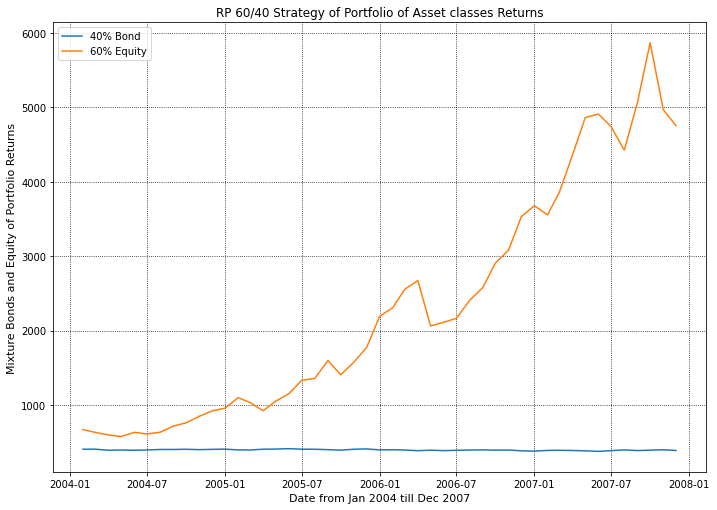

In [313]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(RP_60_40_Portfolio_2004_2007.index, RP_60_40_Portfolio_2004_2007['Bond_Port_Value_40%'], label='40% Bond')
plt.plot(RP_60_40_Portfolio_2004_2007.index, RP_60_40_Portfolio_2004_2007['Equity_Port_Value_60%'], label='60% Equity')
                               
plt.title('RP 60/40 Strategy of Portfolio of Asset classes Returns')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=11)
plt.ylabel('Mixture Bonds and Equity of Portfolio Returns', fontsize=11)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

In [314]:
# Use pandas.DataFrame.describe() method to generate descriptive statistics,such as count, arithmetic mean, standard deviation
# minimum value, maximum value, and percentile
RP_60_40_Portfolio_2004_2007[['Bond_Port_Value_40%','Equity_Port_Value_60%']].describe()

Bond_Port_Value_40%  Equity_Port_Value_60%
count            47.000000              47.000000
mean            396.268931            2307.017298
std               8.185976            1563.652058
min             377.032497             576.224094
25%             391.614688             939.512567
50%             395.696759            2061.983772
75%             403.314534            3540.545781
max             413.247491            5866.321419

In [315]:
# Calculate the Returns of each asset class on a Portfolio of Benchmark
# Use pandas.DataFrame.shift() function to Shift index by desired number of periods with an optional time freq.
returns_60_40_bond = (RP_60_40_Portfolio_2004_2007['Bond_Port_Value_40%'] / RP_60_40_Portfolio_2004_2007['Bond_Port_Value_40%'].shift(1)) - 1
returns_60_40_equi = (RP_60_40_Portfolio_2004_2007['Equity_Port_Value_60%'] / RP_60_40_Portfolio_2004_2007['Equity_Port_Value_60%'].shift(1)) - 1


In [316]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
returns_60_40_bond.dropna(axis=0, inplace=True)
returns_60_40_equi.dropna(axis=0, inplace=True)

**Arithmetic Mean**

In [317]:
Bond_mean = np.mean(returns_60_40_bond)
Bond_mean

-0.0007799341703193373

In [318]:
Equity_mean = np.mean(returns_60_40_equi)
Equity_mean

0.048153326610060214

**Standard Deviation**

In [319]:
Bond_sigma = np.std(returns_60_40_bond)
Bond_sigma

0.016659339630989114

In [320]:
Equity_sigma = np.std(returns_60_40_equi)
Equity_sigma

0.09597367576603506

**Skewness**

In [321]:
skew(RP_60_40_Portfolio_2004_2007['Bond_Port_Value_40%'].dropna())

-0.10146274214063754

In [322]:
skew(RP_60_40_Portfolio_2004_2007['Equity_Port_Value_60%'].dropna())

0.6552489667035196

**Kurtosis**

In [323]:
kurtosis(RP_60_40_Portfolio_2004_2007['Bond_Port_Value_40%'].dropna())

-0.5288271043413921

In [324]:
kurtosis(RP_60_40_Portfolio_2004_2007['Equity_Port_Value_60%'].dropna())

-0.8629483979416208

In [325]:
# Calculate Geometric Mean Rate of Return (GMRR)
def geometric_mean_return(iterable):
    a = np.array(abs(iterable))
    return a.prod()**(1.0/len(a))

In [326]:
geometric_mean_return(returns_60_40_bond)

0.01072756244770881

In [327]:
geometric_mean_return(returns_60_40_equi)

0.07560221593185201

**Volatility**

In [328]:
Bond_Volatility = np.std(returns_60_40_bond) * np.sqrt(46)
Bond_Volatility

0.11298913867832451

In [329]:
Equity_Volatility = np.std(returns_60_40_equi) * np.sqrt(46)
Equity_Volatility

0.6509251387387226

In [330]:
# Calcualte the Annualized Sharpe Ratio
def Sharpe_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

In [331]:
Sharpe_Ratio(returns_60_40_bond, 46, 0.0164) # Annualized Sharpe Ratio of 60_40 Bond

-0.45761585811612837

In [332]:
Sharpe_Ratio(returns_60_40_equi, 46, 0.0164) # Annualized Sharpe Ratio of 60_40 Equity

3.340819363610817

In [333]:
# Calcualte the Annualized Sortino Ratio
def Sortino_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

In [334]:
Sortino_Ratio(returns_60_40_bond, 46, 0.0164) # Annualized Sortino Ratio of 60_40 Bond

-0.8686883668639939

In [335]:
Sortino_Ratio(returns_60_40_equi, 46, 0.0164) # Annualized Sortino Ratio of 60_40 Equity

5.531477891138333

**Cumulative Return**

In [336]:
# Calculate the cumulative return of bond 
cululative_return = 100 * (RP_60_40_Portfolio_2004_2007['Bond_Port_Value_40%'][-1] /RP_60_40_Portfolio_2004_2007['Bond_Port_Value_40%'][0]-1)
print("The Cumulative Return of the Bond is {:.2f}%".format(cululative_return))

The Cumulative Return of the Bond is -4.14%


In [337]:
# Calculate the cumulative return of equity
cululative_return = 100 * (RP_60_40_Portfolio_2004_2007['Equity_Port_Value_60%'][-1] /RP_60_40_Portfolio_2004_2007['Equity_Port_Value_60%'][0]-1)
print("The Cumulative Return of the equity is {:.2f}%".format(cululative_return))

The Cumulative Return of the equity is 609.78%


**Conclusion on 60_40 Portfolio**

**Arithmetic Mean**

- 60_40 Bond -0.0007799341703193373
- 60_40 Equity 0.048153326610060214

**Standard Deviation**

- 60_40 Bond 0.016659339630989114
- 60_40 Equity 0.09597367576603506

**Skewness**

- 60_40 Bond 0.10146274214063754
- 60_40 Equity 0.6552489667035196

**Kurtosis**

- 60_40 Bond -0.5288271043413921
- 60_40 Equity -0.8629483979416208 

**Geometric Mean Rate of Returns**

- 60_40 Bond 0.01072756244770881
- 60_40 Equity 0.07560221593185201

**Volatility**

- 60_40 Bond 0.11298913867832451
- 60_40 Equity 0.6509251387387226

**Annualized Sharpe Ratio**

- 60_40 Bond -0.45761585811612837
- 60_40 Equity 3.340819363610817

**Annualized Sortino Ratio**

- 60_40 Bond -0.8686883668639939
- 60_40 Equity 5.531477891138333

**Cumulative Return**

- 60_40 Bond -4.14%
- 60_40 Equity 609.78%

In [338]:
# A Table of A Conclusion on 60 /40 Portfolio Strategy

p_60_40 = {'Particular':['Arithmetic Mean','Standard Deviation','Skewness','Kurtosis','Geometric Mean',
                      'Volatility','Sharpe Ratio', 'Sortino Ratio','Cumulative Return'],
        'Bond':[-0.0007799341703193373,0.016659339630989114,-0.10146274214063754,-0.5288271043413921,0.01072756244770881,
                0.11298913867832451,-0.45761585811612837,-0.8686883668639939, -0.0414],
        'Equity':[0.048153326610060214,0.09597367576603506,0.6552489667035196,-0.8629483979416208,0.07560221593185201,
                  0.6509251387387226 ,3.340819363610817,5.531477891138333, 6.0978]}


df_p_60_40 = pd.DataFrame(data=p_60_40)
df_p_60_40

Particular      Bond    Equity
0     Arithmetic Mean -0.000780  0.048153
1  Standard Deviation  0.016659  0.095974
2            Skewness -0.101463  0.655249
3            Kurtosis -0.528827 -0.862948
4      Geometric Mean  0.010728  0.075602
5          Volatility  0.112989  0.650925
6        Sharpe Ratio -0.457616  3.340819
7       Sortino Ratio -0.868688  5.531478
8   Cumulative Return -0.041400  6.097800

In [339]:
df_p_60_40['Portfolio'] = df_p_60_40[['Bond','Equity']].sum(axis=1)
df_p_60_40

Particular      Bond    Equity  Portfolio
0     Arithmetic Mean -0.000780  0.048153   0.047373
1  Standard Deviation  0.016659  0.095974   0.112633
2            Skewness -0.101463  0.655249   0.553786
3            Kurtosis -0.528827 -0.862948  -1.391776
4      Geometric Mean  0.010728  0.075602   0.086330
5          Volatility  0.112989  0.650925   0.763914
6        Sharpe Ratio -0.457616  3.340819   2.883204
7       Sortino Ratio -0.868688  5.531478   4.662790
8   Cumulative Return -0.041400  6.097800   6.056400

**With Ten months Moving Average on the Asset Classes and Portfolio:**

In [340]:
# Use pandas.DataFrame.copy() function to make a copy of mix_port_2004_2007 dataframe
Moving_Average_Portfolio_2004_2007 = mix_port_2004_2007.copy()

In [341]:
# Calculating Moving Average with 10 numbers of observations on Mixture Portfolio 
# Use pandas.DataFrame.rolling(window=10) function to provide rolling window 10 of calculations
# Use Python mean() method to calculate the arithmetic mean (average) of data

Moving_Average_Portfolio_2004_2007['Bond_Port_Value_Avg'] = Moving_Average_Portfolio_2004_2007['Bond_Port_Value'].rolling(window=10).mean()
Moving_Average_Portfolio_2004_2007['Equity_Port_Value_Avg'] = Moving_Average_Portfolio_2004_2007['Equity_Port_Value'].rolling(window=10).mean()
Moving_Average_Portfolio_2004_2007['Commodity_Port_Value_Avg'] = Moving_Average_Portfolio_2004_2007['Commodity_Port_Value'].rolling(window=10).mean()
Moving_Average_Portfolio_2004_2007['Currency_Port_Value_Avg'] = Moving_Average_Portfolio_2004_2007['Currency_Port_Value'].rolling(window=10).mean()


In [342]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
Moving_Average_Portfolio_2004_2007.dropna(axis=0, inplace=True)
Moving_Average_Portfolio_2004_2007.head()

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2004-11-01      1000.639817        1410.604199           1171.996500   
2004-12-01      1009.971096        1532.807732           1138.209878   
2005-01-01      1017.256759        1594.397078           1147.067012   
2005-02-01       991.868740        1830.871390           1227.611529   
2005-03-01       988.566230        1723.041100           1266.423592   

            Currency_Port_Value  Bond_Port_Value_Avg  Equity_Port_Value_Avg  \
Date                                                                          
2004-11-01           951.286699           999.398415            1112.573678   
2004-12-01           958.682334           998.921086            1154.259974   
2005-01-01           914.057369           999.097927            1208.413026   
2005-02-01           896.215217          1000.353077            1291.831222   
2005-03-01           877.112468          1000.285510            1368.097983   

            Commodity_Port_Value_Avg  Currency_Port_Value_Avg  
Date                                                           
2004-11-01               1078.914201               971.423862  
2004-12-01               1089.525228               967.576595  
2005-01-01               1094.679434               960.917813  
2005-02-01               1115.925797               951.808092  
2005-03-01               1134.600569               941.348837

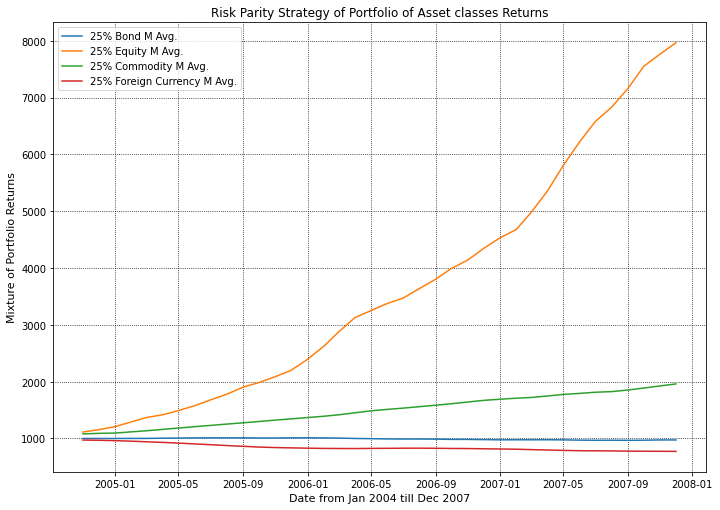

In [343]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(Moving_Average_Portfolio_2004_2007.index, Moving_Average_Portfolio_2004_2007.Bond_Port_Value_Avg, label='25% Bond M Avg.')
plt.plot(Moving_Average_Portfolio_2004_2007.index, Moving_Average_Portfolio_2004_2007.Equity_Port_Value_Avg, label='25% Equity M Avg.')
plt.plot(Moving_Average_Portfolio_2004_2007.index, Moving_Average_Portfolio_2004_2007.Commodity_Port_Value_Avg, label='25% Commodity M Avg.')                               
plt.plot(Moving_Average_Portfolio_2004_2007.index, Moving_Average_Portfolio_2004_2007.Currency_Port_Value_Avg, label='25% Foreign Currency M Avg.')
                               
plt.title('Risk Parity Strategy of Portfolio of Asset classes Returns')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=11)
plt.ylabel('Mixture of Portfolio Returns', fontsize=11)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

In [344]:
# Use pandas.DataFrame.describe() method to generate descriptive statistics,such as count, arithmetic mean, standard deviation
# minimum value, maximum value, and percentile
Moving_Average_Portfolio_2004_2007[['Bond_Port_Value_Avg','Equity_Port_Value_Avg',
                                    'Commodity_Port_Value_Avg','Currency_Port_Value_Avg']].describe()

Bond_Port_Value_Avg  Equity_Port_Value_Avg  Commodity_Port_Value_Avg  \
count            38.000000              38.000000                 38.000000   
mean            991.302009            3649.435925               1492.055965   
std              15.471785            2113.341017                270.279622   
min             966.759574            1112.573678               1078.914201   
25%             976.139934            1809.811920               1258.373340   
50%             993.717260            3311.685858               1498.061870   
75%            1006.643559            4901.729588               1717.460455   
max            1011.131606            7965.579146               1959.616742   

       Currency_Port_Value_Avg  
count                38.000000  
mean                843.302162  
std                  59.416921  
min                 772.425078  
25%                 805.114955  
50%                 825.293361  
75%                 871.372873  
max                 971.423862

In [345]:
Moving_Average_Portfolio_2004_2007['returns_MA_bond'] = Moving_Average_Portfolio_2004_2007['Bond_Port_Value_Avg'].pct_change()
Moving_Average_Portfolio_2004_2007['returns_MA_equi'] = Moving_Average_Portfolio_2004_2007['Equity_Port_Value_Avg'].pct_change()
Moving_Average_Portfolio_2004_2007['returns_MA_comm'] = Moving_Average_Portfolio_2004_2007['Commodity_Port_Value_Avg'].pct_change()
Moving_Average_Portfolio_2004_2007['returns_MA_curr'] = Moving_Average_Portfolio_2004_2007['Currency_Port_Value_Avg'].pct_change()

In [346]:
Moving_Average_Portfolio_2004_2007.dropna(axis=0, inplace=True)

In [347]:
Moving_Average_Portfolio_2004_2007.head(3)

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2004-12-01      1009.971096        1532.807732           1138.209878   
2005-01-01      1017.256759        1594.397078           1147.067012   
2005-02-01       991.868740        1830.871390           1227.611529   

            Currency_Port_Value  Bond_Port_Value_Avg  Equity_Port_Value_Avg  \
Date                                                                          
2004-12-01           958.682334           998.921086            1154.259974   
2005-01-01           914.057369           999.097927            1208.413026   
2005-02-01           896.215217          1000.353077            1291.831222   

            Commodity_Port_Value_Avg  Currency_Port_Value_Avg  \
Date                                                            
2004-12-01               1089.525228               967.576595   
2005-01-01               1094.679434               960.917813   
2005-02-01               1115.925797               951.808092   

            returns_MA_bond  returns_MA_equi  returns_MA_comm  returns_MA_curr  
Date                                                                            
2004-12-01        -0.000478         0.037468         0.009835        -0.003960  
2005-01-01         0.000177         0.046916         0.004731        -0.006882  
2005-02-01         0.001256         0.069031         0.019409        -0.009480

In [348]:
returns_MA_bond = Moving_Average_Portfolio_2004_2007['returns_MA_bond']
returns_MA_equi = Moving_Average_Portfolio_2004_2007['returns_MA_equi']
returns_MA_comm = Moving_Average_Portfolio_2004_2007['returns_MA_comm']
returns_MA_curr = Moving_Average_Portfolio_2004_2007['returns_MA_curr']

**Arithmetic Mean**

In [349]:
returns_MA_bond_mean = np.mean(returns_MA_bond)
returns_MA_bond_mean

-0.0007083122790490789

In [350]:
returns_MA_equi_mean = np.mean(returns_MA_equi)
returns_MA_equi_mean

0.05480706713751194

In [351]:
returns_MA_comm_mean = np.mean(returns_MA_comm)
returns_MA_comm_mean

0.01627005987181757

In [352]:
returns_MA_curr_mean = np.mean(returns_MA_curr)
returns_MA_curr_mean

-0.006161623944215452

**Standard Deviation**

In [353]:
returns_MA_bond_sigma = np.std(returns_MA_bond)
returns_MA_bond_sigma

0.0025650536439286004

In [354]:
returns_MA_equi_sigma = np.std(returns_MA_equi)
returns_MA_equi_sigma

0.018721420178183377

In [355]:
returns_MA_comm_sigma = np.std(returns_MA_comm)
returns_MA_comm_sigma

0.004438365634002931

In [356]:
returns_MA_curr_sigma = np.std(returns_MA_curr)
returns_MA_curr_sigma

0.00537832595659851

**Skewness**

In [357]:
skew(Moving_Average_Portfolio_2004_2007['Bond_Port_Value_Avg'].dropna())

-0.13582658228815575

In [358]:
skew(Moving_Average_Portfolio_2004_2007['Equity_Port_Value_Avg'].dropna())

0.5906657809172492

In [359]:
skew(Moving_Average_Portfolio_2004_2007['Commodity_Port_Value_Avg'].dropna())

0.010166292705500153

In [360]:
skew(Moving_Average_Portfolio_2004_2007['Currency_Port_Value_Avg'].dropna())

0.9364845811570605

**Kurtosis**

In [361]:
kurtosis(Moving_Average_Portfolio_2004_2007['Bond_Port_Value_Avg'].dropna())

-1.5155723626018232

In [362]:
kurtosis(Moving_Average_Portfolio_2004_2007['Equity_Port_Value_Avg'].dropna())

-0.8377280824196838

In [363]:
kurtosis(Moving_Average_Portfolio_2004_2007['Commodity_Port_Value_Avg'].dropna())

-1.2607975249756773

In [364]:
kurtosis(Moving_Average_Portfolio_2004_2007['Currency_Port_Value_Avg'].dropna())

-0.15846312125118978

**Geometric Mean Rate of Return**

In [365]:
# Calculate Geometric Mean Rate of Return (GMRR)
def geometric_mean_return(iterable):
    a = np.array(abs(iterable))
    return a.prod()**(1.0/len(a))

In [366]:
geometric_mean_return(returns_MA_bond)

0.001205049935948448

In [367]:
geometric_mean_return(returns_MA_equi)

0.05173075877858413

In [368]:
geometric_mean_return(returns_MA_comm)

0.015450490975218967

In [369]:
geometric_mean_return(returns_MA_curr)

0.004914020576446691

**Annualized Volatility**

In [370]:
Bond_Volatility = np.std(returns_MA_bond) * np.sqrt(37)
Bond_Volatility

0.015602612193493801

In [371]:
Equity_Volatility = np.std(returns_MA_equi) * np.sqrt(37)
Equity_Volatility

0.11387795317382286

In [372]:
Commodity_Volatility = np.std(returns_MA_comm) * np.sqrt(37)
Commodity_Volatility

0.02699752417427633

In [373]:
Currency_Volatility = np.std(returns_MA_curr) * np.sqrt(37)
Currency_Volatility

0.03271507960452775

**Annualized Sharpe Ratio**

In [374]:
# Calcualte the Annualized Sharpe Ratio
def Sharpe_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

In [375]:
Sharpe_Ratio(returns_MA_bond, 37, 0.0164) # Annualized Sharpe Ratio of Risk Parity Bond

-2.6936407938711544

In [376]:
Sharpe_Ratio(returns_MA_equi, 37, 0.0164) # Annualized Sharpe Ratio of Risk Parity Equity

17.422980749383683

In [377]:
Sharpe_Ratio(returns_MA_comm, 37, 0.0164) # Annualized Sharpe Ratio of Risk Parity Commodity

21.395465719168655

In [378]:
Sharpe_Ratio(returns_MA_curr, 37, 0.0164) # Annualized Sharpe Ratio of Risk Parity Currency

-7.368315614291146

**Annualized Sortino Ratio**

In [379]:
# Calcualte the Annualized Sortino Ratio
def Sortino_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

In [380]:
Sortino_Ratio(returns_MA_bond, 37, 0.0164) # Annualized Sortino Ratio of Risk Parity Bond

-3.826300878415842

In [381]:
Sortino_Ratio(returns_MA_equi, 37, 0.0164) # Annualized Sortino Ratio of Risk Parity Equity

nan

In [382]:
Sortino_Ratio(returns_MA_comm, 37, 0.0164) # Annualized Sortino Ratio of Risk Parity Commodity

nan

In [383]:
Sortino_Ratio(returns_MA_curr, 37, 0.0164) # Annualized Sortino Ratio of Risk Parity Currency

-8.261406231595638

**Cumulative Return**

In [384]:
# Calculate the cumulative return of bond 
cululative_return = 100 * (Moving_Average_Portfolio_2004_2007['Bond_Port_Value_Avg'][-1] /Moving_Average_Portfolio_2004_2007['Bond_Port_Value_Avg'][0]-1)
print("The Cumulative Return of the Bond is {:.2f}%".format(cululative_return))

The Cumulative Return of the Bond is -2.55%


In [385]:
# Calculate the cumulative return of equity 
cululative_return = 100 * (Moving_Average_Portfolio_2004_2007['Equity_Port_Value_Avg'][-1] /Moving_Average_Portfolio_2004_2007['Equity_Port_Value_Avg'][0]-1)
print("The Cumulative Return of the equity is {:.2f}%".format(cululative_return))

The Cumulative Return of the equity is 590.10%


In [386]:
# Calculate the cumulative return of commodity
cululative_return = 100 * (Moving_Average_Portfolio_2004_2007['Commodity_Port_Value_Avg'][-1] /Moving_Average_Portfolio_2004_2007['Commodity_Port_Value_Avg'][0]-1)
print("The Cumulative Return of the commodity is {:.2f}%".format(cululative_return))

The Cumulative Return of the commodity is 79.86%


In [387]:
# Calculate the cumulative return of bond 
cululative_return = 100 * (Moving_Average_Portfolio_2004_2007['Currency_Port_Value_Avg'][-1] /Moving_Average_Portfolio_2004_2007['Currency_Port_Value_Avg'][0]-1)
print("The Cumulative Return of the Currency is {:.2f}%".format(cululative_return))

The Cumulative Return of the Currency is -20.17%


**Conclusion on 10 Months Moving Average Strategy**

**Arithmetic Mean**

- MA Bond -0.0007083122790490789
- MA Equity 0.05480706713751194
- MA Commodity 0.01627005987181757
- MA Currency -0.006161623944215452

**Standards Deviation**

- MA Bond 0.0025650536439286004
- MA Equity 0.018721420178183377
- MA Commodity 0.004438365634002931
- MA Currency 0.00537832595659851


**Skewness**

- MA Bond -0.13582658228815575
- MA Equity 0.5906657809172492
- MA Commodity 0.010166292705500153
- MA Currency 0.9364845811570605

**Kurtosis**

- MA Bond -1.5155723626018232
- MA Equity -0.8377280824196838
- MA Commodity -1.2607975249756773
- MA Currency -0.15846312125118978


**Geometric Mean Rate of Returns**

- MA Bond 0.001205049935948448
- MA Equity 0.05173075877858413
- MA Commodity 0.015450490975218967
- MA Currency 0.004914020576446691

**Volatility**

- MA Bond 0.015602612193493801
- MA Equity 0.11387795317382286
- MA Commodity 0.02699752417427633
- MA Currency 0.03271507960452775

**Annualized Sharpe Ratio**

- MA Bond -2.6936407938711544
- MA Equity 17.422980749383683
- MA Commodity 21.395465719168655
- MA Currency -7.368315614291146

**Annualized Sortino Ratio**

- MA Bond -3.826300878415842 
- MA Equity NaN
- MA Commodity NaN 
- MA Currency -8.261406231595638

**Cumulative Return**

- MA Bond -2.55%
- MA Equity 590.10%
- MA Commodity 79.86%
- MA Currency -20.17%

In [578]:
# A Table of A Conclusion on 10 Months Moving Average Strategy

MA = {'Particular':['Arithmetic Mean','Standard Deviation','Skewness','Kurtosis','Geometric Mean',
                      'Volatility','Sharpe Ratio', 'Sortino Ratio','Cumulative Return'],
        'Bond':[-0.0007083122790490789, 0.0025650536439286004, -0.13582658228815575, -1.5155723626018232, 0.001205049935948448,
                 0.015602612193493801, -2.6936407938711544, -3.826300878415842, -0.0255],
        'Equity':[0.05480706713751194, 0.018721420178183377, 0.5906657809172492, -0.8377280824196838, 0.05173075877858413,
                  0.11387795317382286 , 17.422980749383683,0.0000, 5.9010],
        'Commodity':[0.01627005987181757, 0.004438365634002931, 0.010166292705500153, -1.2607975249756773, 0.015450490975218967,
                     0.02699752417427633, 21.395465719168655, 0.0000, 0.7986],
        'Currency':[-0.006161623944215452, 0.00537832595659851, 0.9364845811570605, -0.15846312125118978,0.004914020576446691,
                    0.03271507960452775, -7.368315614291146, -8.261406231595638, -0.2017]}


df_MA = pd.DataFrame(data=MA)
df_MA

Particular      Bond     Equity  Commodity  Currency
0     Arithmetic Mean -0.000708   0.054807   0.016270 -0.006162
1  Standard Deviation  0.002565   0.018721   0.004438  0.005378
2            Skewness -0.135827   0.590666   0.010166  0.936485
3            Kurtosis -1.515572  -0.837728  -1.260798 -0.158463
4      Geometric Mean  0.001205   0.051731   0.015450  0.004914
5          Volatility  0.015603   0.113878   0.026998  0.032715
6        Sharpe Ratio -2.693641  17.422981  21.395466 -7.368316
7       Sortino Ratio -3.826301   0.000000   0.000000 -8.261406
8   Cumulative Return -0.025500   5.901000   0.798600 -0.201700

In [579]:
df_MA['Portfolio'] = df_MA[['Bond','Equity','Commodity','Currency']].sum(axis=1)
df_MA

Particular      Bond     Equity  Commodity  Currency  Portfolio
0     Arithmetic Mean -0.000708   0.054807   0.016270 -0.006162   0.064207
1  Standard Deviation  0.002565   0.018721   0.004438  0.005378   0.031103
2            Skewness -0.135827   0.590666   0.010166  0.936485   1.401490
3            Kurtosis -1.515572  -0.837728  -1.260798 -0.158463  -3.772561
4      Geometric Mean  0.001205   0.051731   0.015450  0.004914   0.073300
5          Volatility  0.015603   0.113878   0.026998  0.032715   0.189193
6        Sharpe Ratio -2.693641  17.422981  21.395466 -7.368316  28.756490
7       Sortino Ratio -3.826301   0.000000   0.000000 -8.261406 -12.087707
8   Cumulative Return -0.025500   5.901000   0.798600 -0.201700   6.472400

**With Moving Average (MA) Crossover Strategy**

- The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time.

- The moving average crossover strategy is geared toward finding the middle of a trend.  A trend defines price action in which prices move in a specific direction over a period of time.  Generally trends are either upward or downward, as sideways movements are considered consolidation and not trends.

In [388]:
moving_average_df = mix_port_2004_2007.copy()
moving_average_df.head(3)

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2004-02-01      1014.744390        1115.944771           1032.099606   
2004-03-01      1015.488346        1052.866550           1095.524950   
2004-04-01       979.317243         996.689433           1015.147901   

            Currency_Port_Value  
Date                             
2004-02-01           997.155003  
2004-03-01           980.645191  
2004-04-01           987.312426

In [389]:
# Create moving average of 10 months
moving_average_df['MA10_bond'] = moving_average_df['Bond_Port_Value'].rolling(10).mean()
moving_average_df['MA10_equity'] = moving_average_df['Equity_Port_Value'].rolling(10).mean()
moving_average_df['MA10_commodity'] = moving_average_df['Commodity_Port_Value'].rolling(10).mean()
moving_average_df['MA10_currency'] = moving_average_df['Currency_Port_Value'].rolling(10).mean()

# Create moving average of 20 months
moving_average_df['MA20_bond'] = moving_average_df['Bond_Port_Value'].rolling(20).mean()
moving_average_df['MA20_equity'] = moving_average_df['Equity_Port_Value'].rolling(20).mean()
moving_average_df['MA20_commodity'] = moving_average_df['Commodity_Port_Value'].rolling(20).mean()
moving_average_df['MA20_currency'] = moving_average_df['Currency_Port_Value'].rolling(20).mean()

In [390]:
moving_average_df.head(6)

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2004-02-01      1014.744390        1115.944771           1032.099606   
2004-03-01      1015.488346        1052.866550           1095.524950   
2004-04-01       979.317243         996.689433           1015.147901   
2004-05-01       989.241898         960.373490           1079.675877   
2004-06-01       979.833369        1054.405811           1023.679299   
2004-07-01       989.800769        1018.122228           1062.963923   

            Currency_Port_Value  MA10_bond  MA10_equity  MA10_commodity  \
Date                                                                      
2004-02-01           997.155003        NaN          NaN             NaN   
2004-03-01           980.645191        NaN          NaN             NaN   
2004-04-01           987.312426        NaN          NaN             NaN   
2004-05-01           981.705014        NaN          NaN             NaN   
2004-06-01           976.399619        NaN          NaN             NaN   
2004-07-01           956.535589        NaN          NaN             NaN   

            MA10_currency  MA20_bond  MA20_equity  MA20_commodity  \
Date                                                                
2004-02-01            NaN        NaN          NaN             NaN   
2004-03-01            NaN        NaN          NaN             NaN   
2004-04-01            NaN        NaN          NaN             NaN   
2004-05-01            NaN        NaN          NaN             NaN   
2004-06-01            NaN        NaN          NaN             NaN   
2004-07-01            NaN        NaN          NaN             NaN   

            MA20_currency  
Date                       
2004-02-01            NaN  
2004-03-01            NaN  
2004-04-01            NaN  
2004-05-01            NaN  
2004-06-01            NaN  
2004-07-01            NaN

In [391]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
moving_average_df.dropna(axis=0, inplace=True)
moving_average_df.head(5)

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2005-09-01       999.939412        2662.861543           1398.028845   
2005-10-01       983.459048        2341.680627           1367.571657   
2005-11-01      1013.456732        2626.635380           1388.313457   
2005-12-01      1024.480841        2950.756909           1445.696977   
2006-01-01       993.308540        3651.781984           1499.444535   

            Currency_Port_Value    MA10_bond  MA10_equity  MA10_commodity  \
Date                                                                        
2005-09-01           818.313260  1010.427372  1903.731220     1275.325766   
2005-10-01           825.083094  1007.776167  1984.618510     1298.261944   
2005-11-01           828.186977  1007.396165  2087.842340     1322.386588   
2005-12-01           838.613569  1010.657375  2199.830892     1344.195133   
2006-01-01           827.778322  1011.131606  2392.704980     1367.497227   

            MA10_currency    MA20_bond  MA20_equity  MA20_commodity  \
Date                                                                  
2005-09-01     861.399865  1004.912894  1508.152449     1177.119983   
2005-10-01     848.039941  1003.348627  1569.439242     1193.893586   
2005-11-01     839.452902  1003.247046  1648.127683     1208.533011   
2005-12-01     833.692737  1005.505226  1745.831057     1230.060465   
2006-01-01     828.759322  1005.708558  1880.401482     1251.048898   

            MA20_currency  
Date                       
2005-09-01     916.411863  
2005-10-01     907.808268  
2005-11-01     900.185357  
2005-12-01     892.750414  
2006-01-01     885.054080

In [392]:
# Define the Buy and Sell Signals (Trade Signals) of all asset classes of Portfolio

# Buy and Sell Signals of Bonds
Buy_Bond = []
Sell_Bond = []

for i in range(len(moving_average_df)):
    if moving_average_df.MA10_bond.iloc[i] > moving_average_df.MA20_bond.iloc[i] \
    and moving_average_df.MA10_bond.iloc[i-1] < moving_average_df.MA20_bond.iloc[i-1]:
        Buy_Bond.append(i)
        
    elif moving_average_df.MA10_bond.iloc[i] < moving_average_df.MA20_bond.iloc[i] \
    and moving_average_df.MA10_bond.iloc[i-1] > moving_average_df.MA20_bond.iloc[i-1]:
        Sell_Bond.append(i)    

# Buy and Sell Signals of Equity
Buy_Equity = []
Sell_Equity = []

for i in range(len(moving_average_df)):
    if moving_average_df.MA10_equity.iloc[i] > moving_average_df.MA20_equity.iloc[i] \
    and moving_average_df.MA10_equity.iloc[i-1] < moving_average_df.MA20_equity.iloc[i-1]:
        Buy_Equity.append(i)
        
    elif moving_average_df.MA10_equity.iloc[i] < moving_average_df.MA20_equity.iloc[i] \
    and moving_average_df.MA10_equity.iloc[i-1] > moving_average_df.MA20_equity.iloc[i-1]:
        Sell_Equity.append(i)    
        
# Buy and Sell Signals of Commodity
Buy_Commodity = []
Sell_Commodity = []

for i in range(len(moving_average_df)):
    if moving_average_df.MA10_commodity.iloc[i] > moving_average_df.MA20_commodity.iloc[i] \
    and moving_average_df.MA10_commodity.iloc[i-1] < moving_average_df.MA20_commodity.iloc[i-1]:
        Buy_Commodity.append(i)
        
    elif moving_average_df.MA10_commodity.iloc[i] < moving_average_df.MA20_commodity.iloc[i] \
    and moving_average_df.MA10_commodity.iloc[i-1] > moving_average_df.MA20_commodity.iloc[i-1]:
        Sell_Commodity.append(i)    

# Buy and Sell Signals of Currency
Buy_Currency = []
Sell_Currency = []

for i in range(len(moving_average_df)):
    if moving_average_df.MA10_currency.iloc[i] > moving_average_df.MA20_currency.iloc[i] \
    and moving_average_df.MA10_currency.iloc[i-1] < moving_average_df.MA20_currency.iloc[i-1]:
        Buy_Currency.append(i)
        
    elif moving_average_df.MA10_currency.iloc[i] < moving_average_df.MA20_currency.iloc[i] \
    and moving_average_df.MA10_currency.iloc[i-1] > moving_average_df.MA20_currency.iloc[i-1]:
        Sell_Currency.append(i)    

In [393]:
Buy_Bond, Sell_Bond

([0], [6])

In [394]:
Buy_Equity, Sell_Equity

([], [])

In [395]:
Buy_Commodity, Sell_Commodity

([], [])

In [396]:
Buy_Currency, Sell_Currency

([], [])

In [397]:
moving_average_df.columns

Index(['Bond_Port_Value', 'Equity_Port_Value', 'Commodity_Port_Value',
       'Currency_Port_Value', 'MA10_bond', 'MA10_equity', 'MA10_commodity',
       'MA10_currency', 'MA20_bond', 'MA20_equity', 'MA20_commodity',
       'MA20_currency'],
      dtype='object')

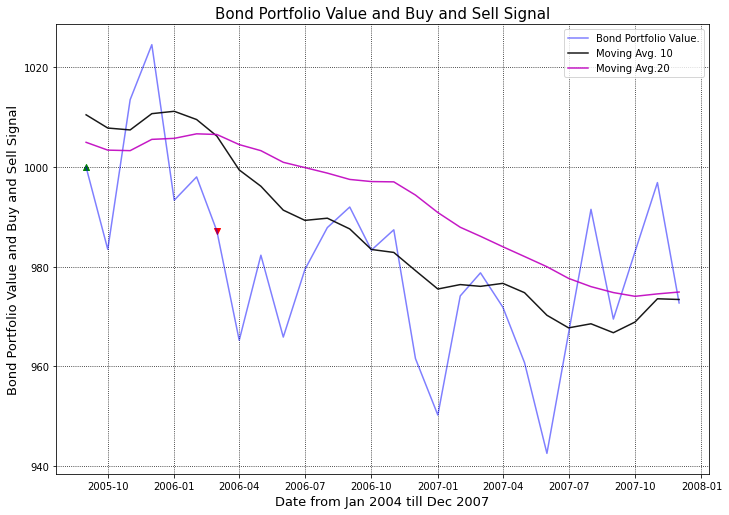

In [398]:
rcParams['figure.figsize'] = 11.69,8.27

# Bond Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df.index, moving_average_df.Bond_Port_Value, label='Bond Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df.index, moving_average_df.MA10_bond, label='Moving Avg. 10', c='k', alpha=0.9)
plt.plot(moving_average_df.index, moving_average_df.MA20_bond, label='Moving Avg.20',c='m' ,alpha=0.9)
# Trading Signals
plt.scatter(moving_average_df.iloc[Buy_Bond].index,moving_average_df.iloc[Buy_Bond]['Bond_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df.iloc[Sell_Bond].index,moving_average_df.iloc[Sell_Bond]['Bond_Port_Value'], marker='v', color='r')
                               
plt.title('Bond Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Bond Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

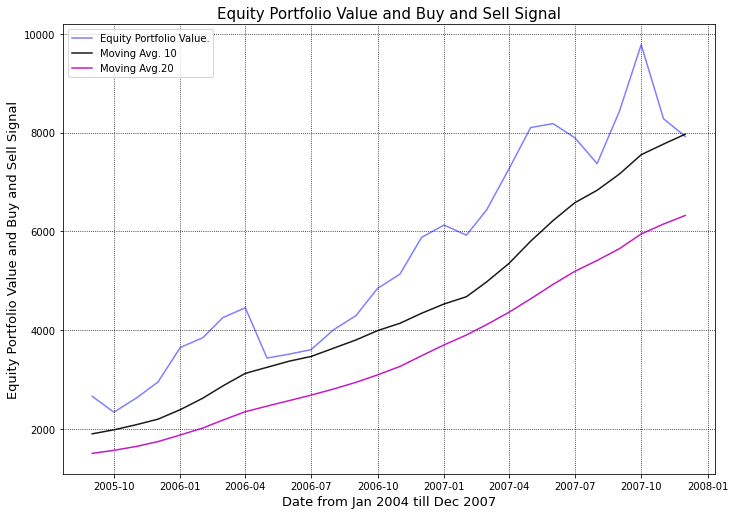

In [399]:
rcParams['figure.figsize'] = 11.69,8.27

# Equity Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df.index, moving_average_df.Equity_Port_Value, label='Equity Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df.index, moving_average_df.MA10_equity, label='Moving Avg. 10', c='k', alpha=0.9)
plt.plot(moving_average_df.index, moving_average_df.MA20_equity, label='Moving Avg.20', c='m', alpha=0.9)
# Trading Signals
plt.scatter(moving_average_df.iloc[Buy_Equity].index,moving_average_df.iloc[Buy_Equity]['Equity_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df.iloc[Sell_Equity].index,moving_average_df.iloc[Sell_Equity]['Equity_Port_Value'], marker='v', color='r')
                               
plt.title('Equity Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Equity Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

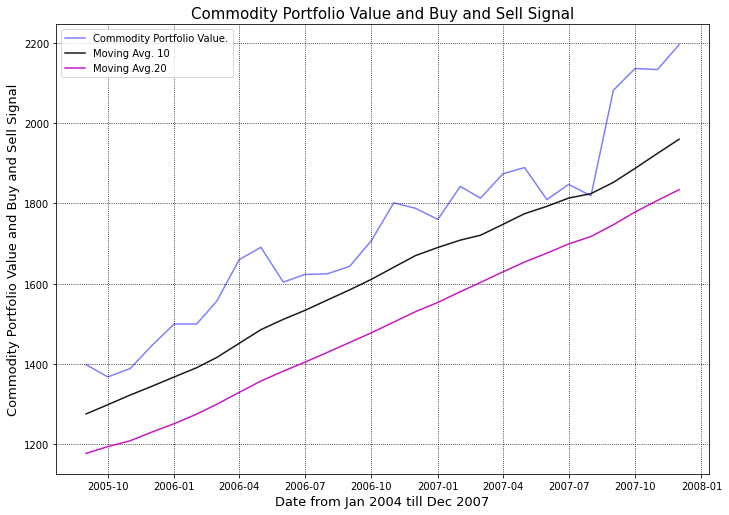

In [400]:
rcParams['figure.figsize'] = 11.69,8.27

# Commodity Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df.index, moving_average_df.Commodity_Port_Value, label='Commodity Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df.index, moving_average_df.MA10_commodity, label='Moving Avg. 10', c='k', alpha=0.9)
plt.plot(moving_average_df.index, moving_average_df.MA20_commodity, label='Moving Avg.20', c='m', alpha=0.9)
# Trading Signals
plt.scatter(moving_average_df.iloc[Buy_Commodity].index,moving_average_df.iloc[Buy_Commodity]['Commodity_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df.iloc[Sell_Commodity].index,moving_average_df.iloc[Sell_Commodity]['Commodity_Port_Value'], marker='v', color='r')
                               
plt.title('Commodity Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Commodity Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

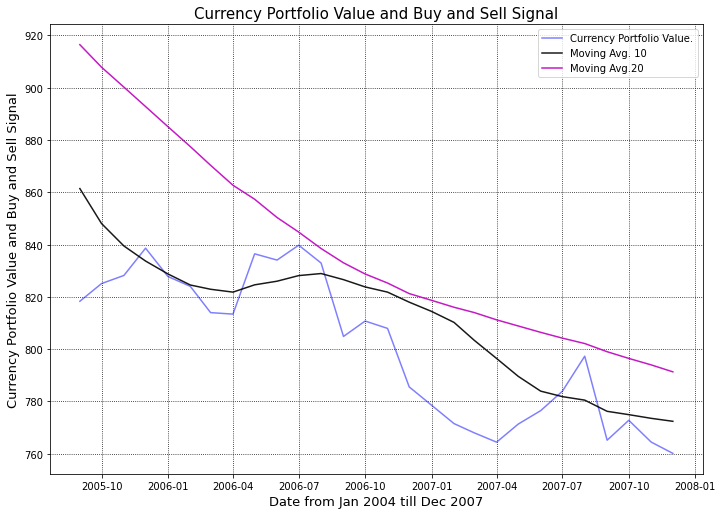

In [401]:
rcParams['figure.figsize'] = 11.69,8.27

# Currency Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df.index, moving_average_df.Currency_Port_Value, label='Currency Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df.index, moving_average_df.MA10_currency, label='Moving Avg. 10', c='k', alpha=0.9)
plt.plot(moving_average_df.index, moving_average_df.MA20_currency, label='Moving Avg.20', c='m', alpha=0.9)
# Trading Signals
plt.scatter(moving_average_df.iloc[Buy_Currency].index, moving_average_df.iloc[Buy_Currency]['Currency_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df.iloc[Sell_Currency].index, moving_average_df.iloc[Sell_Currency]['Currency_Port_Value'], marker='v', color='r')
                               
plt.title('Currency Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Currency Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

**With Moving Average (MA) Strategy (10 months)**

In [402]:
moving_average_df_10 = mix_port_2004_2007.copy()
moving_average_df_10.head(3)

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2004-02-01      1014.744390        1115.944771           1032.099606   
2004-03-01      1015.488346        1052.866550           1095.524950   
2004-04-01       979.317243         996.689433           1015.147901   

            Currency_Port_Value  
Date                             
2004-02-01           997.155003  
2004-03-01           980.645191  
2004-04-01           987.312426

In [403]:
# Create moving average of 10 months
moving_average_df_10['MA10_bond'] = moving_average_df['Bond_Port_Value'].rolling(10).mean()
moving_average_df_10['MA10_equity'] = moving_average_df['Equity_Port_Value'].rolling(10).mean()
moving_average_df_10['MA10_commodity'] = moving_average_df['Commodity_Port_Value'].rolling(10).mean()
moving_average_df_10['MA10_currency'] = moving_average_df['Currency_Port_Value'].rolling(10).mean()

In [404]:
moving_average_df_10.head(6)

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2004-02-01      1014.744390        1115.944771           1032.099606   
2004-03-01      1015.488346        1052.866550           1095.524950   
2004-04-01       979.317243         996.689433           1015.147901   
2004-05-01       989.241898         960.373490           1079.675877   
2004-06-01       979.833369        1054.405811           1023.679299   
2004-07-01       989.800769        1018.122228           1062.963923   

            Currency_Port_Value  MA10_bond  MA10_equity  MA10_commodity  \
Date                                                                      
2004-02-01           997.155003        NaN          NaN             NaN   
2004-03-01           980.645191        NaN          NaN             NaN   
2004-04-01           987.312426        NaN          NaN             NaN   
2004-05-01           981.705014        NaN          NaN             NaN   
2004-06-01           976.399619        NaN          NaN             NaN   
2004-07-01           956.535589        NaN          NaN             NaN   

            MA10_currency  
Date                       
2004-02-01            NaN  
2004-03-01            NaN  
2004-04-01            NaN  
2004-05-01            NaN  
2004-06-01            NaN  
2004-07-01            NaN

In [405]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
moving_average_df_10.dropna(axis=0, inplace=True)
moving_average_df_10.head(5)

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2006-06-01       965.884243        3517.077920           1603.747191   
2006-07-01       979.444008        3606.092859           1622.757330   
2006-08-01       987.827957        4007.930022           1624.347791   
2006-09-01       991.945965        4293.292206           1643.135848   
2006-10-01       983.308791        4844.900796           1707.303848   

            Currency_Port_Value   MA10_bond  MA10_equity  MA10_commodity  \
Date                                                                       
2006-06-01           834.067808  991.321418  3374.399811     1510.909115   
2006-07-01           839.754250  989.271877  3468.722942     1533.381964   
2006-08-01           832.934392  989.708768  3635.347882     1559.059577   
2006-09-01           804.863876  987.557692  3802.013565     1584.541816   
2006-10-01           810.759773  983.440487  3991.427953     1610.702503   

            MA10_currency  
Date                       
2006-06-01     825.987170  
2006-07-01     828.131269  
2006-08-01     828.916399  
2006-09-01     826.584089  
2006-10-01     823.798709

In [406]:
# Define the Buy and Sell Signals (Trade Signals) of all asset classes of Portfolio
# If the Moving Avg. (10 months) < asset value, the decision is buy the asset
# If the moving Avg. (10 months) < asset value, the decision is sell the asset

# Buy and Sell Signals of Bonds
Buy_Bond = []
Sell_Bond = []

for i in range(len(moving_average_df_10)):
    if moving_average_df_10.MA10_bond.iloc[i] < moving_average_df_10.Bond_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_bond.iloc[i-1] > moving_average_df_10.Bond_Port_Value.iloc[i-1]:
        Buy_Bond.append(i)
        
    elif moving_average_df_10.MA10_bond.iloc[i] > moving_average_df_10.Bond_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_bond.iloc[i-1] < moving_average_df_10.Bond_Port_Value.iloc[i-1]:
        Sell_Bond.append(i)    

# Buy and Sell Signals of Equity
Buy_Equity = []
Sell_Equity = []

for i in range(len(moving_average_df_10)):
    if moving_average_df_10.MA10_equity.iloc[i] < moving_average_df_10.Equity_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_equity.iloc[i-1] > moving_average_df_10.Equity_Port_Value.iloc[i-1]:
        Buy_Equity.append(i)
        
    elif moving_average_df_10.MA10_equity.iloc[i] > moving_average_df_10.Equity_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_equity.iloc[i-1] < moving_average_df_10.Equity_Port_Value.iloc[i-1]:
        Sell_Equity.append(i)    
        
# Buy and Sell Signals of Commodity
Buy_Commodity = []
Sell_Commodity = []

for i in range(len(moving_average_df_10)):
    if moving_average_df_10.MA10_commodity.iloc[i] < moving_average_df_10.Commodity_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_commodity.iloc[i-1] > moving_average_df_10.Commodity_Port_Value.iloc[i-1]:
        Buy_Commodity.append(i)
        
    elif moving_average_df_10.MA10_commodity.iloc[i] > moving_average_df_10.Commodity_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_commodity.iloc[i-1] < moving_average_df_10.Commodity_Port_Value.iloc[i-1]:
        Sell_Commodity.append(i)    

# Buy and Sell Signals of Currency
Buy_Currency = []
Sell_Currency = []

for i in range(len(moving_average_df_10)):
    if moving_average_df_10.MA10_currency.iloc[i] < moving_average_df_10.Currency_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_currency.iloc[i-1] > moving_average_df_10.Currency_Port_Value.iloc[i-1]:
        Buy_Currency.append(i)
        
    elif moving_average_df_10.MA10_currency.iloc[i] > moving_average_df_10.Currency_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_currency.iloc[i-1] < moving_average_df_10.Currency_Port_Value.iloc[i-1]:
        Sell_Currency.append(i)    

In [407]:
Buy_Bond, Sell_Bond

([3, 5, 9, 14], [4, 6, 10, 18])

In [408]:
Buy_Equity, Sell_Equity

([0], [18])

In [409]:
Buy_Commodity, Sell_Commodity

([15], [14])

In [410]:
Buy_Currency, Sell_Currency

([0, 13], [3, 15])

In [411]:
moving_average_df_10.columns

Index(['Bond_Port_Value', 'Equity_Port_Value', 'Commodity_Port_Value',
       'Currency_Port_Value', 'MA10_bond', 'MA10_equity', 'MA10_commodity',
       'MA10_currency'],
      dtype='object')

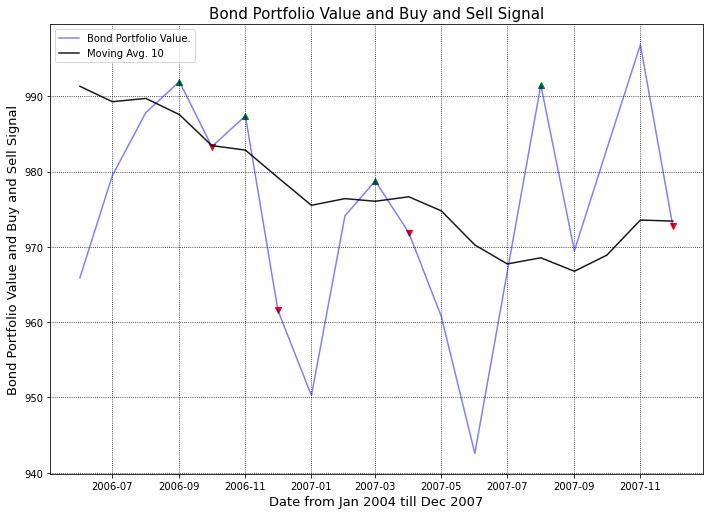

In [412]:
rcParams['figure.figsize'] = 11.69,8.27

# Bond Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df_10.index, moving_average_df_10.Bond_Port_Value, label='Bond Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df_10.index, moving_average_df_10.MA10_bond, label='Moving Avg. 10', c='k', alpha=0.9)

# Trading Signals
plt.scatter(moving_average_df_10.iloc[Buy_Bond].index,moving_average_df_10.iloc[Buy_Bond]['Bond_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df_10.iloc[Sell_Bond].index,moving_average_df_10.iloc[Sell_Bond]['Bond_Port_Value'], marker='v', color='r')
                               
plt.title('Bond Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Bond Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

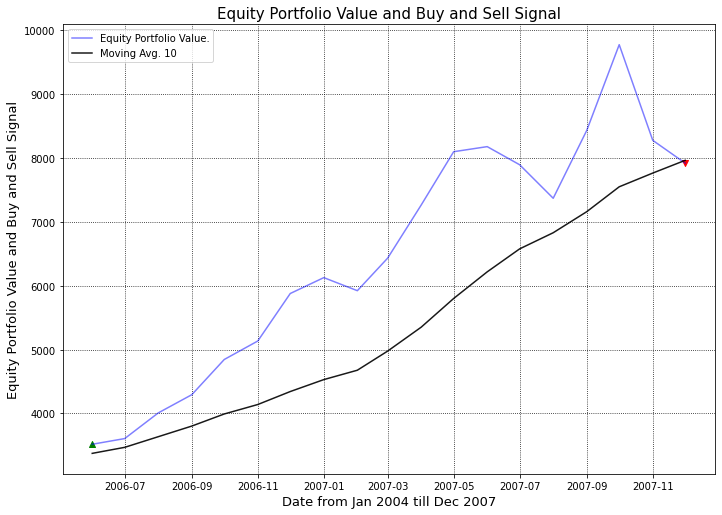

In [413]:
rcParams['figure.figsize'] = 11.69,8.27

# Equity Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df_10.index, moving_average_df_10.Equity_Port_Value, label='Equity Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df_10.index, moving_average_df_10.MA10_equity, label='Moving Avg. 10', c='k', alpha=0.9)

# Trading Signals
plt.scatter(moving_average_df_10.iloc[Buy_Equity].index,moving_average_df_10.iloc[Buy_Equity]['Equity_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df_10.iloc[Sell_Equity].index,moving_average_df_10.iloc[Sell_Equity]['Equity_Port_Value'], marker='v', color='r')
                               
plt.title('Equity Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Equity Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

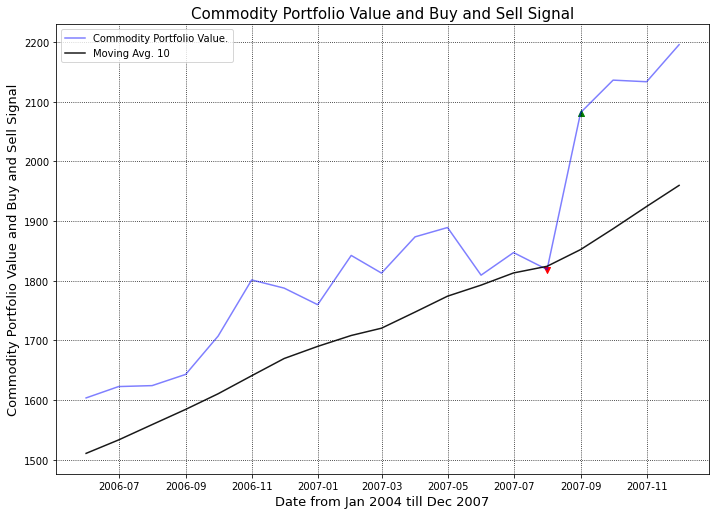

In [414]:
rcParams['figure.figsize'] = 11.69,8.27

# Commodity Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df_10.index, moving_average_df_10.Commodity_Port_Value, label='Commodity Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df_10.index, moving_average_df_10.MA10_commodity, label='Moving Avg. 10', c='k', alpha=0.9)

# Trading Signals
plt.scatter(moving_average_df_10.iloc[Buy_Commodity].index,moving_average_df_10.iloc[Buy_Commodity]['Commodity_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df_10.iloc[Sell_Commodity].index,moving_average_df_10.iloc[Sell_Commodity]['Commodity_Port_Value'], marker='v', color='r')
                               
plt.title('Commodity Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Commodity Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

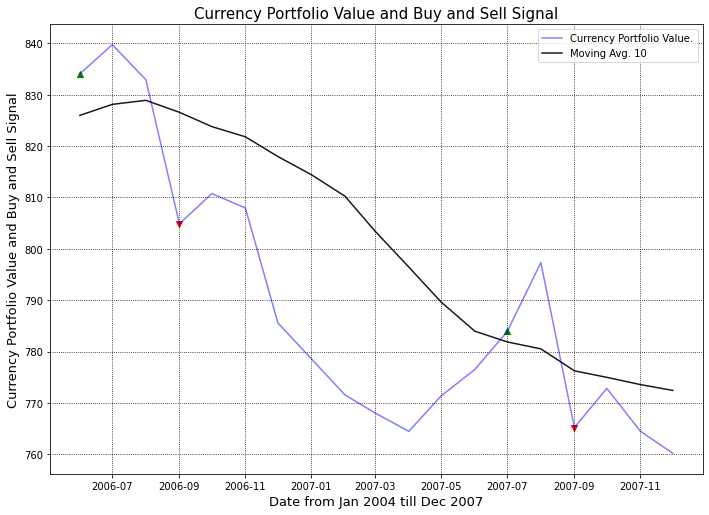

In [415]:
rcParams['figure.figsize'] = 11.69,8.27

# Currency Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df_10.index, moving_average_df_10.Currency_Port_Value, label='Currency Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df_10.index, moving_average_df_10.MA10_currency, label='Moving Avg. 10', c='k', alpha=0.9)

# Trading Signals
plt.scatter(moving_average_df_10.iloc[Buy_Currency].index, moving_average_df_10.iloc[Buy_Currency]['Currency_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df_10.iloc[Sell_Currency].index, moving_average_df_10.iloc[Sell_Currency]['Currency_Port_Value'], marker='v', color='r')
                               
plt.title('Currency Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Currency Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

**Conclusion on 10 Months Moving Average Strategy**

**Arithmetic Mean**

- MA Bond -0.0007083122790490789
- MA Equity 0.05480706713751194
- MA Commodity 0.01627005987181757
- MA Currency -0.006161623944215452

**Standards Deviation**

- MA Bond 0.0025650536439286004
- MA Equity 0.018721420178183377
- MA Commodity 0.004438365634002931
- MA Currency 0.00537832595659851


**Skewness**

- MA Bond -0.13582658228815575
- MA Equity 0.5906657809172492
- MA Commodity 0.010166292705500153
- MA Currency 0.9364845811570605

**Kurtosis**

- MA Bond -1.5155723626018232
- MA Equity -0.8377280824196838
- MA Commodity -1.2607975249756773
- MA Currency -0.15846312125118978


**Geometric Mean Rate of Returns**

- MA Bond 0.001205049935948448
- MA Equity 0.05173075877858413
- MA Commodity 0.015450490975218967
- MA Currency 0.004914020576446691

**Volatility**

- MA Bond 0.015602612193493801
- MA Equity 0.11387795317382286
- MA Commodity 0.02699752417427633
- MA Currency 0.03271507960452775

**Annualized Sharpe Ratio**

- MA Bond -2.6936407938711544
- MA Equity 17.422980749383683
- MA Commodity 21.395465719168655
- MA Currency -7.368315614291146

**Annualized Sortino Ratio**

- MA Bond -3.826300878415842 
- MA Equity NaN
- MA Commodity NaN 
- MA Currency -8.261406231595638

In [580]:
# A Table of A Conclusion on 10 Months Moving Average Strategy

MA = {'Particular':['Arithmetic Mean','Standard Deviation','Skewness','Kurtosis','Geometric Mean',
                      'Volatility','Sharpe Ratio', 'Sortino Ratio','Cumulative Return'],
        'Bond':[-0.0007083122790490789, 0.0025650536439286004, -0.13582658228815575, -1.5155723626018232, 0.001205049935948448,
                 0.015602612193493801, -2.6936407938711544, -3.826300878415842, -0.0255],
        'Equity':[0.05480706713751194, 0.018721420178183377, 0.5906657809172492, -0.8377280824196838, 0.05173075877858413,
                  0.11387795317382286 , 17.422980749383683,0.0000, 5.9010],
        'Commodity':[0.01627005987181757, 0.004438365634002931, 0.010166292705500153, -1.2607975249756773, 0.015450490975218967,
                     0.02699752417427633, 21.395465719168655, 0.0000, 0.7986],
        'Currency':[-0.006161623944215452, 0.00537832595659851, 0.9364845811570605, -0.15846312125118978,0.004914020576446691,
                    0.03271507960452775, -7.368315614291146, -8.261406231595638, -0.2017]}


df_MA = pd.DataFrame(data=MA)
df_MA

Particular      Bond     Equity  Commodity  Currency
0     Arithmetic Mean -0.000708   0.054807   0.016270 -0.006162
1  Standard Deviation  0.002565   0.018721   0.004438  0.005378
2            Skewness -0.135827   0.590666   0.010166  0.936485
3            Kurtosis -1.515572  -0.837728  -1.260798 -0.158463
4      Geometric Mean  0.001205   0.051731   0.015450  0.004914
5          Volatility  0.015603   0.113878   0.026998  0.032715
6        Sharpe Ratio -2.693641  17.422981  21.395466 -7.368316
7       Sortino Ratio -3.826301   0.000000   0.000000 -8.261406
8   Cumulative Return -0.025500   5.901000   0.798600 -0.201700

In [581]:
df_MA['Portfolio'] = df_MA[['Bond','Equity','Commodity','Currency']].sum(axis=1)
df_MA

Particular      Bond     Equity  Commodity  Currency  Portfolio
0     Arithmetic Mean -0.000708   0.054807   0.016270 -0.006162   0.064207
1  Standard Deviation  0.002565   0.018721   0.004438  0.005378   0.031103
2            Skewness -0.135827   0.590666   0.010166  0.936485   1.401490
3            Kurtosis -1.515572  -0.837728  -1.260798 -0.158463  -3.772561
4      Geometric Mean  0.001205   0.051731   0.015450  0.004914   0.073300
5          Volatility  0.015603   0.113878   0.026998  0.032715   0.189193
6        Sharpe Ratio -2.693641  17.422981  21.395466 -7.368316  28.756490
7       Sortino Ratio -3.826301   0.000000   0.000000 -8.261406 -12.087707
8   Cumulative Return -0.025500   5.901000   0.798600 -0.201700   6.472400

<h4><center>Other RP techniques of Portfolio</center></h4>

In [416]:
# Dataset (Bond.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
bond_df_2004_2007 = pd.read_csv('Bond_2004_2007.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(bond_df_2004_2007.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
bond_df_2004_2007.head()

(48, 7)


Date  Germany  Australia      US      UK  Canada   Japan
0  1/1/2004   100.02     105.10  100.98  100.92  104.87  100.66
1  2/1/2004   101.31     107.39  100.23  102.02  106.25  100.66
2  3/1/2004   102.45     107.20  101.30  102.13  106.75   98.78
3  4/1/2004   100.28     103.94   96.17  100.19  103.81   99.74
4  5/1/2004    99.43     104.58  101.25   98.86  103.52   99.83

In [417]:
# Use pandas.to_datetime() function to convert argument to datetime
bond_df_2004_2007['Date'] = pd.to_datetime(bond_df_2004_2007.Date)

In [418]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
bond_df_2004_2007.set_index('Date',inplace=True)

In [419]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
bond_df_2004_2007 = np.log(1+bond_df_2004_2007[['Germany','Australia','US','UK','Canada','Japan']].pct_change())

In [420]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
bond_df_2004_2007.dropna(axis=0, inplace=True)
bond_df_2004_2007.head(5)

Germany  Australia        US        UK    Canada     Japan
Date                                                                   
2004-02-01  0.012815   0.021555 -0.007455  0.010841  0.013073  0.000000
2004-03-01  0.011190  -0.001771  0.010619  0.001078  0.004695 -0.018853
2004-04-01 -0.021409  -0.030882 -0.051969 -0.019178 -0.027927  0.009672
2004-05-01 -0.008512   0.006139  0.051475 -0.013364 -0.002797  0.000902
2004-06-01 -0.002921  -0.002010  0.000592  0.004239 -0.011269 -0.013209

In [421]:
1/6

0.16666666666666666

In [422]:
weights = [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666,
           0.16666666666666666, 0.16666666666666666]

In [423]:
# Use numpy.dot() function to returns the dot product of two arrays.
np.dot(bond_df_2004_2007.mean(), weights)

0.0004135803373946482

In [424]:
def portfolio_returns(weights):
    return np.dot(bond_df_2004_2007.mean(), weights)

In [425]:
# Use pandas.DataFrame.cov() to Compute pairwise covariance of columns, excluding NA/null values.
bond_df_2004_2007.cov()

Germany  Australia        US        UK    Canada     Japan
Germany    0.000276   0.000073  0.000161 -0.000250  0.000079  0.000071
Australia  0.000073   0.000196  0.000141  0.000101  0.000104  0.000042
US         0.000161   0.000141  0.000438 -0.000115  0.000135  0.000069
UK        -0.000250   0.000101 -0.000115  0.007404  0.000042 -0.000110
Canada     0.000079   0.000104  0.000135  0.000042  0.000166  0.000026
Japan      0.000071   0.000042  0.000069 -0.000110  0.000026  0.000211

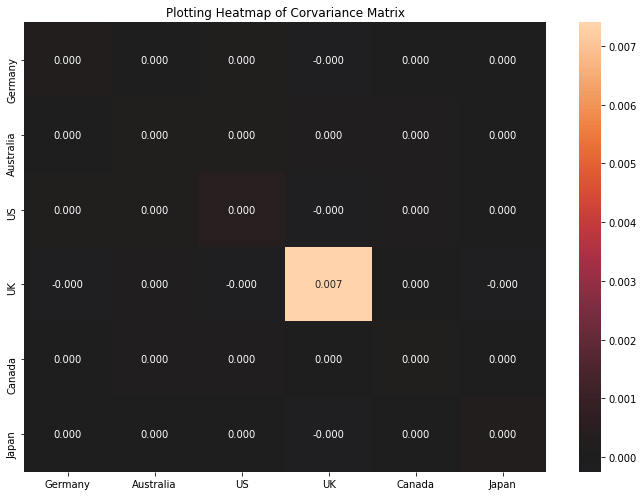

In [426]:
plt.figure(figsize=[ 11.69, 8.27]);
plt.title('Plotting Heatmap of Corvariance Matrix');
# Use seaborn.heatmap() function to plot rectangular data as a color-encoded matrix.
# Use pandas.DataFrame.cov() to Compute pairwise covariance of columns, excluding NA/null values.
sb.heatmap(bond_df_2004_2007.cov(),annot=True,fmt='.3f', center=0);

In [427]:
# Calculate the portfolio_variance 
portfolio_variance = weights[0]**2* 0.000276 + weights[1]**2* 0.000196 + weights[2]**2* 0.000438 + weights[3]**2* 0.007404 + weights[4]**2* 0.000166 + weights[5]**2* 0.000211
portfolio_variance

0.00024141666666666663

In [428]:
# calculate the portfolio standard deviation (Standard deviation = Square root of the variance)
portfolio_standard_deviation = portfolio_variance**(1/2)
portfolio_standard_deviation

0.015537588830531803

In [429]:
bond_df_2004_2007.shape[0]

47

In [430]:
portfolio_variance**(1/2)*np.sqrt(47)

0.10652034234517523

In [431]:
# Calculate the portfolio_variance 
np.dot(np.dot(bond_df_2004_2007.cov(),weights),weights)

0.0002730262882649481

In [432]:
# calculate the portfolio standard deviation
(np.dot(np.dot(bond_df_2004_2007.cov(),weights),weights))**(1/2)

0.01652350714179493

In [433]:
def portfolio_std(weights):
    return (np.dot(np.dot(bond_df_2004_2007.cov(),weights),weights))**(1/2)

In [434]:
def portfolio_std(weights):
    return (np.dot(np.dot(bond_df_2004_2007.cov(),weights),weights))**(1/2)*np.sqrt(250)

**The Efficient Frontier**

- The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. 
- Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk.

In [435]:
def weights_creator(bond_df_2004_2007):
    rand = np.random.random(len(bond_df_2004_2007.columns))
    rand /= rand.sum()
    return rand


In [436]:
weights_creator(bond_df_2004_2007)

array([0.32074317, 0.0613921 , 0.08582766, 0.33540771, 0.01338089,
       0.18324845])

In [437]:
def portfolio_returns(weights):
    return np.dot(bond_df_2004_2007.mean(), weights)

In [438]:
weights = [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666,
           0.16666666666666666, 0.16666666666666666]

In [439]:
portfolio_returns(weights)

0.0004135803373946482

In [440]:
def portfolio_std(weights):
    return (np.dot(np.dot(bond_df_2004_2007.cov(),weights),weights))**(1/2)*np.sqrt(250)

In [441]:
portfolio_std(weights)

0.26125958751065387

In [442]:
# Generate efficient frontier

returns = []
stds = []
w = []

for i in range(500):
    weights = weights_creator(bond_df_2004_2007)
    returns.append(portfolio_returns(weights))
    stds.append(portfolio_std(weights))
    w.append(weights)
    

In [443]:
returns

[0.0005005941968016652,
 0.0009860643699032897,
 0.0002566749484023451,
 6.670832095876994e-05,
 -0.0005849110549776151,
 -0.0009856477868842616,
 -0.0008155910450670359,
 -0.0006864431030943091,
 0.0008194229273437651,
 0.0013857738541493653,
 6.742357684326125e-05,
 0.0010863771885042497,
 -9.087673500857846e-05,
 -0.0005296280468496352,
 0.0006314734101261863,
 0.0014548790048555854,
 -0.00025780696814575174,
 0.0008231630207193774,
 -0.00022251020050294398,
 0.00031079766394181887,
 0.0011865573826999802,
 0.00047690084807410003,
 -0.00022063964965556048,
 -0.00018870597286884305,
 0.0012184035816553917,
 0.0001445574121877772,
 0.000845852900019041,
 0.0017270032883718207,
 0.00020930980263978783,
 0.0001212700021495114,
 0.00015203954082355648,
 -0.0008171077016842558,
 0.00045092925960729907,
 -0.0005569628841096471,
 0.000783461044785646,
 -0.0006092723945315144,
 1.5636327983943685e-05,
 0.0011257655471884384,
 0.00010908547057570566,
 0.0007751212876630409,
 -0.00050287077317

In [444]:
stds

[0.26203824058036135,
 0.38875163271324126,
 0.2753161063990212,
 0.2114563969642353,
 0.17480695225751827,
 0.17737358739149925,
 0.1621545154870601,
 0.16399986762703947,
 0.3235004968186316,
 0.4209327544129844,
 0.22335714657614328,
 0.3322442903303993,
 0.1853355999978956,
 0.16944680380629676,
 0.36068646189538794,
 0.45682193731161036,
 0.17207090669486982,
 0.34098688484112355,
 0.20721901702673187,
 0.26487489189687546,
 0.3843511979674481,
 0.2673109306915957,
 0.1780756023827404,
 0.20621896266164258,
 0.3697426095306865,
 0.22704797429352377,
 0.37108987754924605,
 0.5444139245605168,
 0.23369312627825672,
 0.19686699189747298,
 0.22154948030588634,
 0.1859596792895591,
 0.29356494023321267,
 0.18384673217919223,
 0.29364657917094134,
 0.16009720193313787,
 0.21107733321311278,
 0.37925003467928003,
 0.21265166386420928,
 0.31354521571407573,
 0.1642064849663387,
 0.2407198770250453,
 0.21870671508677686,
 0.3102894157100474,
 0.2871617502981504,
 0.22473316292886067,
 0.23

In [445]:
w

[array([0.10342232, 0.06808297, 0.24644667, 0.16228638, 0.26042378,
        0.15933789]),
 array([0.02254407, 0.22008331, 0.09578556, 0.27288651, 0.1816118 ,
        0.20708874]),
 array([0.14296156, 0.27147215, 0.12746442, 0.17351801, 0.22292937,
        0.0616545 ]),
 array([0.10161117, 0.27676862, 0.21985304, 0.1071599 , 0.01643944,
        0.27816783]),
 array([0.19505222, 0.22294755, 0.2084296 , 0.00959164, 0.14614669,
        0.21783231]),
 array([0.25474387, 0.32411679, 0.05965597, 0.00573691, 0.34408416,
        0.01166231]),
 array([0.26653599, 0.3327177 , 0.0113132 , 0.01052075, 0.12564114,
        0.25327122]),
 array([0.20654936, 0.17090747, 0.08116596, 0.01879294, 0.36418643,
        0.15839784]),
 array([0.21736558, 0.11632733, 0.2381677 , 0.21834286, 0.14854787,
        0.06124866]),
 array([0.18712018, 0.11363359, 0.15825842, 0.30449467, 0.06661077,
        0.16988237]),
 array([0.15128354, 0.26903721, 0.03410356, 0.13372888, 0.1167616 ,
        0.29508521]),
 array([0.

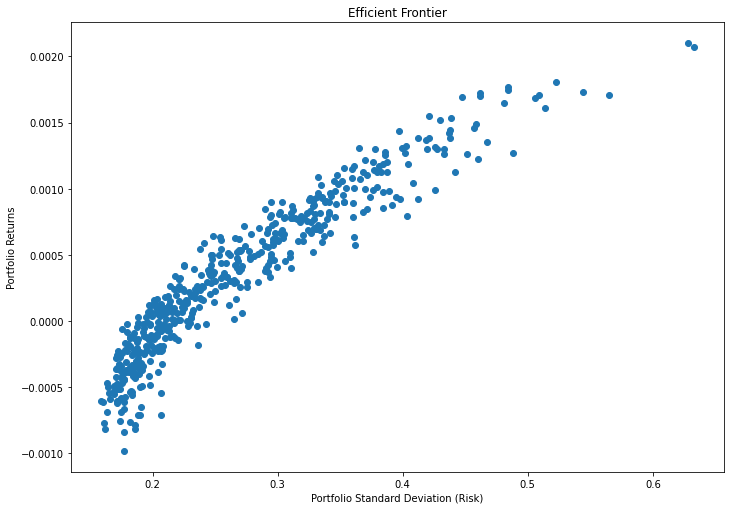

In [446]:
rcParams['figure.figsize'] = 11.69,8.27
plt.scatter(stds, returns)
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Portfolio Returns')
plt.show();

In [447]:
bond_df_2004_2007.shape[0]

47

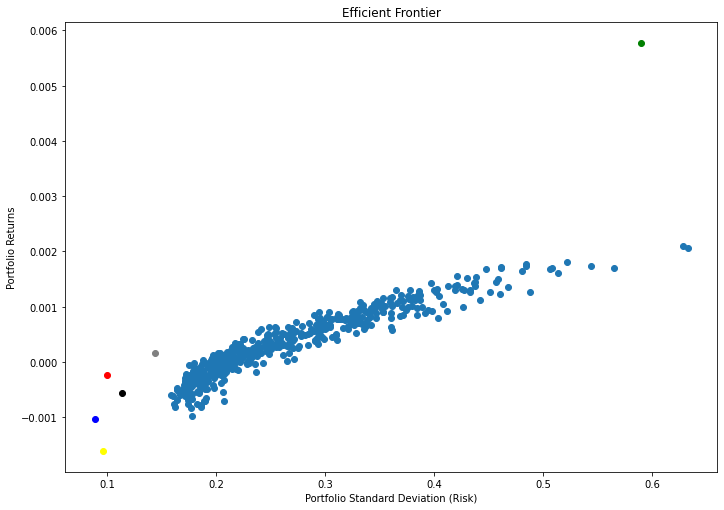

In [448]:
rcParams['figure.figsize'] = 11.69,8.27
plt.scatter(stds, returns)
plt.scatter(bond_df_2004_2007.std().iloc[0]*np.sqrt(47), bond_df_2004_2007.mean().iloc[0],c='k')
plt.scatter(bond_df_2004_2007.std().iloc[1]*np.sqrt(47), bond_df_2004_2007.mean().iloc[1],c='yellow')
plt.scatter(bond_df_2004_2007.std().iloc[2]*np.sqrt(47), bond_df_2004_2007.mean().iloc[2],c='gray')
plt.scatter(bond_df_2004_2007.std().iloc[3]*np.sqrt(47), bond_df_2004_2007.mean().iloc[3],c='green')
plt.scatter(bond_df_2004_2007.std().iloc[4]*np.sqrt(47), bond_df_2004_2007.mean().iloc[4],c='blue')
plt.scatter(bond_df_2004_2007.std().iloc[5]*np.sqrt(47), bond_df_2004_2007.mean().iloc[5],c='red')

plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Portfolio Returns')
plt.show();

**Minimum Variance Portfolio (MV)**

- A minimum variance portfolio indicates a well-diversified portfolio that consists of individually risky assets, which are hedged when traded together, resulting in the lowest possible risk for the rate of expected return.

- A minimum variance portfolio is a collection of securities that combine to minimize the price volatility of the overall portfolio. Volatility is a statistical measure of a particular security's price movement (ups and downs).

In [449]:
min(stds)

0.1586930462039299

In [450]:
stds.index(min(stds))

92

In [451]:
# Minimum Variance Portfolio
returns[stds.index(min(stds))]

-0.000603064741574092

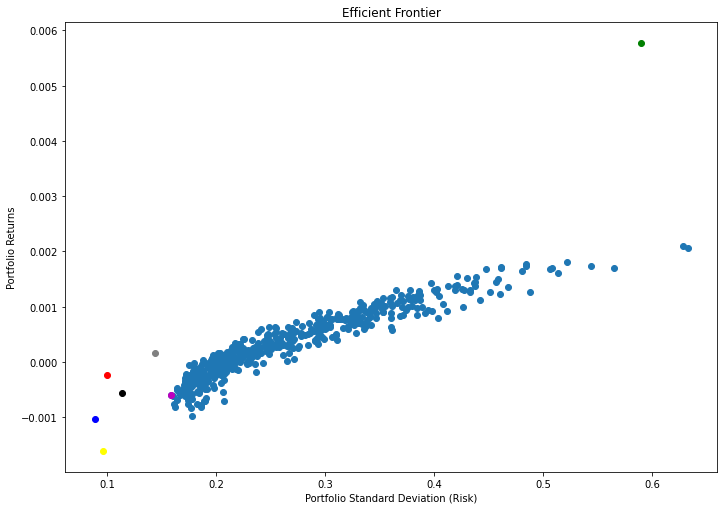

In [452]:
rcParams['figure.figsize'] = 11.69,8.27
plt.scatter(stds, returns)

plt.scatter(bond_df_2004_2007.std().iloc[0]*np.sqrt(47), bond_df_2004_2007.mean().iloc[0],c='k')
plt.scatter(bond_df_2004_2007.std().iloc[1]*np.sqrt(47), bond_df_2004_2007.mean().iloc[1],c='yellow')
plt.scatter(bond_df_2004_2007.std().iloc[2]*np.sqrt(47), bond_df_2004_2007.mean().iloc[2],c='gray')
plt.scatter(bond_df_2004_2007.std().iloc[3]*np.sqrt(47), bond_df_2004_2007.mean().iloc[3],c='green')
plt.scatter(bond_df_2004_2007.std().iloc[4]*np.sqrt(47), bond_df_2004_2007.mean().iloc[4],c='blue')
plt.scatter(bond_df_2004_2007.std().iloc[5]*np.sqrt(47), bond_df_2004_2007.mean().iloc[5],c='red')

plt.scatter(min(stds),returns[stds.index(min(stds))], c='m')

plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Portfolio Returns')
plt.show();

In [453]:
# Calcualte the Sharpe Ratio
mean = np.mean(returns)
sigma = np.std(returns)

Sharpe_Ratio = mean / sigma
Sharpe_Ratio

0.5632439001240706

<h4><center>Apply Correlation Analysis Between Asset Classes Portfolio and Benchmark Portfolio</center></h4>

In [454]:
# Load Modules
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from scipy.stats import linregress

In [455]:
benchmark.head(3)

benchmark_currency  benchmark_equity  benchmark_commodity  \
Dates                                                                   
2004-01-31            10957.34           1693.20               260.09   
2004-02-29            10915.72           1726.68               278.66   
2004-03-31            10916.52           1715.58               282.12   

            benchmark_bond  
Dates                       
2004-01-31          301.52  
2004-02-29          301.91  
2004-03-31          290.18

In [456]:
benchmark['benchmark_bond_return'] = benchmark['benchmark_bond'].pct_change()
benchmark['benchmark_equity_return'] = benchmark['benchmark_equity'].pct_change()
benchmark['benchmark_commodity_return'] = benchmark['benchmark_commodity'].pct_change()
benchmark['benchmark_currency_return'] = benchmark['benchmark_currency'].pct_change()

In [457]:
benchmark.dropna(axis=0, inplace=True)
benchmark.dropna(axis=0, inplace=True)
benchmark.dropna(axis=0, inplace=True)
benchmark.dropna(axis=0, inplace=True)

In [458]:
benchmark.head(3)

benchmark_currency  benchmark_equity  benchmark_commodity  \
Dates                                                                   
2004-02-29            10915.72           1726.68               278.66   
2004-03-31            10916.52           1715.58               282.12   
2004-04-30            11306.02           1675.65               289.51   

            benchmark_bond  benchmark_bond_return  benchmark_equity_return  \
Dates                                                                        
2004-02-29          301.91               0.001293                 0.019773   
2004-03-31          290.18              -0.038853                -0.006429   
2004-04-30          294.20               0.013853                -0.023275   

            benchmark_commodity_return  benchmark_currency_return  
Dates                                                              
2004-02-29                    0.071398                  -0.003798  
2004-03-31                    0.012417                   0.000073  
2004-04-30                    0.026195                   0.035680

In [459]:
benchmark_bond_return = benchmark['benchmark_bond_return']
print(benchmark_bond_return.shape)
benchmark_bond_return.head(5)

(47,)


Dates
2004-02-29    0.001293
2004-03-31   -0.038853
2004-04-30    0.013853
2004-05-31    0.000782
2004-06-30    0.000509
Name: benchmark_bond_return, dtype: float64

In [460]:
bond_return = bond_df_2004_2007_2['Portfolio_R']
print(bond_return.shape)
bond_return.head(5)

(47,)


Date
2004-02-01    0.014744
2004-03-01    0.000733
2004-04-01   -0.035619
2004-05-01    0.010134
2004-06-01   -0.009511
Name: Portfolio_R, dtype: float64

Beta =  -0.03392629309314419
Correlation Coefficient =  -0.0457789277554037


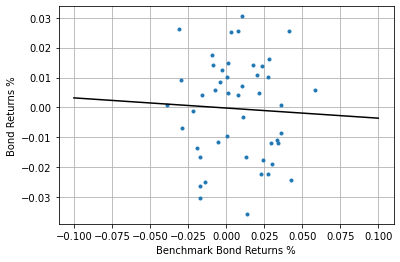

In [461]:
plt.plot(benchmark_bond_return, bond_return,'.')
plt.grid(True)
plt.xlabel('Benchmark Bond Returns %')
plt.ylabel('Bond Returns %')

slope, intercept, r_value, p_value, std_err = linregress(benchmark_bond_return, bond_return)
x = np.linspace(-0.1, 0.1)
plt.plot(x, slope * x + intercept, 'k')
print('Beta = ', slope)
print('Correlation Coefficient = ', r_value)

In [462]:
benchmark_equity_return = benchmark['benchmark_equity_return']
print(benchmark_equity_return.shape)
benchmark_equity_return.head(5)

(47,)


Dates
2004-02-29    0.019773
2004-03-31   -0.006429
2004-04-30   -0.023275
2004-05-31    0.005007
2004-06-30    0.025985
Name: benchmark_equity_return, dtype: float64

In [463]:
equity_return = equity_df_2004_2007_2['Portfolio_R']
print(equity_return.shape)
equity_return.head(5)

(47,)


Date
2004-02-01    0.115945
2004-03-01   -0.056525
2004-04-01   -0.053356
2004-05-01   -0.036437
2004-06-01    0.097912
Name: Portfolio_R, dtype: float64

Beta =  3.4461326284849263
Correlation Coefficient =  0.8624202651730642


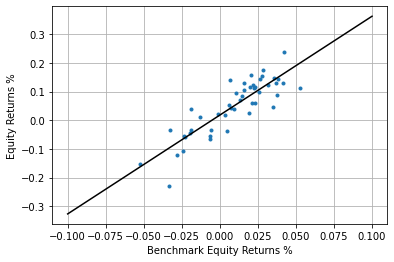

In [464]:
plt.plot(benchmark_equity_return, equity_return,'.')
plt.grid(True)
plt.xlabel('Benchmark Equity Returns %')
plt.ylabel('Equity Returns %')

slope, intercept, r_value, p_value, std_err = linregress(benchmark_equity_return, equity_return)
x = np.linspace(-0.1, 0.1)
plt.plot(x, slope * x + intercept, 'k')
print('Beta = ', slope)
print('Correlation Coefficient = ', r_value)

In [465]:
benchmark_commodity_return = benchmark['benchmark_commodity_return']
print(benchmark_commodity_return.shape)
benchmark_commodity_return.head(5)

(47,)


Dates
2004-02-29    0.071398
2004-03-31    0.012417
2004-04-30    0.026195
2004-05-31    0.041104
2004-06-30   -0.049932
Name: benchmark_commodity_return, dtype: float64

In [466]:
commodity_return = commodity_df_2004_2007_2['Portfolio_R']
#commodity_return = commodity_return.drop(commodity_return.index[0])
print(commodity_return.shape)
commodity_return.head(5)

(47,)


Date
2004-02-01    0.032100
2004-03-01    0.061453
2004-04-01   -0.073369
2004-05-01    0.063565
2004-06-01   -0.051864
Name: Portfolio_R, dtype: float64

Beta =  0.2711762517677011
Correlation Coefficient =  0.44399293736415224


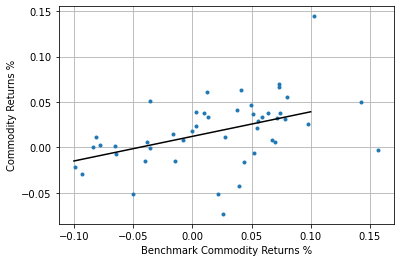

In [467]:
plt.plot(benchmark_commodity_return, commodity_return,'.')
plt.grid(True)
plt.xlabel('Benchmark Commodity Returns %')
plt.ylabel('Commodity Returns %')

slope, intercept, r_value, p_value, std_err = linregress(benchmark_commodity_return, commodity_return)
x = np.linspace(-0.1, 0.1)
plt.plot(x, slope * x + intercept, 'k')
print('Beta = ', slope)
print('Correlation Coefficient = ', r_value)

In [468]:
benchmark_currency_return = benchmark['benchmark_currency_return']
print(benchmark_currency_return.shape)
benchmark_currency_return.head(5)

(47,)


Dates
2004-02-29   -0.003798
2004-03-31    0.000073
2004-04-30    0.035680
2004-05-31   -0.010967
2004-06-30    0.004477
Name: benchmark_currency_return, dtype: float64

In [469]:
currency_return = currency_df_2004_2007_2['Portfolio_R']
print(currency_return.shape)
currency_return.head(5)

(47,)


Date
2004-02-01   -0.002845
2004-03-01   -0.016557
2004-04-01    0.006799
2004-05-01   -0.005679
2004-06-01   -0.005404
Name: Portfolio_R, dtype: float64

Beta =  -0.2656038586682449
Correlation Coefficient =  -0.2407031089083805


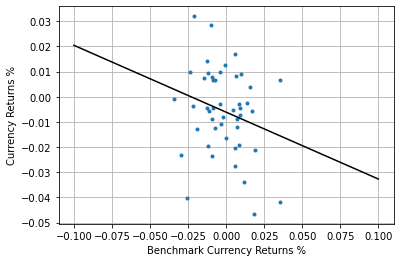

In [470]:
plt.plot(benchmark_currency_return, currency_return,'.')
plt.grid(True)
plt.xlabel('Benchmark Currency Returns %')
plt.ylabel('Currency Returns %')

slope, intercept, r_value, p_value, std_err = linregress(benchmark_currency_return, currency_return)
x = np.linspace(-0.1, 0.1)
plt.plot(x, slope * x + intercept, 'k')
print('Beta = ', slope)
print('Correlation Coefficient = ', r_value)

<h4><center>Inverse Volatility Risk Parity Strategy</center></h4>

**Inverse Volatility ETF**

- An inverse volatility exchange-traded fund (ETF) is a financial product that allows investors to gain exposure to volatility, and thus hedge against portfolio risk, without having to buy options.

- As long as volatility remains low, investors may see a substantial return, as an inverse volatility ETF is essentially a bet that the market will remain stable.

In [471]:
# Use pandas.DataFrame.copy() function to make a copy of Inverse Volatility RP Strategy
inverse_vol_RP = mix_port_2004_2007.copy()
inverse_vol_RP.head(3)

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2004-02-01      1014.744390        1115.944771           1032.099606   
2004-03-01      1015.488346        1052.866550           1095.524950   
2004-04-01       979.317243         996.689433           1015.147901   

            Currency_Port_Value  
Date                             
2004-02-01           997.155003  
2004-03-01           980.645191  
2004-04-01           987.312426

In [472]:
# Calculate monthly returns of asset classes

# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
inverse_vol_RP['Bond_inv_R'] = inverse_vol_RP['Bond_Port_Value'].pct_change()
inverse_vol_RP['Equity_inv_R'] = inverse_vol_RP['Equity_Port_Value'].pct_change()
inverse_vol_RP['Commodity_inv_R'] = inverse_vol_RP['Commodity_Port_Value'].pct_change()
inverse_vol_RP['Currency_inv_R'] = inverse_vol_RP['Currency_Port_Value'].pct_change()

# Use pandas.DataFrame.dropna() function to remove missing values in rows
inverse_vol_RP.dropna(axis=0, inplace=True)

# Use pandas.DataFrame.head(n=5) function to return the first number of rows
inverse_vol_RP.head(3)

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2004-03-01      1015.488346        1052.866550           1095.524950   
2004-04-01       979.317243         996.689433           1015.147901   
2004-05-01       989.241898         960.373490           1079.675877   

            Currency_Port_Value  Bond_inv_R  Equity_inv_R  Commodity_inv_R  \
Date                                                                         
2004-03-01           980.645191    0.000733     -0.056525         0.061453   
2004-04-01           987.312426   -0.035619     -0.053356        -0.073369   
2004-05-01           981.705014    0.010134     -0.036437         0.063565   

            Currency_inv_R  
Date                        
2004-03-01       -0.016557  
2004-04-01        0.006799  
2004-05-01       -0.005679

In [473]:
inverse_vol_RP.shape[0]

46

In [474]:
# Calculate the annualized volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

inverse_vol_RP['Bond_inv_Vol'] = inverse_vol_RP['Bond_inv_R'].rolling(46).std() * math.sqrt(46)
inverse_vol_RP['Equity_inv_Vol'] = inverse_vol_RP['Equity_inv_R'].rolling(46).std() * math.sqrt(46)
inverse_vol_RP['Commodity_inv_Vol'] = inverse_vol_RP['Commodity_inv_R'].rolling(46).std() * math.sqrt(46)
inverse_vol_RP['Currency_inv_Vol'] = inverse_vol_RP['Currency_inv_R'].rolling(46).std() * math.sqrt(46)

In [475]:
inverse_vol_RP[['Bond_inv_Vol','Equity_inv_Vol','Commodity_inv_Vol','Currency_inv_Vol']].dropna()

Bond_inv_Vol  Equity_inv_Vol  Commodity_inv_Vol  Currency_inv_Vol
Date                                                                         
2007-12-01      0.114238        0.658118           0.257944          0.115744

In [476]:
# Calculate the weight proportional to 1 / annualized volatility (reciprocal, one over the volatility)
inverse_vol_RP['Bond_inv_Value'] = inverse_vol_RP['Bond_Port_Value'] * 1 / 0.114238
inverse_vol_RP['Equity_inv_Value'] = inverse_vol_RP['Equity_Port_Value'] * 1 / 0.658118 
inverse_vol_RP['Commodity_inv_Value'] = inverse_vol_RP['Commodity_Port_Value'] * 1 / 0.257944
inverse_vol_RP['Currency_inv_Value'] = inverse_vol_RP['Currency_Port_Value'] * 1 / 0.115744

In [477]:
inverse_vol_RP['Portfolio_inv_Value'] = inverse_vol_RP[['Bond_inv_Value','Equity_inv_Value',
                                                          'Commodity_inv_Value','Currency_inv_Value']].sum(axis=1)

In [478]:
inverse_vol_RP[['Bond_inv_Value','Equity_inv_Value','Commodity_inv_Value',
                'Currency_inv_Value','Portfolio_inv_Value']].head(3)

Bond_inv_Value  Equity_inv_Value  Commodity_inv_Value  \
Date                                                                
2004-03-01     8889.234286       1599.814243          4247.142595   
2004-04-01     8572.604936       1514.453992          3935.536010   
2004-05-01     8659.481939       1459.272486          4185.698745   

            Currency_inv_Value  Portfolio_inv_Value  
Date                                                 
2004-03-01         8472.535865         23208.726989  
2004-04-01         8530.139150         22552.734088  
2004-05-01         8481.692473         22786.145643

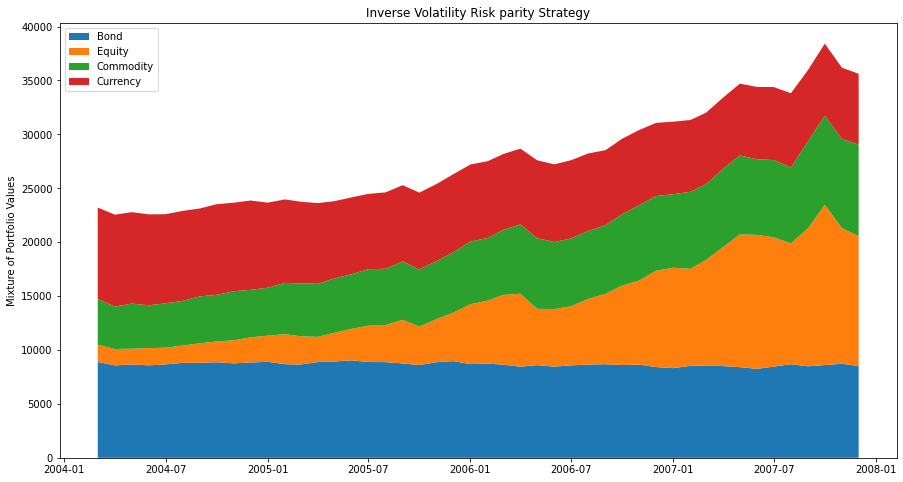

In [479]:
rcParams['figure.figsize'] = 15,8

x = inverse_vol_RP.index
y1 = inverse_vol_RP.Bond_inv_Value
y2 = inverse_vol_RP.Equity_inv_Value
y3 = inverse_vol_RP.Commodity_inv_Value
y4 = inverse_vol_RP.Currency_inv_Value

y = np.vstack([y1, y2, y3, y4])
labels = ["Bond", "Equity", "Commodity","Currency"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, y4, labels=labels)
ax.set_title('Inverse Volatility Risk parity Strategy')
ax.set_ylabel("Mixture of Portfolio Values")
ax.legend(loc='upper left')
plt.show();

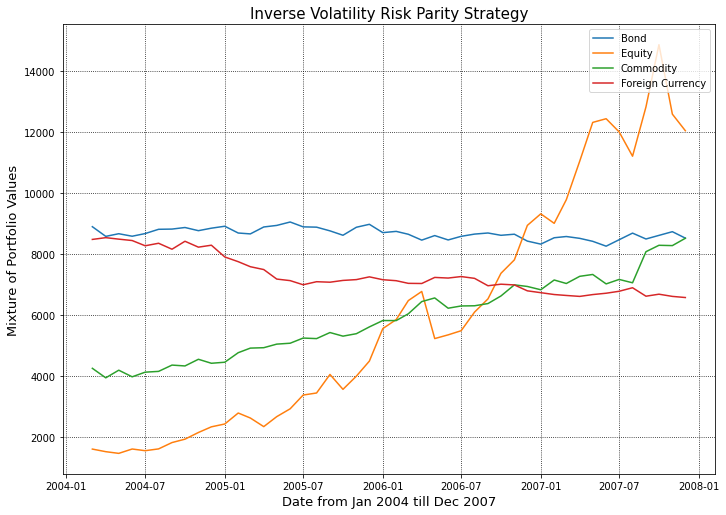

In [480]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(inverse_vol_RP.index, inverse_vol_RP.Bond_inv_Value, label='Bond')
plt.plot(inverse_vol_RP.index, inverse_vol_RP.Equity_inv_Value, label='Equity')
plt.plot(inverse_vol_RP.index, inverse_vol_RP.Commodity_inv_Value, label='Commodity')                               
plt.plot(inverse_vol_RP.index, inverse_vol_RP.Currency_inv_Value, label='Foreign Currency')
                               
plt.title('Inverse Volatility Risk Parity Strategy', fontsize=15)
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Mixture of Portfolio Values', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

In [481]:
# Use pandas.DataFrame.describe() method to generate descriptive statistics,such as count, 
# arithmetic mean, standard deviation, minimum value, maximum value, and percentile
inverse_vol_RP[['Bond_inv_Value','Equity_inv_Value','Commodity_inv_Value','Currency_inv_Value']].describe()

Bond_inv_Value  Equity_inv_Value  Commodity_inv_Value  \
count       46.000000         46.000000            46.000000   
mean      8667.422580       5932.608961          5866.303986   
std        178.317734       3954.604404          1296.427866   
min       8251.030678       1459.272486          3935.536010   
25%       8568.921537       2471.529549          4796.833984   
50%       8656.524659       5283.032481          5812.679434   
75%       8809.681790       8983.136642          6970.046576   
max       9043.564547      14856.305958          8510.454736   

       Currency_inv_Value  
count           46.000000  
mean          7311.646569  
std            630.095987  
min           6567.680470  
25%           6812.559142  
50%           7125.168514  
75%           7701.820655  
max           8530.139150

**Arithmetic Mean**

In [482]:
returns_Inv_bond_mean = np.mean(inverse_vol_RP['Bond_inv_R'])
returns_Inv_bond_mean

-0.0007799341703193302

In [483]:
returns_Inv_equi_mean = np.mean(inverse_vol_RP['Equity_inv_R'])
returns_Inv_equi_mean

0.048153326610060214

In [484]:
returns_Inv_comm_mean = np.mean(inverse_vol_RP['Commodity_inv_R'])
returns_Inv_comm_mean

0.01723329518095404

In [485]:
returns_Inv_curr_mean = np.mean(inverse_vol_RP['Currency_inv_R'])
returns_Inv_curr_mean

-0.005738067172735429

**Standard Deviation**

In [486]:
returns_Inv_bond_sigma = np.std(inverse_vol_RP['Bond_inv_R'])
returns_Inv_bond_sigma

0.016659339630989124

In [487]:
returns_Inv_equi_sigma = np.std(inverse_vol_RP['Equity_inv_R'])
returns_Inv_equi_sigma

0.09597367576603508

In [488]:
returns_Inv_comm_sigma = np.std(inverse_vol_RP['Commodity_inv_R'])
returns_Inv_comm_sigma

0.03761606627233628

In [489]:
returns_Inv_curr_sigma = np.std(inverse_vol_RP['Currency_inv_R'])
returns_Inv_curr_sigma

0.016878942898773064

**Skewness**

In [490]:
skew(inverse_vol_RP['Bond_inv_Value'].dropna())

-0.06432769370338381

In [491]:
skew(inverse_vol_RP['Equity_inv_Value'].dropna())

0.6294180356293612

In [492]:
skew(inverse_vol_RP['Commodity_inv_Value'].dropna())

0.23543289753544533

In [493]:
skew(inverse_vol_RP['Currency_inv_Value'].dropna())

0.7768318374083221

**Kurtosis**

In [494]:
kurtosis(inverse_vol_RP['Bond_inv_Value'].dropna())

-0.48063239717497064

In [495]:
kurtosis(inverse_vol_RP['Equity_inv_Value'].dropna())

-0.8913555244715097

In [496]:
kurtosis(inverse_vol_RP['Commodity_inv_Value'].dropna())

-0.9872104376638959

In [497]:
kurtosis(inverse_vol_RP['Currency_inv_Value'].dropna())

-0.7759117404098155

**Geometric Mean Rate of Return**

In [498]:
# Calculate Geometric Mean Rate of Return (GMRR)
def geometric_mean_return(iterable):
    a = np.array(abs(iterable))
    return a.prod()**(1.0/len(a))

In [499]:
geometric_mean_return(inverse_vol_RP['Bond_inv_R'])

0.010727562447708788

In [500]:
geometric_mean_return(inverse_vol_RP['Equity_inv_R'])

0.07560221593185208

In [501]:
geometric_mean_return(inverse_vol_RP['Commodity_inv_R'])

0.019177902155418446

In [502]:
geometric_mean_return(inverse_vol_RP['Currency_inv_R'])

0.010281909422939443

**Annualized Volatility**

In [503]:
inverse_vol_RP.Bond_inv_Vol.dropna()

Date
2007-12-01    0.114238
Name: Bond_inv_Vol, dtype: float64

In [504]:
inverse_vol_RP.Equity_inv_Vol.dropna()

Date
2007-12-01    0.658118
Name: Equity_inv_Vol, dtype: float64

In [505]:
inverse_vol_RP.Commodity_inv_Vol.dropna()

Date
2007-12-01    0.257944
Name: Commodity_inv_Vol, dtype: float64

In [506]:
inverse_vol_RP.Currency_inv_Vol.dropna()

Date
2007-12-01    0.115744
Name: Currency_inv_Vol, dtype: float64

**Annualized Sharpe Ratio**

In [507]:
# Calcualte the Annualized Sharpe Ratio
def Sharpe_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

In [508]:
inverse_vol_RP.shape[0]

46

In [509]:
Sharpe_Ratio(inverse_vol_RP['Bond_inv_R'], 46, 0.0164) # Annualized Sharpe Ratio of Risk Parity Bond

-0.45761585811612515

In [510]:
Sharpe_Ratio(inverse_vol_RP['Equity_inv_R'], 46, 0.0164) # Annualized Sharpe Ratio of Risk Parity Equity

3.340819363610816

In [511]:
Sharpe_Ratio(inverse_vol_RP['Commodity_inv_R'], 46, 0.0164) # Annualized Sharpe Ratio of Risk Parity Commodity

3.0096937077549053

In [512]:
Sharpe_Ratio(inverse_vol_RP['Currency_inv_R'], 46, 0.0164) # Annualized Sharpe Ratio of Risk Parity Currency

-2.42217451357795

**Annualized Sortino Ratio**

In [513]:
# Calcualte the Annualized Sortino Ratio
def Sortino_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

In [514]:
Sortino_Ratio(inverse_vol_RP['Bond_inv_R'], 46, 0.0164) # Annualized Sortino Ratio of Risk Parity Bond

-0.8686883668639875

In [515]:
Sortino_Ratio(inverse_vol_RP['Equity_inv_R'], 46, 0.0164) # Annualized Sortino Ratio of Risk Parity Equity

5.531477891138334

In [516]:
Sortino_Ratio(inverse_vol_RP['Commodity_inv_R'], 46, 0.0164) # Annualized Sortino Ratio of Risk Parity Commodity

5.071617117146486

In [517]:
Sortino_Ratio(inverse_vol_RP['Currency_inv_R'], 46, 0.0164) # Annualized Sortino Ratio of Risk Parity Currency

-3.2982811400908885

**Cumulative Return**

In [518]:
# Calculate the cumulative return of bond 
cululative_return = 100 * (inverse_vol_RP['Bond_inv_Value'][-1] /inverse_vol_RP['Bond_inv_Value'][0]-1)
print("The Cumulative Return of the Bond is {:.2f}%".format(cululative_return))

The Cumulative Return of the Bond is -4.21%


In [519]:
# Calculate the cumulative return of bond 
cululative_return = 100 * (inverse_vol_RP['Equity_inv_Value'][-1] /inverse_vol_RP['Equity_inv_Value'][0]-1)
print("The Cumulative Return of the equity is {:.2f}%".format(cululative_return))

The Cumulative Return of the equity is 652.30%


In [520]:
# Calculate the cumulative return of bond 
cululative_return = 100 * (inverse_vol_RP['Commodity_inv_Value'][-1] /inverse_vol_RP['Commodity_inv_Value'][0]-1)
print("The Cumulative Return of the commodity is {:.2f}%".format(cululative_return))

The Cumulative Return of the commodity is 100.38%


In [521]:
# Calculate the cumulative return of bond 
cululative_return = 100 * (inverse_vol_RP['Currency_inv_Value'][-1] /inverse_vol_RP['Currency_inv_Value'][0]-1)
print("The Cumulative Return of the currency is {:.2f}%".format(cululative_return))

The Cumulative Return of the currency is -22.48%


**Conclusion on Inverse Volatility RR Strategy**

**Arithmetic Mean**

- IV RP Bond -0.0007799341703193302
- IV RP Equity 0.048153326610060214
- IV RP Commodity 0.01723329518095404
- IV RP Currency -0.005738067172735429

**Standards Deviation**

- IV RP Bond 0.016659339630989124
- IV RP Equity 0.000.09597367576603508
- IV RP Commodity 0.03761606627233628
- IV RP Currency 0.016878942898773064

**Skewness**

- IV RP Bond -0.06432769370338381
- IV RP Equity 0.6294180356293612
- IV RP Commodity 0.23543289753544533
- IV RP Currency 0.7768318374083221

**Kurtosis**

- IV RP Bond -0.48063239717497064
- IV RP Equity -0.8913555244715097
- IV RP Commodity -0.9872104376638959
- IV RP Currency -0.7759117404098155


**Geometric Mean Rate of Returns**

- IV RP Bond 0.010727562447708788
- IV RP Equity 0.07560221593185208
- IV RP Commodity 0.019177902155418446
- IV RP Currency 0.010281909422939443

**Volatility**

- IV RP Bond 0.114238
- IV RP Equity 0.658118 
- IV RP Commodity 0.257944
- IV RP Currency 0.115744

**Annualized Sharpe Ratio**

- IV RP Bond -0.45761585811612515
- IV RP Equity 3.340819363610816
- IV RP Commodity 3.0096937077549053
- IV RP Currency -2.42217451357795

**Annualized Sortino Ratio**

- IV RP Bond -0.8686883668639875
- IV RP Equity 5.531477891138334
- IV RP Commodity 5.071617117146486 
- IV RP Currency -3.2982811400908885

**Cumulative Return**

- IV RP Bond -4.21%
- IV RP Equity 652.30%
- IV RP Commodity 100.38%
- IV RP Currency -22.48%

In [522]:
# A Table of A Conclusion on Inverse Volatility RR Strategy

IVRP = {'Particular':['Arithmetic Mean','Standard Deviation','Skewness','Kurtosis','Geometric Mean',
                      'Volatility','Sharpe Ratio', 'Sortino Ratio','Cumulative Return'],
        'Bond':[-0.0007799341703193302, 0.016659339630989124, -0.06432769370338381, -0.48063239717497064, 0.010727562447708788,
                0.114238, -0.45761585811612515, -0.8686883668639875, -0.0421],
        'Equity':[0.048153326610060214, 0.09597367576603508, 0.6294180356293612, -0.8913555244715097, 0.07560221593185208,
                  0.658118 , 3.340819363610816, 5.531477891138334, 6.5230],
        'Commodity':[0.01723329518095404, 0.03761606627233628, 0.23543289753544533, -0.9872104376638959, 0.019177902155418446,
                     0.257944, 3.0096937077549053, 5.071617117146486, 1.0038],
        'Currency':[-0.005738067172735429, 0.016878942898773064, 0.7768318374083221, -0.7759117404098155, 
                    0.010281909422939443, 0.115744, -2.42217451357795, -3.2982811400908885, -0.2248]}


df_IVRP = pd.DataFrame(data=IVRP)
df_IVRP

Particular      Bond    Equity  Commodity  Currency
0     Arithmetic Mean -0.000780  0.048153   0.017233 -0.005738
1  Standard Deviation  0.016659  0.095974   0.037616  0.016879
2            Skewness -0.064328  0.629418   0.235433  0.776832
3            Kurtosis -0.480632 -0.891356  -0.987210 -0.775912
4      Geometric Mean  0.010728  0.075602   0.019178  0.010282
5          Volatility  0.114238  0.658118   0.257944  0.115744
6        Sharpe Ratio -0.457616  3.340819   3.009694 -2.422175
7       Sortino Ratio -0.868688  5.531478   5.071617 -3.298281
8   Cumulative Return -0.042100  6.523000   1.003800 -0.224800

In [523]:
df_IVRP['Portfolio'] = df_IVRP[['Bond','Equity','Commodity','Currency']].sum(axis=1)
df_IVRP

Particular      Bond    Equity  Commodity  Currency  Portfolio
0     Arithmetic Mean -0.000780  0.048153   0.017233 -0.005738   0.058869
1  Standard Deviation  0.016659  0.095974   0.037616  0.016879   0.167128
2            Skewness -0.064328  0.629418   0.235433  0.776832   1.577355
3            Kurtosis -0.480632 -0.891356  -0.987210 -0.775912  -3.135110
4      Geometric Mean  0.010728  0.075602   0.019178  0.010282   0.115790
5          Volatility  0.114238  0.658118   0.257944  0.115744   1.146044
6        Sharpe Ratio -0.457616  3.340819   3.009694 -2.422175   3.470723
7       Sortino Ratio -0.868688  5.531478   5.071617 -3.298281   6.436126
8   Cumulative Return -0.042100  6.523000   1.003800 -0.224800   7.259900

<h4><center>Inverse Volatility 10 Months Moving Average Strategy</center></h4>

**Inverse Volatility ETF**

- An inverse volatility exchange-traded fund (ETF) is a financial product that allows investors to gain exposure to volatility, and thus hedge against portfolio risk, without having to buy options.

- As long as volatility remains low, investors may see a substantial return, as an inverse volatility ETF is essentially a bet that the market will remain stable.

In [524]:
# Use pandas.DataFrame.copy() function to make a copy of Inverse Volatility RP Strategy
inverse_vol_MA10 = moving_average_df_10.copy()
inverse_vol_MA10.head(3)

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2006-06-01       965.884243        3517.077920           1603.747191   
2006-07-01       979.444008        3606.092859           1622.757330   
2006-08-01       987.827957        4007.930022           1624.347791   

            Currency_Port_Value   MA10_bond  MA10_equity  MA10_commodity  \
Date                                                                       
2006-06-01           834.067808  991.321418  3374.399811     1510.909115   
2006-07-01           839.754250  989.271877  3468.722942     1533.381964   
2006-08-01           832.934392  989.708768  3635.347882     1559.059577   

            MA10_currency  
Date                       
2006-06-01     825.987170  
2006-07-01     828.131269  
2006-08-01     828.916399

In [525]:
# Calculate monthly returns of 10 Months Moving Average asset classes

# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
inverse_vol_MA10['Bond_inv_R'] = inverse_vol_MA10['MA10_bond'].pct_change()
inverse_vol_MA10['Equity_inv_R'] = inverse_vol_MA10['MA10_equity'].pct_change()
inverse_vol_MA10['Commodity_inv_R'] = inverse_vol_MA10['MA10_commodity'].pct_change()
inverse_vol_MA10['Currency_inv_R'] = inverse_vol_MA10['MA10_currency'].pct_change()

# Use pandas.DataFrame.dropna() function to remove missing values in rows
inverse_vol_MA10.dropna(axis=0, inplace=True)

# Use pandas.DataFrame.head(n=5) function to return the first number of rows
inverse_vol_MA10.head(3)

Bond_Port_Value  Equity_Port_Value  Commodity_Port_Value  \
Date                                                                   
2006-07-01       979.444008        3606.092859           1622.757330   
2006-08-01       987.827957        4007.930022           1624.347791   
2006-09-01       991.945965        4293.292206           1643.135848   

            Currency_Port_Value   MA10_bond  MA10_equity  MA10_commodity  \
Date                                                                       
2006-07-01           839.754250  989.271877  3468.722942     1533.381964   
2006-08-01           832.934392  989.708768  3635.347882     1559.059577   
2006-09-01           804.863876  987.557692  3802.013565     1584.541816   

            MA10_currency  Bond_inv_R  Equity_inv_R  Commodity_inv_R  \
Date                                                                   
2006-07-01     828.131269   -0.002067      0.027953         0.014874   
2006-08-01     828.916399    0.000442      0.048036         0.016746   
2006-09-01     826.584089   -0.002173      0.045846         0.016345   

            Currency_inv_R  
Date                        
2006-07-01        0.002596  
2006-08-01        0.000948  
2006-09-01       -0.002814

In [526]:
inverse_vol_MA10.shape[0]

18

In [527]:
# Calculate the annualized volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

inverse_vol_MA10['Bond_inv_Vol'] = inverse_vol_MA10['Bond_inv_R'].rolling(18).std() * math.sqrt(18)
inverse_vol_MA10['Equity_inv_Vol'] = inverse_vol_MA10['Equity_inv_R'].rolling(18).std() * math.sqrt(18)
inverse_vol_MA10['Commodity_inv_Vol'] = inverse_vol_MA10['Commodity_inv_R'].rolling(18).std() * math.sqrt(18)
inverse_vol_MA10['Currency_inv_Vol'] = inverse_vol_MA10['Currency_inv_R'].rolling(18).std() * math.sqrt(18)

In [528]:
inverse_vol_MA10[['Bond_inv_Vol','Equity_inv_Vol','Commodity_inv_Vol','Currency_inv_Vol']].dropna()

Bond_inv_Vol  Equity_inv_Vol  Commodity_inv_Vol  Currency_inv_Vol
Date                                                                         
2007-12-01      0.010394        0.070973           0.017004          0.013456

In [529]:
# Calculate the weight proportional to 1 / annualized volatility (reciprocal, one over the volatility)
inverse_vol_MA10['Bond_inv_Value'] = inverse_vol_MA10['MA10_bond'] * 1 / 0.010394
inverse_vol_MA10['Equity_inv_Value'] = inverse_vol_MA10['MA10_equity'] * 1 / 0.070973 
inverse_vol_MA10['Commodity_inv_Value'] = inverse_vol_MA10['MA10_commodity'] * 1 / 0.017004
inverse_vol_MA10['Currency_inv_Value'] = inverse_vol_MA10['MA10_currency'] * 1 / 0.013456

In [530]:
inverse_vol_MA10['Portfolio_inv_Value'] = inverse_vol_MA10[['Bond_inv_Value','Equity_inv_Value',
                                                            'Commodity_inv_Value','Currency_inv_Value']].sum(axis=1)

In [531]:
inverse_vol_MA10[['Bond_inv_Value','Equity_inv_Value','Commodity_inv_Value',
                'Currency_inv_Value','Portfolio_inv_Value']].head(3)

Bond_inv_Value  Equity_inv_Value  Commodity_inv_Value  \
Date                                                                
2006-07-01    95177.205828      48873.838536         90177.720750   
2006-08-01    95219.238820      51221.561466         91687.813283   
2006-09-01    95012.285123      53569.858461         93186.415909   

            Currency_inv_Value  Portfolio_inv_Value  
Date                                                 
2006-07-01        61543.643682        295772.408797  
2006-08-01        61601.991620        299730.605190  
2006-09-01        61428.662980        303197.222474

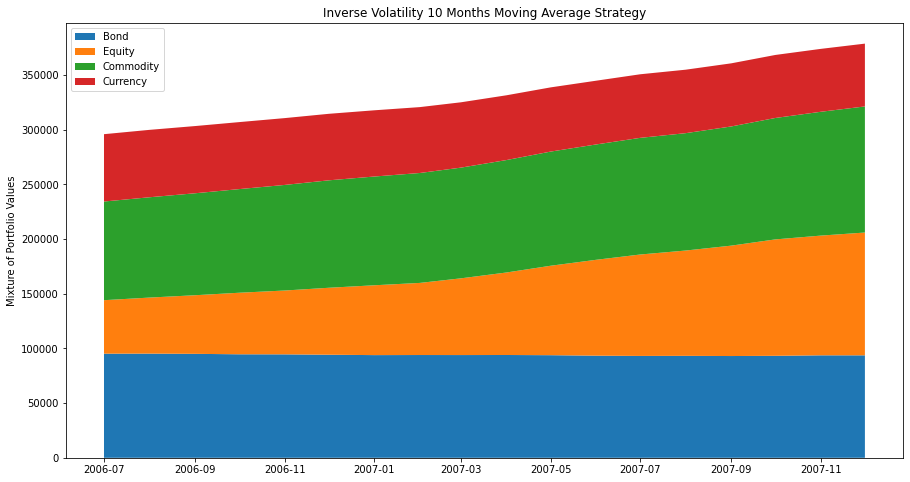

In [532]:
rcParams['figure.figsize'] = 15,8

x = inverse_vol_MA10.index
y1 = inverse_vol_MA10.Bond_inv_Value
y2 = inverse_vol_MA10.Equity_inv_Value
y3 = inverse_vol_MA10.Commodity_inv_Value
y4 = inverse_vol_MA10.Currency_inv_Value

y = np.vstack([y1, y2, y3, y4])
labels = ["Bond", "Equity", "Commodity","Currency"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, y4, labels=labels)
ax.set_title('Inverse Volatility 10 Months Moving Average Strategy')
ax.set_ylabel("Mixture of Portfolio Values")
ax.legend(loc='upper left')
plt.show();

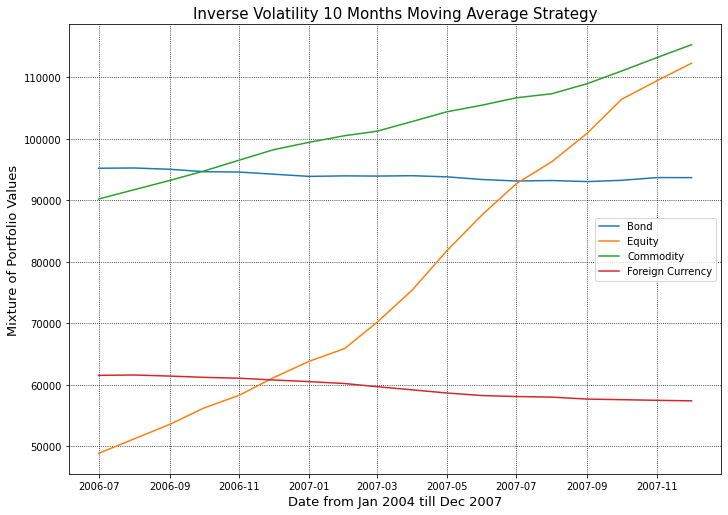

In [533]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(inverse_vol_MA10.index, inverse_vol_MA10.Bond_inv_Value, label='Bond')
plt.plot(inverse_vol_MA10.index, inverse_vol_MA10.Equity_inv_Value, label='Equity')
plt.plot(inverse_vol_MA10.index, inverse_vol_MA10.Commodity_inv_Value, label='Commodity')                               
plt.plot(inverse_vol_MA10.index, inverse_vol_MA10.Currency_inv_Value, label='Foreign Currency')
                               
plt.title('Inverse Volatility 10 Months Moving Average Strategy', fontsize=15)
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Mixture of Portfolio Values', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=5);

In [534]:
# Use pandas.DataFrame.describe() method to generate descriptive statistics,such as count, 
# arithmetic mean, standard deviation, minimum value, maximum value, and percentile
inverse_vol_MA10[['Bond_inv_Value','Equity_inv_Value','Commodity_inv_Value','Currency_inv_Value',
                  'Portfolio_inv_Value']].describe()

Bond_inv_Value  Equity_inv_Value  Commodity_inv_Value  \
count       18.000000         18.000000            18.000000   
mean     93967.762413      77327.098904        102236.222091   
std        703.490659      21499.114756          7380.025263   
min      93011.311672      48873.838536         90177.720750   
25%      93423.845243      59043.829232         96924.113845   
50%      93879.565187      72760.563507        101975.988976   
75%      94471.621671      95357.107589        107113.888453   
max      95219.238820     112233.936087        115244.456740   

       Currency_inv_Value  Portfolio_inv_Value  
count           18.000000            18.000000  
mean         59473.298486        333004.381894  
std           1587.676881         26629.827959  
min          57403.766164        295772.408797  
25%          58030.494598        311442.426375  
50%          59447.359120        328117.987424  
75%          61002.861626        353665.282524  
max          61601.991620        378534.183118

**Arithmetic Mean**

In [535]:
returns_Inv_bond_mean = np.mean(inverse_vol_MA10['Bond_inv_R'])
returns_Inv_bond_mean

-0.0010091008192725237

In [536]:
returns_Inv_equi_mean = np.mean(inverse_vol_MA10['Equity_inv_R'])
returns_Inv_equi_mean

0.04899948631366781

In [537]:
returns_Inv_comm_mean = np.mean(inverse_vol_MA10['Commodity_inv_R'])
returns_Inv_comm_mean

0.014558867080224112

In [538]:
returns_Inv_curr_mean = np.mean(inverse_vol_MA10['Currency_inv_R'])
returns_Inv_curr_mean

-0.003712983320592167

**Standard Deviation**

In [539]:
returns_Inv_bond_sigma = np.std(inverse_vol_MA10['Bond_inv_R'])
returns_Inv_bond_sigma

0.002380755217200065

In [540]:
returns_Inv_equi_sigma = np.std(inverse_vol_MA10['Equity_inv_R'])
returns_Inv_equi_sigma

0.016257117294353956

In [541]:
returns_Inv_comm_sigma = np.std(inverse_vol_MA10['Commodity_inv_R'])
returns_Inv_comm_sigma

0.003894971459672619

In [542]:
returns_Inv_curr_sigma = np.std(inverse_vol_MA10['Currency_inv_R'])
returns_Inv_curr_sigma

0.0030822083507538603

**Skewness**

In [543]:
skew(inverse_vol_MA10['Bond_inv_Value'].dropna())

0.4579800642008374

In [544]:
skew(inverse_vol_MA10['Equity_inv_Value'].dropna())

0.2788884395700289

In [545]:
skew(inverse_vol_MA10['Commodity_inv_Value'].dropna())

0.05303219476217774

In [546]:
skew(inverse_vol_MA10['Currency_inv_Value'].dropna())

0.03415199993767701

**Kurtosis**

In [547]:
kurtosis(inverse_vol_MA10['Bond_inv_Value'].dropna())

-0.879238819310884

In [548]:
kurtosis(inverse_vol_MA10['Equity_inv_Value'].dropna())

-1.3528376417876316

In [549]:
kurtosis(inverse_vol_MA10['Commodity_inv_Value'].dropna())

-0.9690137321156871

In [550]:
kurtosis(inverse_vol_MA10['Currency_inv_Value'].dropna())

-1.616004711999334

**Geometric Mean Rate of Return**

In [551]:
# Calculate Geometric Mean Rate of Return (GMRR)
def geometric_mean_return(iterable):
    a = np.array(abs(iterable))
    return a.prod()**(1.0/len(a))

In [552]:
geometric_mean_return(inverse_vol_MA10['Bond_inv_R'])

0.0014477356880810287

In [553]:
geometric_mean_return(inverse_vol_MA10['Equity_inv_R'])

0.046355118922187286

In [554]:
geometric_mean_return(inverse_vol_MA10['Commodity_inv_R'])

0.01390921408142261

In [555]:
geometric_mean_return(inverse_vol_MA10['Currency_inv_R'])

0.0033551634973878483

**Annualized Volatility**

In [556]:
inverse_vol_MA10.Bond_inv_Vol.dropna()

Date
2007-12-01    0.010394
Name: Bond_inv_Vol, dtype: float64

In [557]:
inverse_vol_MA10.Equity_inv_Vol.dropna()

Date
2007-12-01    0.070973
Name: Equity_inv_Vol, dtype: float64

In [558]:
inverse_vol_MA10.Commodity_inv_Vol.dropna()

Date
2007-12-01    0.017004
Name: Commodity_inv_Vol, dtype: float64

In [559]:
inverse_vol_MA10.Currency_inv_Vol.dropna()

Date
2007-12-01    0.013456
Name: Currency_inv_Vol, dtype: float64

**Annualized Sharpe Ratio**

In [560]:
# Calcualte the Annualized Sharpe Ratio
def Sharpe_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

In [561]:
inverse_vol_MA10.shape[0]

18

In [562]:
Sharpe_Ratio(inverse_vol_MA10['Bond_inv_R'], 18, 0.0164) # Annualized Sharpe Ratio of Risk Parity Bond

-3.325514759074702

In [563]:
Sharpe_Ratio(inverse_vol_MA10['Equity_inv_R'], 18, 0.0164) # Annualized Sharpe Ratio of Risk Parity Equity

12.196101358838941

In [564]:
Sharpe_Ratio(inverse_vol_MA10['Commodity_inv_R'], 18, 0.0164) # Annualized Sharpe Ratio of Risk Parity Commodity

14.447124965079087

In [565]:
Sharpe_Ratio(inverse_vol_MA10['Currency_inv_R'], 18, 0.0164) # Annualized Sharpe Ratio of Risk Parity Currency

-6.185704402520332

**Annualized Sortino Ratio**

In [566]:
# Calcualte the Annualized Sortino Ratio
def Sortino_Ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

In [567]:
inverse_vol_MA10.shape[0]

18

In [568]:
Sortino_Ratio(inverse_vol_MA10['Bond_inv_R'], 18, 0.0164) # Annualized Sortino Ratio of Risk Parity Bond

-5.415453342512076

In [569]:
Sortino_Ratio(inverse_vol_MA10['Equity_inv_R'], 18, 0.0164) # Annualized Sortino Ratio of Risk Parity Equity

nan

In [570]:
Sortino_Ratio(inverse_vol_MA10['Commodity_inv_R'], 18, 0.0164) # Annualized Sortino Ratio of Risk Parity Commodity

nan

In [571]:
Sortino_Ratio(inverse_vol_MA10['Currency_inv_R'], 18, 0.0164) # Annualized Sortino Ratio of Risk Parity Currency

-7.525042042705526

**Cumulative Return**

In [572]:
# Calculate the cumulative return of bond 
cululative_return = 100 * (inverse_vol_MA10['Bond_inv_Value'][-1] /inverse_vol_MA10['Bond_inv_Value'][0]-1)
print("The Cumulative Return of the Bond is {:.2f}%".format(cululative_return))

The Cumulative Return of the Bond is -1.60%


In [573]:
# Calculate the cumulative return of equity
cululative_return = 100 * (inverse_vol_MA10['Equity_inv_Value'][-1] /inverse_vol_MA10['Equity_inv_Value'][0]-1)
print("The Cumulative Return of the equity is {:.2f}%".format(cululative_return))

The Cumulative Return of the equity is 129.64%


In [574]:
# Calculate the cumulative return of commodity 
cululative_return = 100 * (inverse_vol_MA10['Commodity_inv_Value'][-1] /inverse_vol_MA10['Commodity_inv_Value'][0]-1)
print("The Cumulative Return of the commodity is {:.2f}%".format(cululative_return))

The Cumulative Return of the commodity is 27.80%


In [575]:
# Calculate the cumulative return of currency 
cululative_return = 100 * (inverse_vol_MA10['Currency_inv_Value'][-1] /inverse_vol_MA10['Currency_inv_Value'][0]-1)
print("The Cumulative Return of the currency is {:.2f}%".format(cululative_return))

The Cumulative Return of the currency is -6.73%


**Conclusion on Inverse Volatility 10 Months Moving Average Strategy**

**Arithmetic Mean**

- IV 10 MA Bond -0.0010091008192725237
- IV 10 MA Equity 0.04899948631366781
- IV 10 MA Commodity 0.014558867080224112
- IV 10 MA Currency -0.003712983320592167

**Standards Deviation**

- IV 10 MA Bond 0.002380755217200065
- IV 10 MA Equity 0.016257117294353956
- IV 10 MA Commodity 0.003894971459672619
- IV 10 MA Currency 0.0030822083507538603

**Skewness**

- IV 10 MA Bond 0.4579800642008374
- IV 10 MA Equity 0.2788884395700289
- IV 10 MA Commodity 0.05303219476217774
- IV 10 MA Currency 0.03415199993767701

**Kurtosis**

- IV 10 MA Bond -0.879238819310884 
- IV 10 MA Equity -1.3528376417876316
- IV 10 MA Commodity -0.9690137321156871
- IV 10 MA Currency -1.616004711999334

**Geometric Mean Rate of Returns**

- IV 10 MA Bond 0.0014477356880810287
- IV 10 MA Equity 0.046355118922187286
- IV 10 MA Commodity 0.01390921408142261
- IV 10 MA Currency 0.0033551634973878483

**Volatility**

- IV 10 MA Bond 0.010394
- IV 10 MA Equity 0.070973 
- IV 10 MA Commodity 0.017004
- IV 10 MA Currency 0.013456

**Annualized Sharpe Ratio**

- IV 10 MA Bond -3.325514759074702
- IV 10 MA Equity 12.196101358838941
- IV 10 MA Commodity 14.447124965079087
- IV 10 MA Currency -6.185704402520332

**Annualized Sortino Ratio**

- IV 10 MA Bond -5.415453342512076
- IV 10 MA Equity NaN
- IV 10 MA Commodity NaN
- IV 10 MA Currency -7.525042042705526

**Cumulative Return**

- IV 10 MA Bond -1.60%
- IV 10 MA Equity 129.64%
- IV 10 MA Commodity 27.80%
- IV 10 MA Currency -6.73%

In [576]:
# A Table of A Conclusion on Inverse Volatility 10 Months Moving Average Strategy

IVMA = {'Particular':['Arithmetic Mean','Standard Deviation','Skewness','Kurtosis','Geometric Mean',
                      'Volatility','Sharpe Ratio', 'Sortino Ratio','Cumulative Return'],
        'Bond':[-0.0010091008192725237, 0.002380755217200065, 0.4579800642008374, -0.879238819310884, 0.0014477356880810287,
                 0.010394, -3.325514759074702, -5.415453342512076, -0.0160],
        'Equity':[0.04899948631366781, 0.016257117294353956, 0.2788884395700289, -1.3528376417876316, 0.046355118922187286,
                  0.070973 , 12.196101358838941,0.0000, 1.2964],
        'Commodity':[0.014558867080224112, 0.003894971459672619, 0.05303219476217774, -0.9690137321156871, 0.01390921408142261,
                     0.017004, 14.447124965079087, 0.0000, .2780],
        'Currency':[-0.003712983320592167, 0.0030822083507538603, 0.03415199993767701, -1.616004711999334, 
                    0.0033551634973878483, 0.013456, -6.185704402520332, -7.525042042705526, -0.0673]}


df_IVMA = pd.DataFrame(data=IVMA)
df_IVMA

Particular      Bond     Equity  Commodity  Currency
0     Arithmetic Mean -0.001009   0.048999   0.014559 -0.003713
1  Standard Deviation  0.002381   0.016257   0.003895  0.003082
2            Skewness  0.457980   0.278888   0.053032  0.034152
3            Kurtosis -0.879239  -1.352838  -0.969014 -1.616005
4      Geometric Mean  0.001448   0.046355   0.013909  0.003355
5          Volatility  0.010394   0.070973   0.017004  0.013456
6        Sharpe Ratio -3.325515  12.196101  14.447125 -6.185704
7       Sortino Ratio -5.415453   0.000000   0.000000 -7.525042
8   Cumulative Return -0.016000   1.296400   0.278000 -0.067300

In [577]:
df_IVMA['Portfolio'] = df_IVMA[['Bond','Equity','Commodity','Currency']].sum(axis=1)
df_IVMA

Particular      Bond     Equity  Commodity  Currency  Portfolio
0     Arithmetic Mean -0.001009   0.048999   0.014559 -0.003713   0.058836
1  Standard Deviation  0.002381   0.016257   0.003895  0.003082   0.025615
2            Skewness  0.457980   0.278888   0.053032  0.034152   0.824053
3            Kurtosis -0.879239  -1.352838  -0.969014 -1.616005  -4.817095
4      Geometric Mean  0.001448   0.046355   0.013909  0.003355   0.065067
5          Volatility  0.010394   0.070973   0.017004  0.013456   0.111827
6        Sharpe Ratio -3.325515  12.196101  14.447125 -6.185704  17.132007
7       Sortino Ratio -5.415453   0.000000   0.000000 -7.525042 -12.940495
8   Cumulative Return -0.016000   1.296400   0.278000 -0.067300   1.491100